<a href="https://colab.research.google.com/github/nazimulrehman/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif


# Set style
sns.set_palette("husl")
pd.set_option('display.max_columns', 100)
# Define custom style and colors
custom_palette = sns.color_palette("husl", 3)
sns.set_palette(custom_palette)


# warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
train_df = pd.read_csv('/content/house_price_train_data.csv')
test_df = pd.read_csv('/content/house_price_test_data.csv')

In [3]:
# Getting info form data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Shape and missing values
print("🔍 Missing Values Analysis:")
missing = pd.DataFrame({'Missing Values': train_df.isnull().sum(),
                        '% Missing': (train_df.isnull().mean() * 100).round(2)}).sort_values('% Missing',ascending=False)
display(missing[missing['Missing Values'] > 0])

🔍 Missing Values Analysis:


Missing Values  % Missing
PoolQC                  1453      99.52
MiscFeature             1406      96.30
Alley                   1369      93.77
Fence                   1179      80.75
MasVnrType               872      59.73
FireplaceQu              690      47.26
LotFrontage              259      17.74
GarageQual                81       5.55
GarageFinish              81       5.55
GarageType                81       5.55
GarageYrBlt               81       5.55
GarageCond                81       5.55
BsmtFinType2              38       2.60
BsmtExposure              38       2.60
BsmtCond                  37       2.53
BsmtQual                  37       2.53
BsmtFinType1              37       2.53
MasVnrArea                 8       0.55
Electrical                 1       0.07

<Axes: >

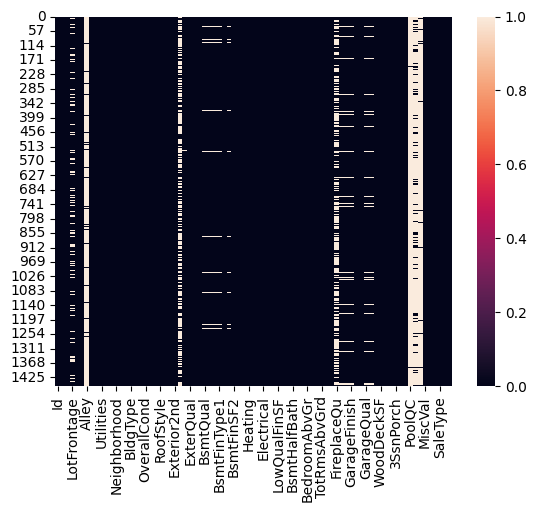

In [5]:
# Heatmap for the analysis of the Missing values
sns.heatmap(train_df.isnull())

In [6]:
# Data types distribution
print("📈 Data Types Distribution:")
dtype_counts = train_df.dtypes.value_counts().reset_index()
dtype_counts.columns = ['Data Type', 'Count']
display(dtype_counts)

📈 Data Types Distribution:


Data Type  Count
0    object     43
1     int64     35
2   float64      3

<Figure size 600x400 with 0 Axes>

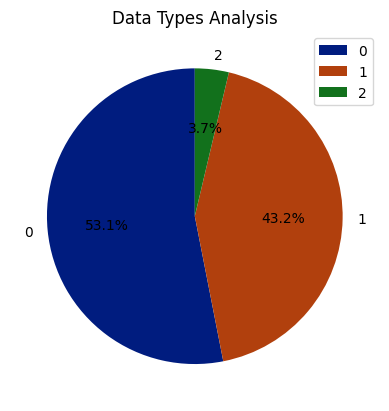

In [7]:
# Pass figsize as a tuple (width, height)
plt.figure(figsize=(6, 4))
dtype_counts.plot(kind='pie', y='Count', autopct='%1.1f%%', startangle=90,colors=sns.color_palette('dark'))
plt.title('Data Types Analysis')
plt.ylabel('')
plt.show()

In [8]:
# Unique values analysis
print("🎯 Unique Values Analysis:")
unique_stats = pd.DataFrame({
'Unique Values': train_df.nunique(),
'Sample Values': [train_df[col].unique()[:20] for col in train_df.columns]
})
display(unique_stats.sort_values('Unique Values', ascending=False).head(10))

🎯 Unique Values Analysis:


Unique Values                                      Sample Values
Id                    1460  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LotArea               1073  [8450, 9600, 11250, 9550, 14260, 14115, 10084,...
GrLivArea              861  [1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...
BsmtUnfSF              780  [150, 284, 434, 540, 490, 64, 317, 216, 952, 1...
1stFlrSF               753  [856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...
TotalBsmtSF            721  [856, 1262, 920, 756, 1145, 796, 1686, 1107, 9...
SalePrice              663  [208500, 181500, 223500, 140000, 250000, 14300...
BsmtFinSF1             637  [706, 978, 486, 216, 655, 732, 1369, 859, 0, 8...
GarageArea             441  [548, 460, 608, 642, 836, 480, 636, 484, 468, ...
2ndFlrSF               417  [854, 0, 866, 756, 1053, 566, 983, 752, 1142, ...

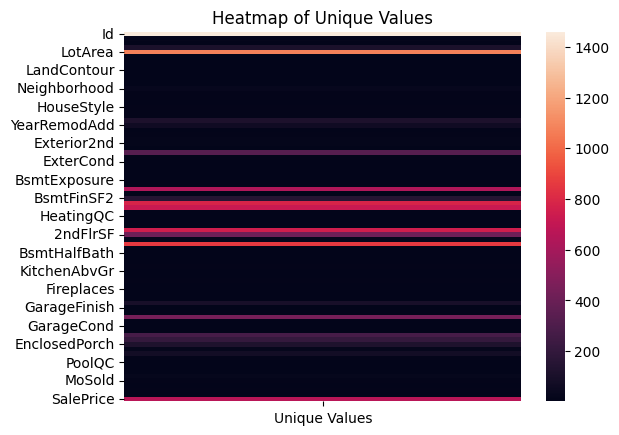

In [9]:
# Heatmap for the analysis of Unique Values
sns.heatmap(unique_stats[['Unique Values']])
plt.title('Heatmap of Unique Values')
plt.show()

In [10]:
# Checking Duplicate
duplicate_values = train_df.duplicated().mean() * 100
print(f'Percentage of Duplicate Values: {duplicate_values}')

Percentage of Duplicate Values: 0.0


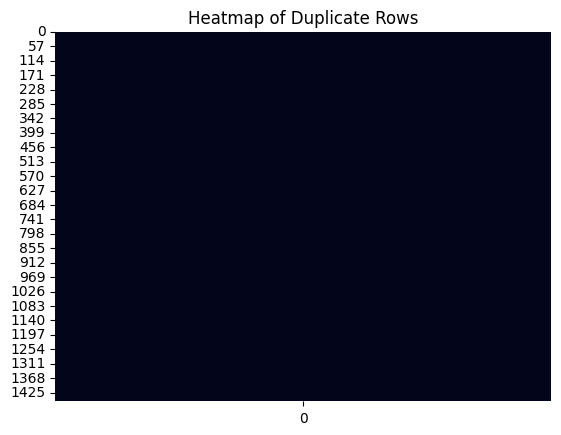

In [11]:
# Visualizing the Duplicate Values
duplicate_mask = train_df.duplicated(keep=False).to_frame()
# Visualizing the Duplicate Values
sns.heatmap(duplicate_mask, cbar=False)
plt.title('Heatmap of Duplicate Rows')
plt.show()

In [12]:
# Checking the Columns
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# Overview of the whole data
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [14]:
# Statistical Overview of Data
train_df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count         588  1452.000000      1460      1460       1460     1423   
unique          3          NaN         4         

In [15]:
# Numerical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).drop(['Id', 'SalePrice'], axis=1)
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

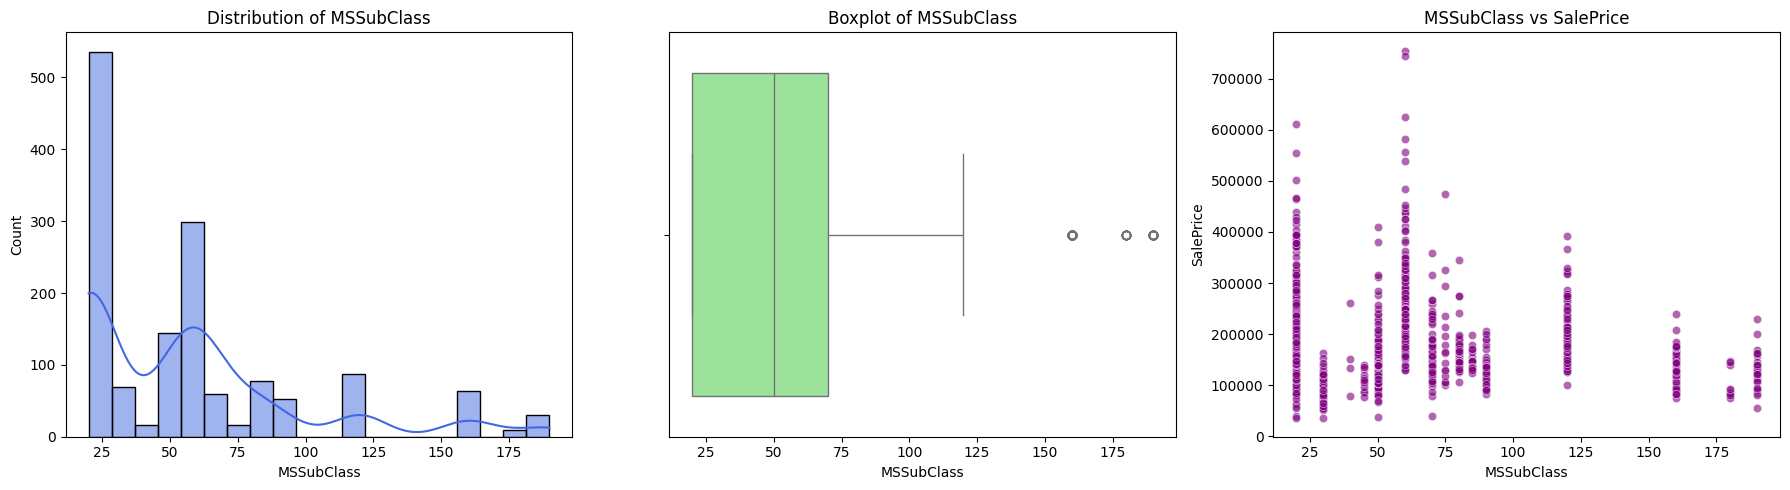


MSSUBCLASS - DESCRIPTIVE STATISTICS:


count      mean        std   min   25%   50%   75%    max  range  \
MSSubClass  1460.0  56.89726  42.300571  20.0  20.0  50.0  70.0  190.0  170.0   

                  cv  
MSSubClass  0.743455


Pearson Correlation with Survived: -0.08
IQR Outliers: 103 (7.1%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: MSSUBCLASS
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
1%         20.000000
5%         20.000000
25%        20.000000
50%        50.000000
75%        70.000000
95%       160.000000
99%       190.000000
max       190.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.4077 (strong)
• Kurtosis: 1.5802 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 15
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -55.0000
• Upper bound: 145.0000
• Potential outliers: 103 (7.05%)
• Min outlier value: 160.0000
• Max outlier value: 190.0000



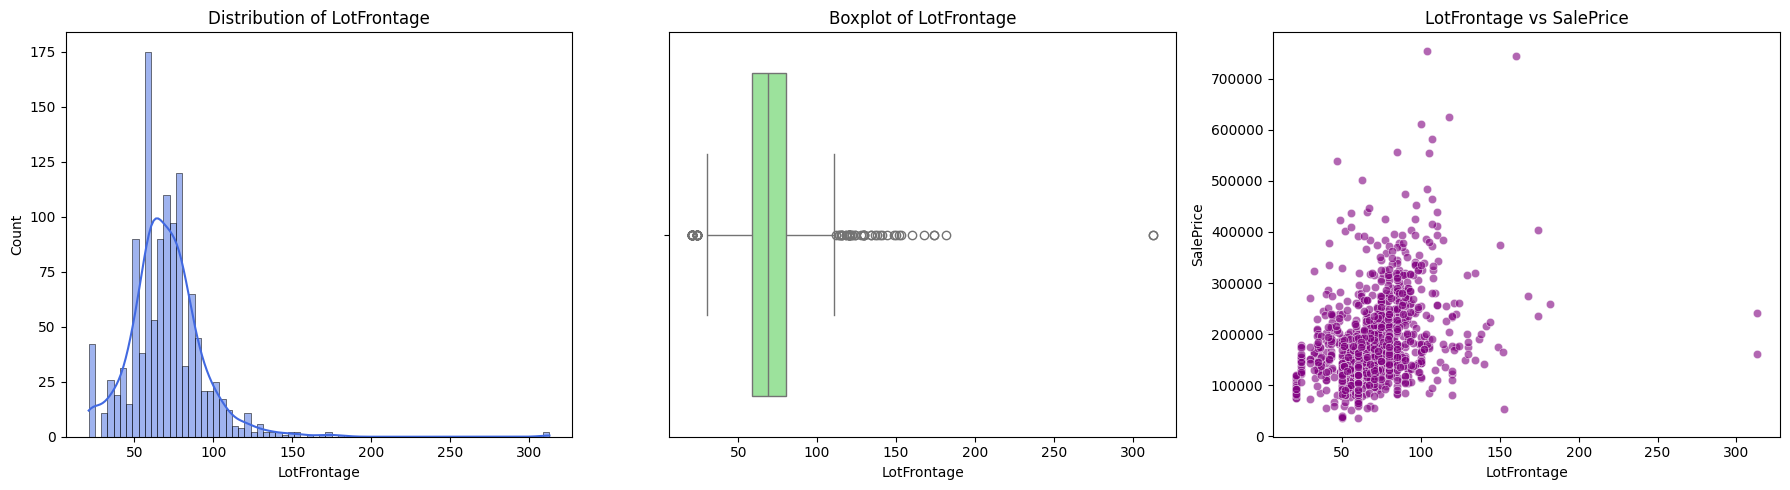


LOTFRONTAGE - DESCRIPTIVE STATISTICS:


count       mean        std   min   25%   50%   75%    max  \
LotFrontage  1201.0  70.049958  24.284752  21.0  59.0  69.0  80.0  313.0   

             range        cv  
LotFrontage  292.0  0.346678


Pearson Correlation with Survived: 0.35
IQR Outliers: 88 (6.0%)

Missing Values: 259 (17.7%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: LOTFRONTAGE
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
1%         21.000000
5%         34.000000
25%        59.000000
50%        69.000000
75%        80.000000
95%       107.000000
99%       141.000000
max       313.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 2.1636 (strong)
• Kurtosis: 17.4529 (leptokurtic)
• Missing values: 259 (17.74%)
• Unique values: 110
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 27.5000
• Upper bound: 111.5000
• Potential outliers: 88 (6.03%)
• Min outlier value: 21.0000
• Max outlier value: 313.0000



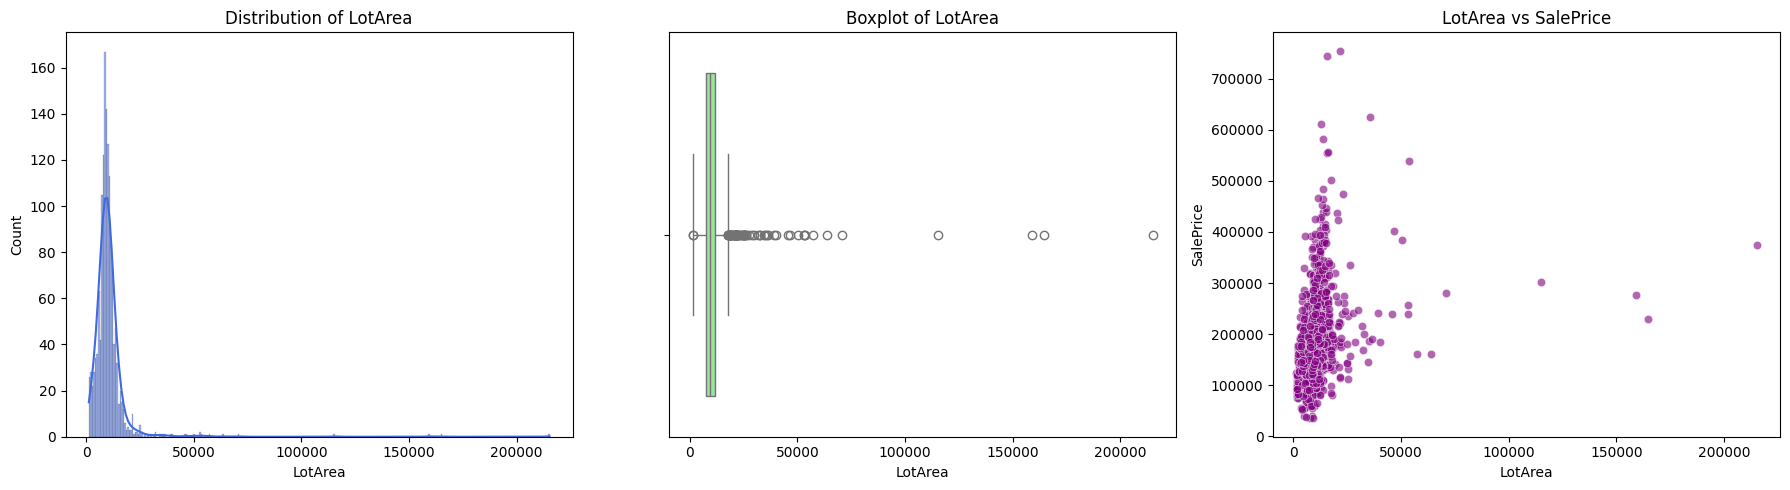


LOTAREA - DESCRIPTIVE STATISTICS:


count          mean          std     min     25%     50%      75%  \
LotArea  1460.0  10516.828082  9981.264932  1300.0  7553.5  9478.5  11601.5   

              max     range        cv  
LotArea  215245.0  213945.0  0.949076


Pearson Correlation with Survived: 0.26
IQR Outliers: 69 (4.7%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: LOTAREA
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
1%         1680.000000
5%         3311.700000
25%        7553.500000
50%        9478.500000
75%       11601.500000
95%       17401.150000
99%       37567.640000
max      215245.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 12.2077 (strong)
• Kurtosis: 203.2433 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 1073
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 1481.5000
• Upper bound: 17673.5000
• Potential outliers: 69 (4.73%)
• Min outlier value: 1300.0000
• Max outlier value: 215245.0000



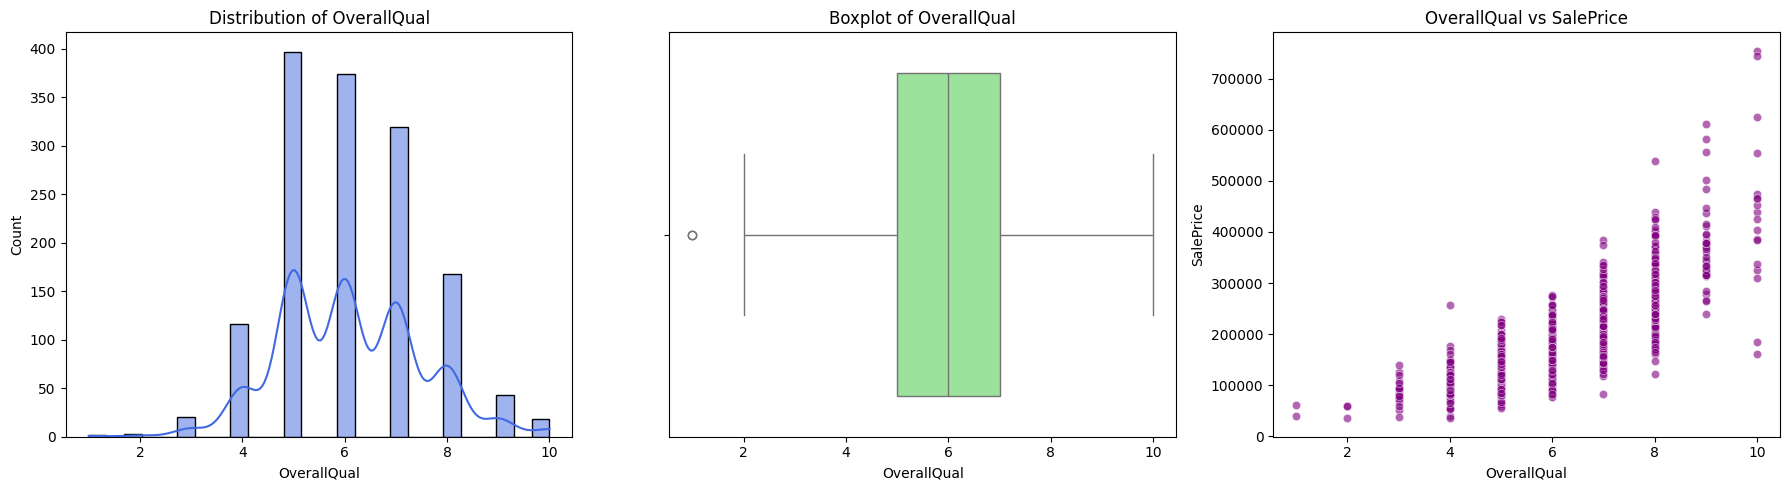


OVERALLQUAL - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%   max  range  \
OverallQual  1460.0  6.099315  1.382997  1.0  5.0  6.0  7.0  10.0    9.0   

                   cv  
OverallQual  0.226746


Pearson Correlation with Survived: 0.79
IQR Outliers: 2 (0.1%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: OVERALLQUAL
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
1%          3.000000
5%          4.000000
25%         5.000000
50%         6.000000
75%         7.000000
95%         8.000000
99%        10.000000
max        10.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.2169 (fairly symmetrical)
• Kurtosis: 0.0963 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 10
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 2.0000
• Upper bound: 10.0000
• Potential outliers: 2 (0.14%)
• Min outlier value: 1.0000
• Max outlier value: 1.0000



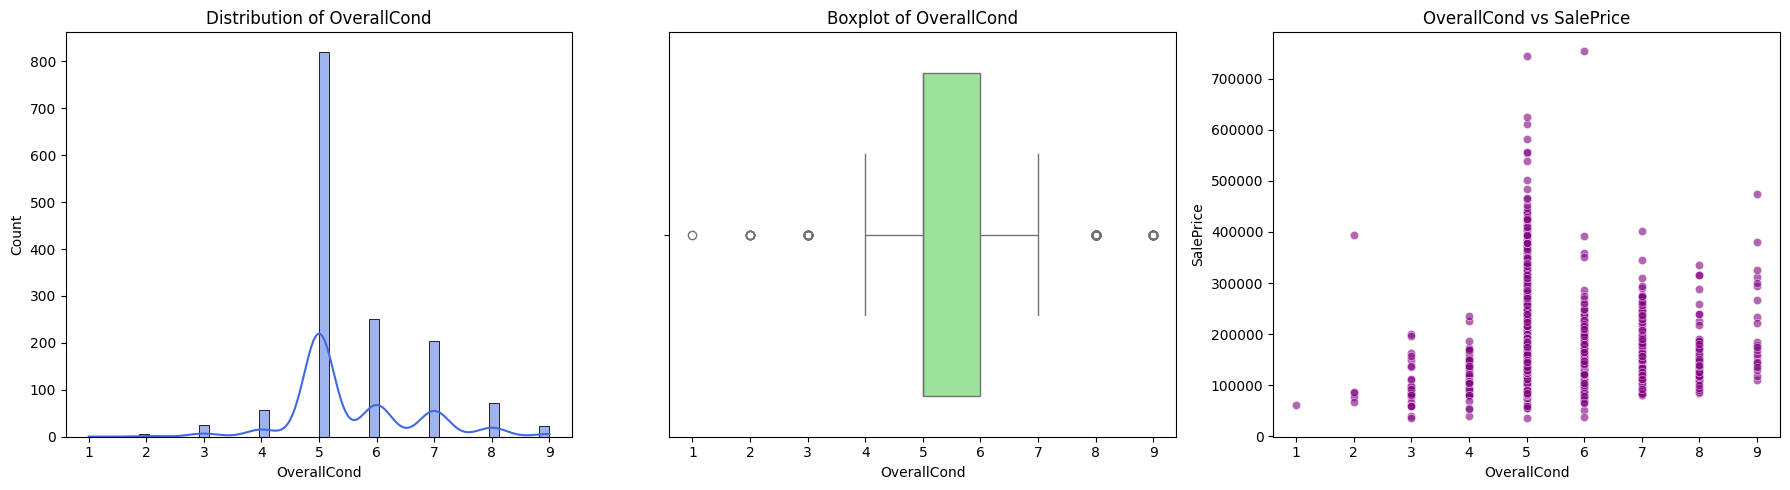


OVERALLCOND - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
OverallCond  1460.0  5.575342  1.112799  1.0  5.0  5.0  6.0  9.0    8.0   

                   cv  
OverallCond  0.199593


Pearson Correlation with Survived: -0.08
IQR Outliers: 125 (8.6%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: OVERALLCOND
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
1%          3.000000
5%          4.000000
25%         5.000000
50%         5.000000
75%         6.000000
95%         8.000000
99%         9.000000
max         9.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.6931 (moderate)
• Kurtosis: 1.1064 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 9
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 3.5000
• Upper bound: 7.5000
• Potential outliers: 125 (8.56%)
• Min outlier value: 1.0000
• Max outlier value: 9.0000



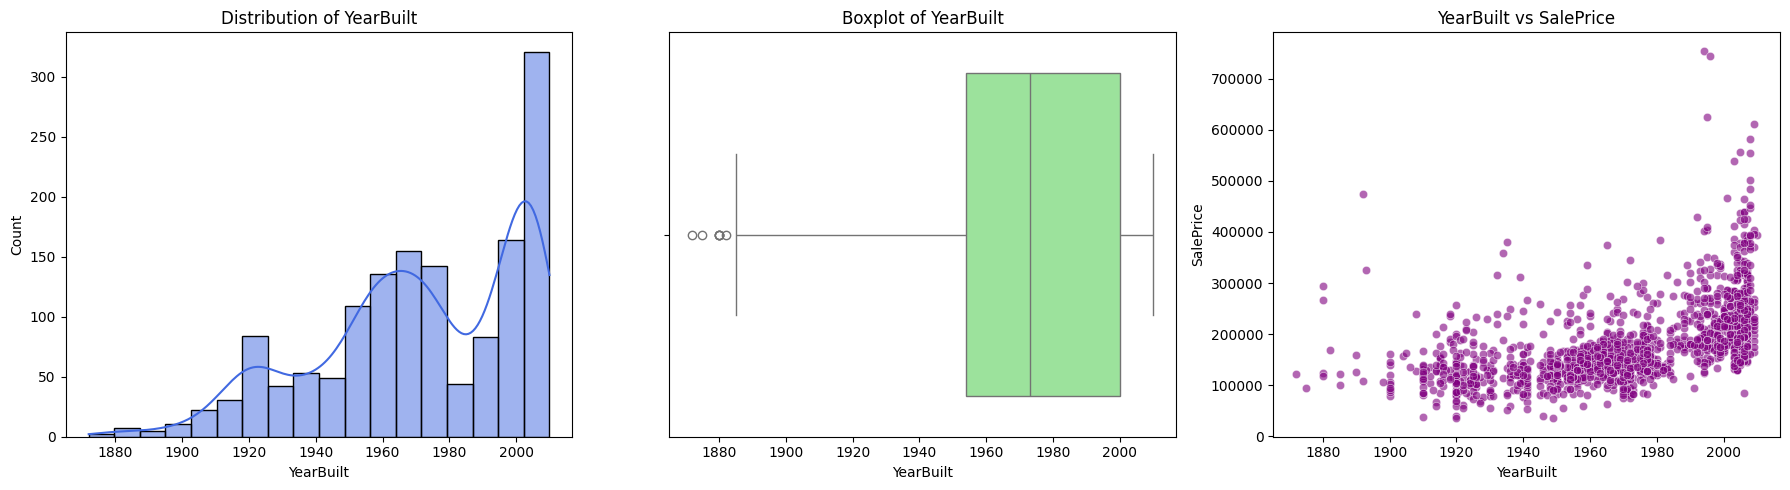


YEARBUILT - DESCRIPTIVE STATISTICS:


count         mean        std     min     25%     50%     75%  \
YearBuilt  1460.0  1971.267808  30.202904  1872.0  1954.0  1973.0  2000.0   

              max  range        cv  
YearBuilt  2010.0  138.0  0.015322


Pearson Correlation with Survived: 0.52
IQR Outliers: 7 (0.5%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: YEARBUILT
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
1%       1899.180000
5%       1916.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
95%      2007.000000
99%      2009.000000
max      2010.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: -0.6135 (moderate)
• Kurtosis: -0.4396 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 112
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 1885.0000
• Upper bound: 2069.0000
• Potential outliers: 7 (0.48%)
• Min outlier value: 1872.0000
• Max outlier value: 1882.0000



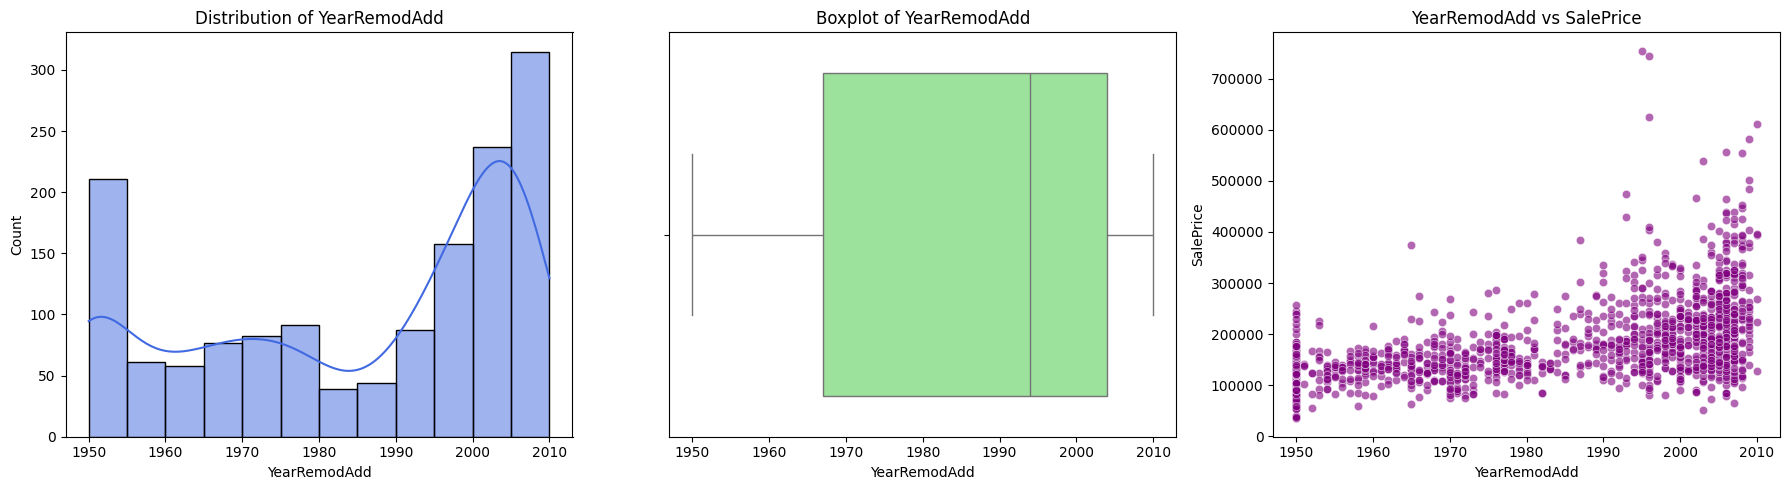


YEARREMODADD - DESCRIPTIVE STATISTICS:


count         mean        std     min     25%     50%     75%  \
YearRemodAdd  1460.0  1984.865753  20.645407  1950.0  1967.0  1994.0  2004.0   

                 max  range        cv  
YearRemodAdd  2010.0   60.0  0.010401


Pearson Correlation with Survived: 0.51
IQR Outliers: 0 (0.0%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: YEARREMODADD
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
1%       1950.000000
5%       1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
95%      2007.000000
99%      2009.000000
max      2010.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: -0.5036 (moderate)
• Kurtosis: -1.2722 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 61
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 1911.5000
• Upper bound: 2059.5000
• Potential outliers: 0 (0.00%)



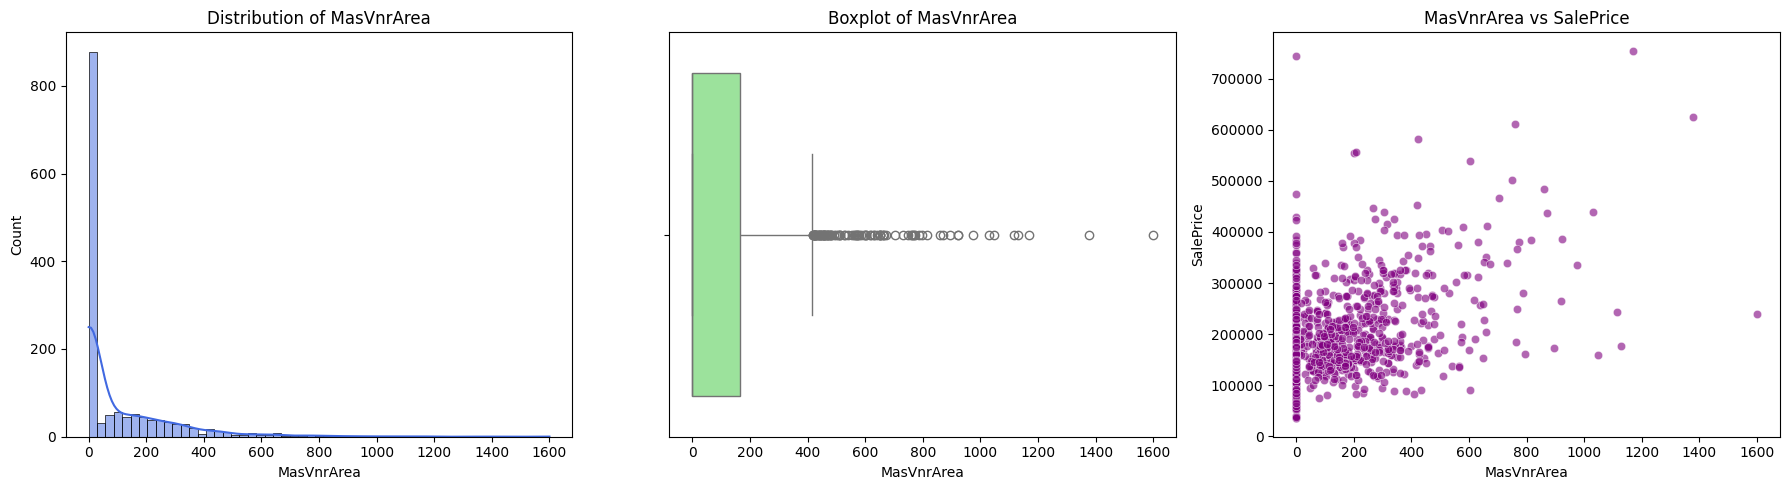


MASVNRAREA - DESCRIPTIVE STATISTICS:


count        mean         std  min  25%  50%    75%     max  \
MasVnrArea  1452.0  103.685262  181.066207  0.0  0.0  0.0  166.0  1600.0   

             range        cv  
MasVnrArea  1600.0  1.746306


Pearson Correlation with Survived: 0.48
IQR Outliers: 96 (6.6%)

Missing Values: 8 (0.5%)
Zero Values: 861 (59.0%)


📊 NUMERICAL COLUMN ANALYSIS: MASVNRAREA
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       166.000000
95%       456.000000
99%       791.920000
max      1600.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 2.6691 (strong)
• Kurtosis: 10.0824 (leptokurtic)
• Missing values: 8 (0.55%)
• Unique values: 327
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -249.0000
• Upper bound: 415.0000
• Potential outliers: 96 (6.58%)
• Min outlier value: 420.0000
• Max outlier value: 1600.0000



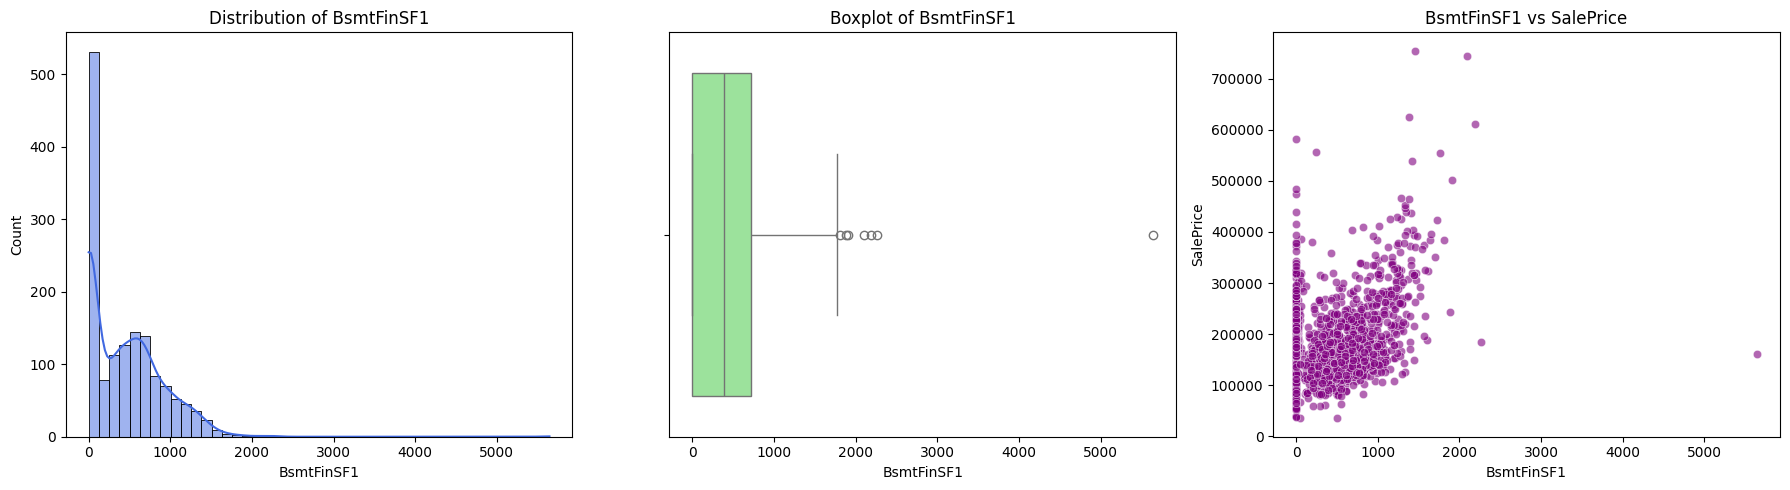


BSMTFINSF1 - DESCRIPTIVE STATISTICS:


count        mean         std  min  25%    50%     75%     max  \
BsmtFinSF1  1460.0  443.639726  456.098091  0.0  0.0  383.5  712.25  5644.0   

             range        cv  
BsmtFinSF1  5644.0  1.028082


Pearson Correlation with Survived: 0.39
IQR Outliers: 7 (0.5%)

Missing Values: 0 (0.0%)
Zero Values: 467 (32.0%)


📊 NUMERICAL COLUMN ANALYSIS: BSMTFINSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%       383.500000
75%       712.250000
95%      1274.000000
99%      1572.410000
max      5644.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.6855 (strong)
• Kurtosis: 11.1182 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 637
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -1068.3750
• Upper bound: 1780.6250
• Potential outliers: 7 (0.48%)
• Min outlier value: 1810.0000
• Max outlier value: 5644.0000



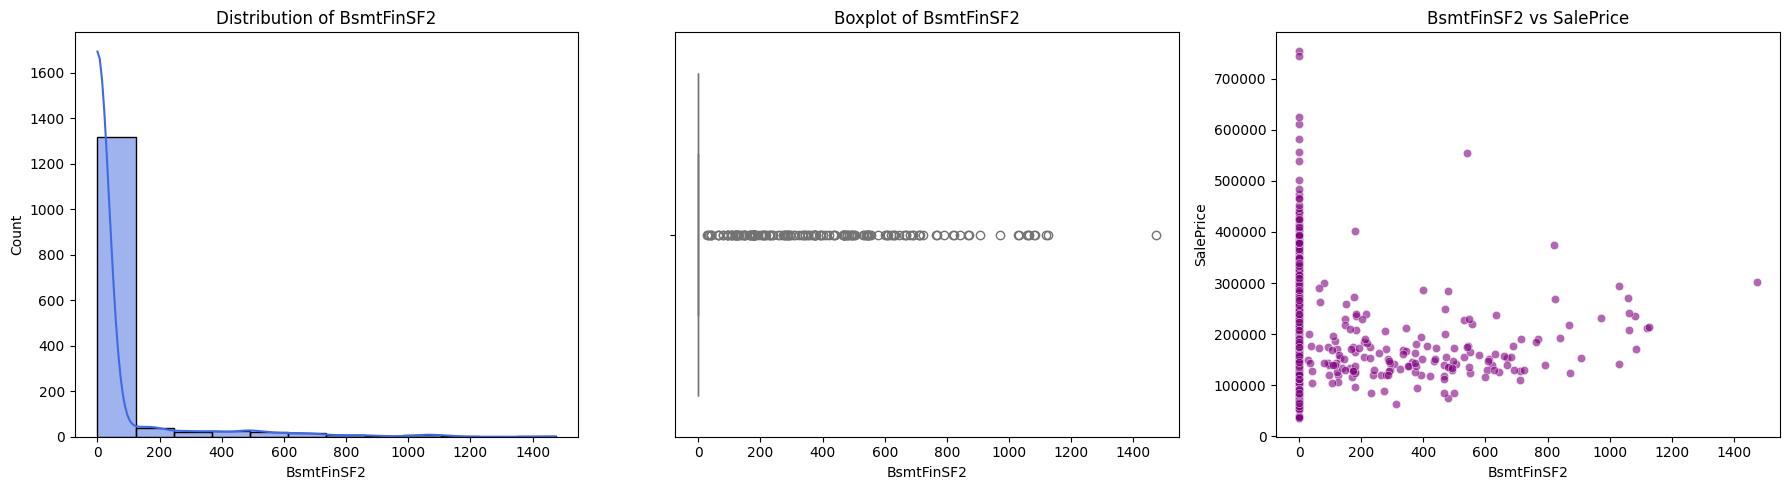


BSMTFINSF2 - DESCRIPTIVE STATISTICS:


count       mean         std  min  25%  50%  75%     max   range  \
BsmtFinSF2  1460.0  46.549315  161.319273  0.0  0.0  0.0  0.0  1474.0  1474.0   

                  cv  
BsmtFinSF2  3.465556


Pearson Correlation with Survived: -0.01
IQR Outliers: 167 (11.4%)

Missing Values: 0 (0.0%)
Zero Values: 1293 (88.6%)


📊 NUMERICAL COLUMN ANALYSIS: BSMTFINSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       396.200000
99%       830.380000
max      1474.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 4.2553 (strong)
• Kurtosis: 20.1133 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 144
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 167 (11.44%)
• Min outlier value: 28.0000
• Max outlier value: 1474.0000



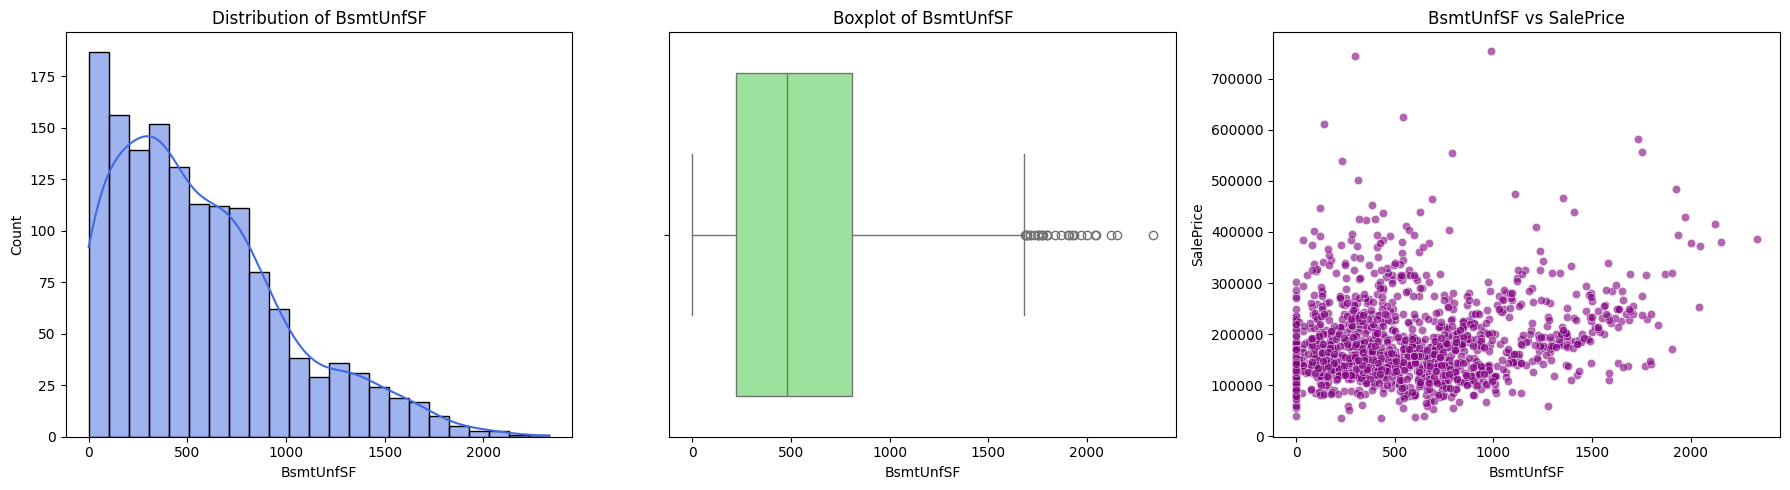


BSMTUNFSF - DESCRIPTIVE STATISTICS:


count        mean         std  min    25%    50%    75%     max  \
BsmtUnfSF  1460.0  567.240411  441.866955  0.0  223.0  477.5  808.0  2336.0   

            range        cv  
BsmtUnfSF  2336.0  0.778977


Pearson Correlation with Survived: 0.21
IQR Outliers: 29 (2.0%)

Missing Values: 0 (0.0%)
Zero Values: 118 (8.1%)


📊 NUMERICAL COLUMN ANALYSIS: BSMTUNFSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
1%          0.000000
5%          0.000000
25%       223.000000
50%       477.500000
75%       808.000000
95%      1468.000000
99%      1797.050000
max      2336.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.9203 (moderate)
• Kurtosis: 0.4750 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 780
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -654.5000
• Upper bound: 1685.5000
• Potential outliers: 29 (1.99%)
• Min outlier value: 1686.0000
• Max outlier value: 2336.0000



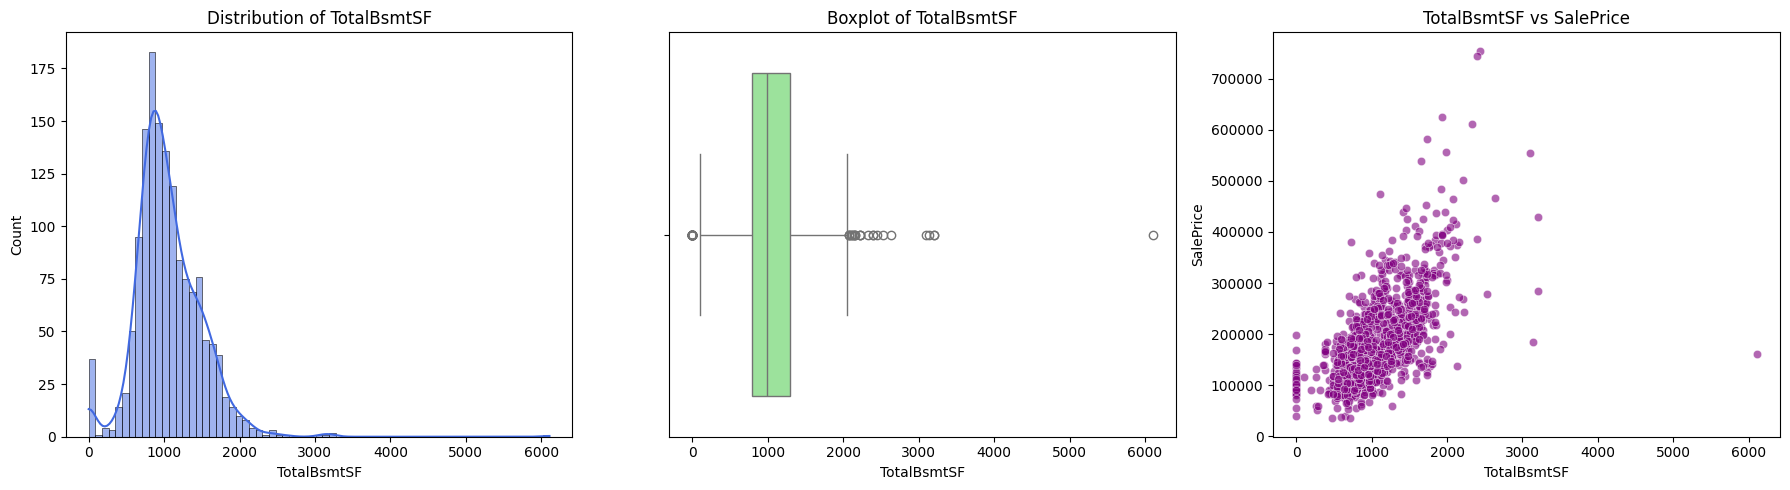


TOTALBSMTSF - DESCRIPTIVE STATISTICS:


count         mean         std  min     25%    50%      75%  \
TotalBsmtSF  1460.0  1057.429452  438.705324  0.0  795.75  991.5  1298.25   

                max   range        cv  
TotalBsmtSF  6110.0  6110.0  0.414879


Pearson Correlation with Survived: 0.61
IQR Outliers: 61 (4.2%)

Missing Values: 0 (0.0%)
Zero Values: 37 (2.5%)


📊 NUMERICAL COLUMN ANALYSIS: TOTALBSMTSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
1%          0.000000
5%        519.300000
25%       795.750000
50%       991.500000
75%      1298.250000
95%      1753.000000
99%      2155.050000
max      6110.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.5243 (strong)
• Kurtosis: 13.2505 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 721
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 42.0000
• Upper bound: 2052.0000
• Potential outliers: 61 (4.18%)
• Min outlier value: 0.0000
• Max outlier value: 6110.0000



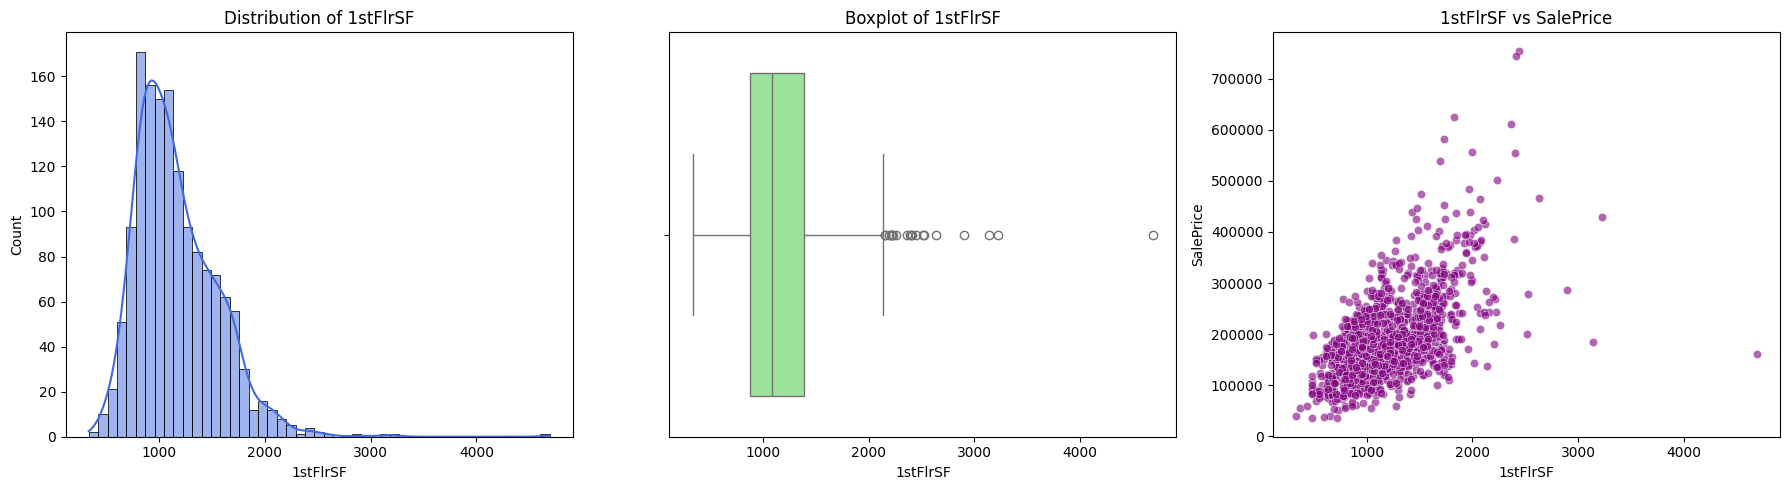


1STFLRSF - DESCRIPTIVE STATISTICS:


count         mean         std    min    25%     50%      75%  \
1stFlrSF  1460.0  1162.626712  386.587738  334.0  882.0  1087.0  1391.25   

             max   range        cv  
1stFlrSF  4692.0  4358.0  0.332512


Pearson Correlation with Survived: 0.61
IQR Outliers: 20 (1.4%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: 1STFLRSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
1%        520.000000
5%        672.950000
25%       882.000000
50%      1087.000000
75%      1391.250000
95%      1831.250000
99%      2219.460000
max      4692.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.3768 (strong)
• Kurtosis: 5.7458 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 753
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 118.1250
• Upper bound: 2155.1250
• Potential outliers: 20 (1.37%)
• Min outlier value: 2156.0000
• Max outlier value: 4692.0000



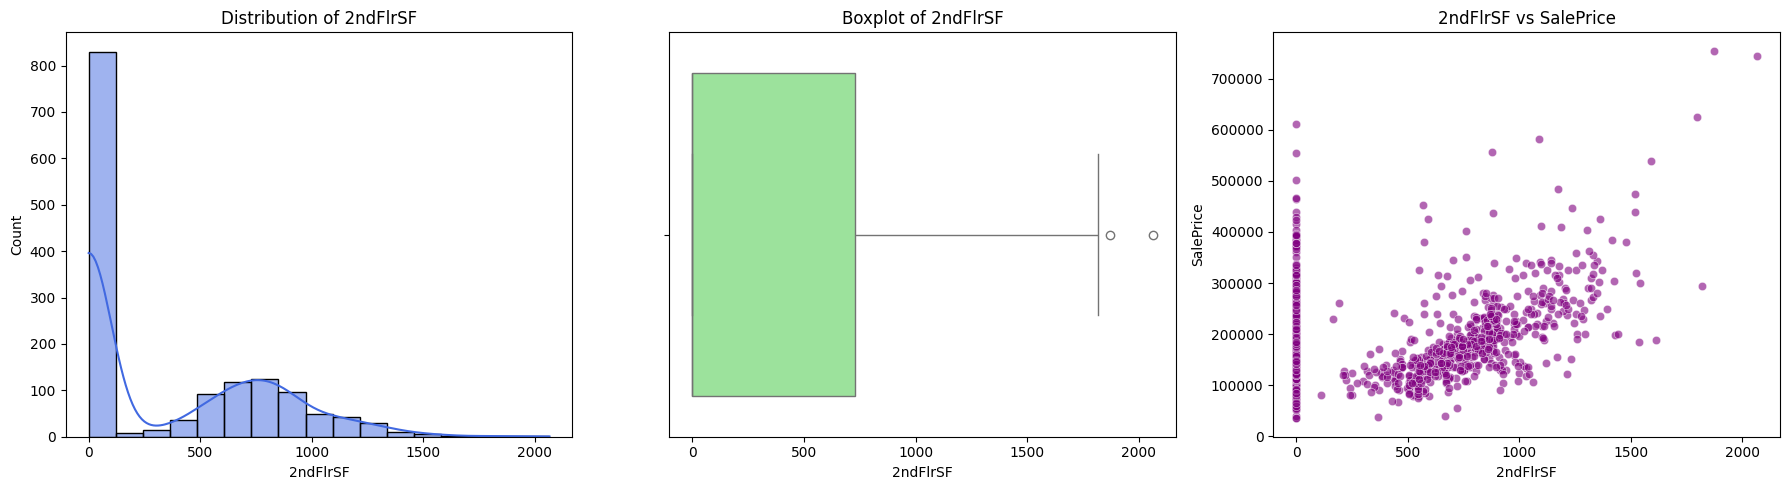


2NDFLRSF - DESCRIPTIVE STATISTICS:


count        mean         std  min  25%  50%    75%     max  \
2ndFlrSF  1460.0  346.992466  436.528436  0.0  0.0  0.0  728.0  2065.0   

           range        cv  
2ndFlrSF  2065.0  1.258034


Pearson Correlation with Survived: 0.32
IQR Outliers: 2 (0.1%)

Missing Values: 0 (0.0%)
Zero Values: 829 (56.8%)


📊 NUMERICAL COLUMN ANALYSIS: 2NDFLRSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       728.000000
95%      1141.050000
99%      1418.920000
max      2065.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.8130 (moderate)
• Kurtosis: -0.5535 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 417
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -1092.0000
• Upper bound: 1820.0000
• Potential outliers: 2 (0.14%)
• Min outlier value: 1872.0000
• Max outlier value: 2065.0000



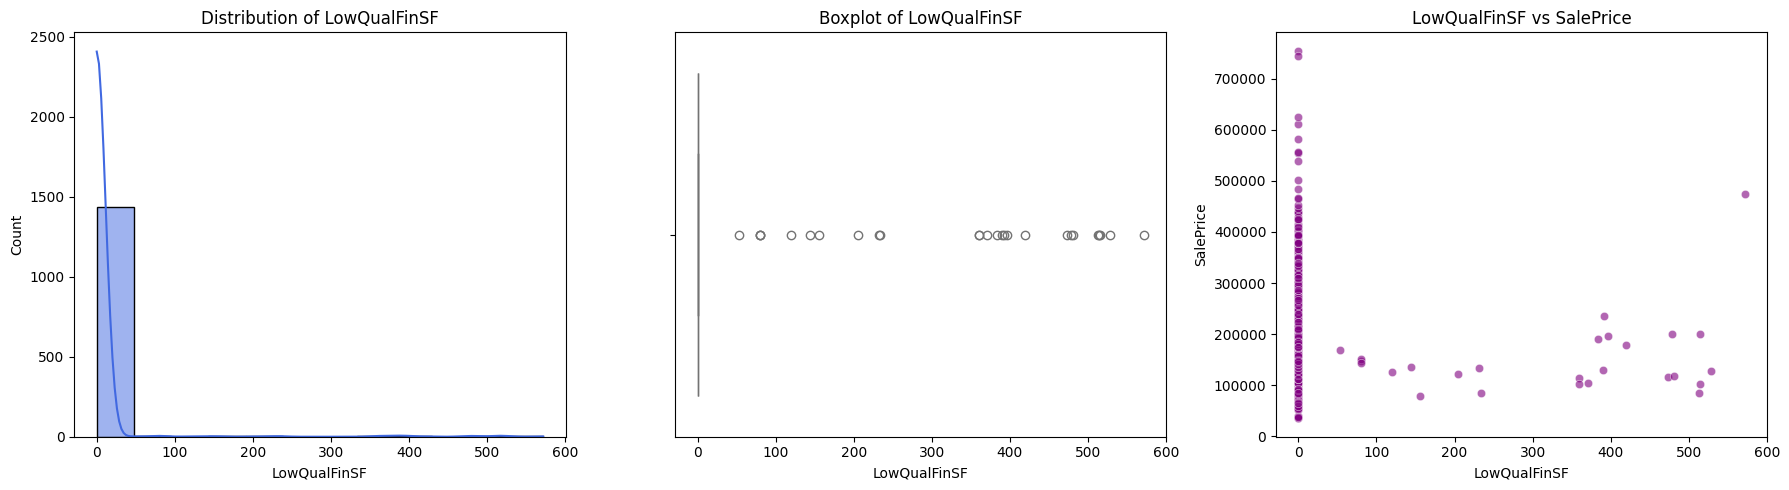


LOWQUALFINSF - DESCRIPTIVE STATISTICS:


count      mean        std  min  25%  50%  75%    max  range  \
LowQualFinSF  1460.0  5.844521  48.623081  0.0  0.0  0.0  0.0  572.0  572.0   

                   cv  
LowQualFinSF  8.31943


Pearson Correlation with Survived: -0.03
IQR Outliers: 26 (1.8%)

Missing Values: 0 (0.0%)
Zero Values: 1434 (98.2%)


📊 NUMERICAL COLUMN ANALYSIS: LOWQUALFINSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
99%       360.000000
max       572.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 9.0113 (strong)
• Kurtosis: 83.2348 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 24
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 26 (1.78%)
• Min outlier value: 53.0000
• Max outlier value: 572.0000



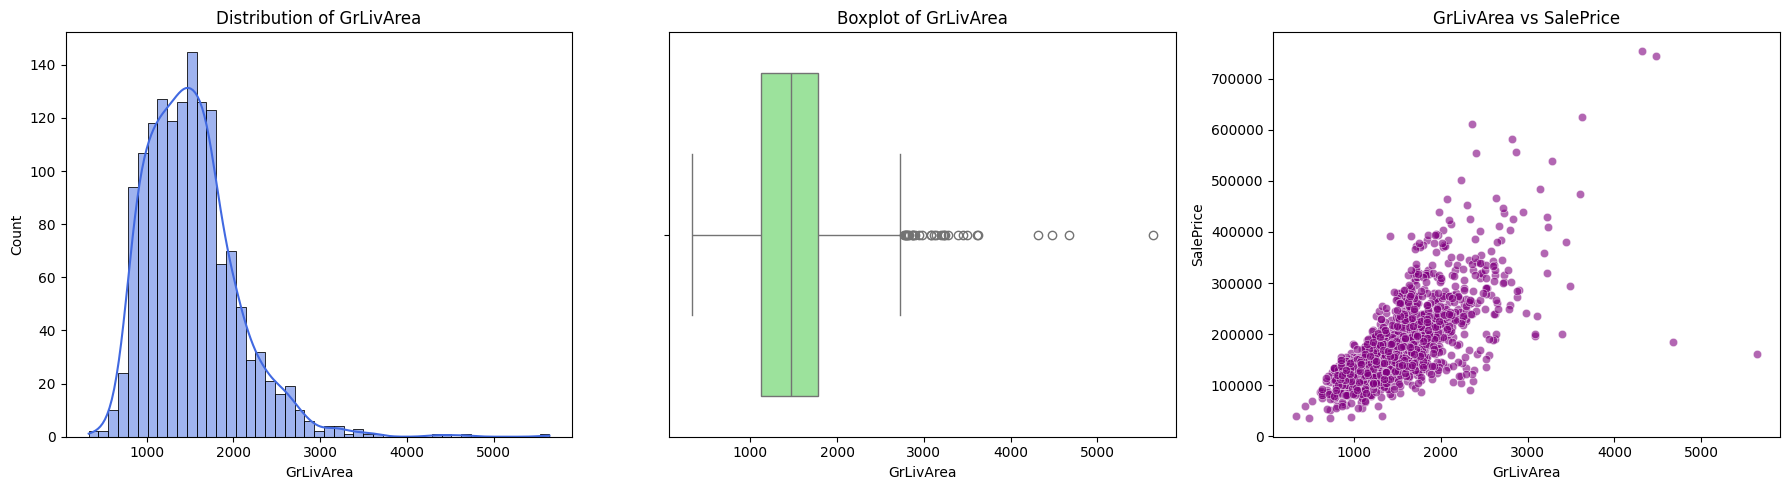


GRLIVAREA - DESCRIPTIVE STATISTICS:


count         mean         std    min     25%     50%      75%  \
GrLivArea  1460.0  1515.463699  525.480383  334.0  1129.5  1464.0  1776.75   

              max   range        cv  
GrLivArea  5642.0  5308.0  0.346746


Pearson Correlation with Survived: 0.71
IQR Outliers: 31 (2.1%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: GRLIVAREA
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
1%        692.180000
5%        848.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
95%      2466.100000
99%      3123.480000
max      5642.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.3666 (strong)
• Kurtosis: 4.8951 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 861
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 158.6250
• Upper bound: 2747.6250
• Potential outliers: 31 (2.12%)
• Min outlier value: 2775.0000
• Max outlier value: 5642.0000



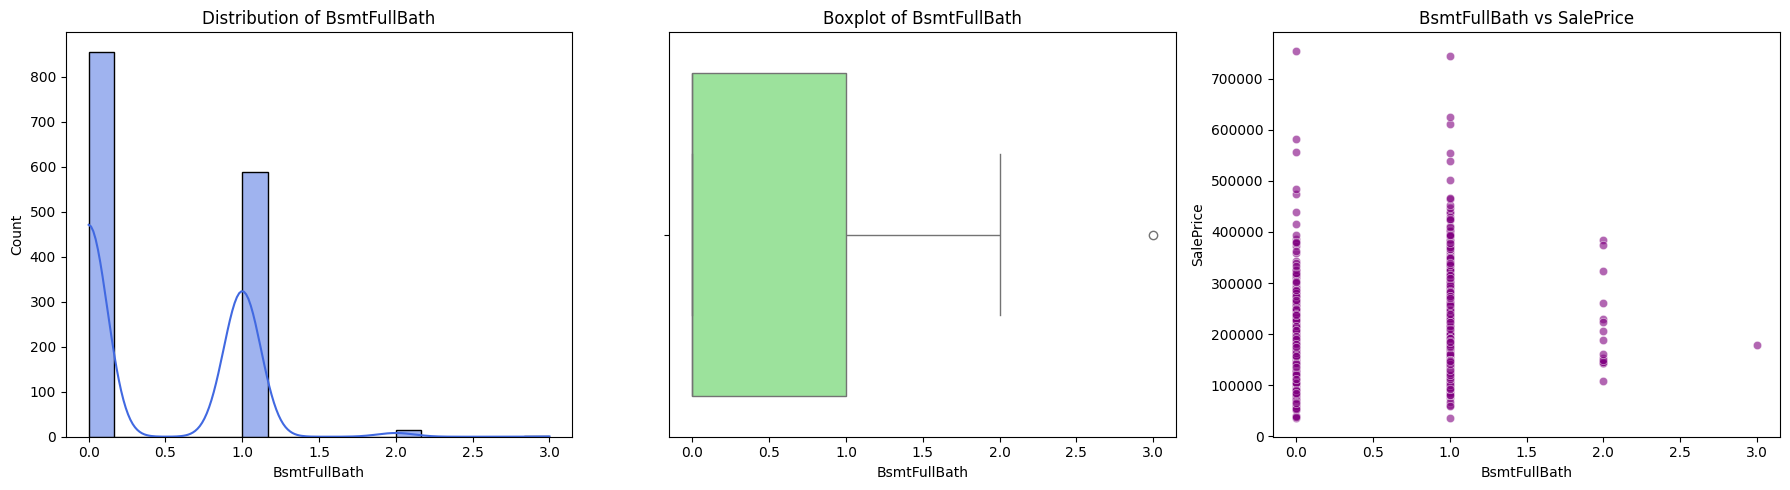


BSMTFULLBATH - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
BsmtFullBath  1460.0  0.425342  0.518911  0.0  0.0  0.0  1.0  3.0    3.0   

                    cv  
BsmtFullBath  1.219983


Pearson Correlation with Survived: 0.23
IQR Outliers: 1 (0.1%)

Missing Values: 0 (0.0%)
Zero Values: 856 (58.6%)


📊 NUMERICAL COLUMN ANALYSIS: BSMTFULLBATH
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         1.000000
95%         1.000000
99%         2.000000
max         3.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.5961 (moderate)
• Kurtosis: -0.8391 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 4
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -1.5000
• Upper bound: 2.5000
• Potential outliers: 1 (0.07%)
• Min outlier value: 3.0000
• Max outlier value: 3.0000



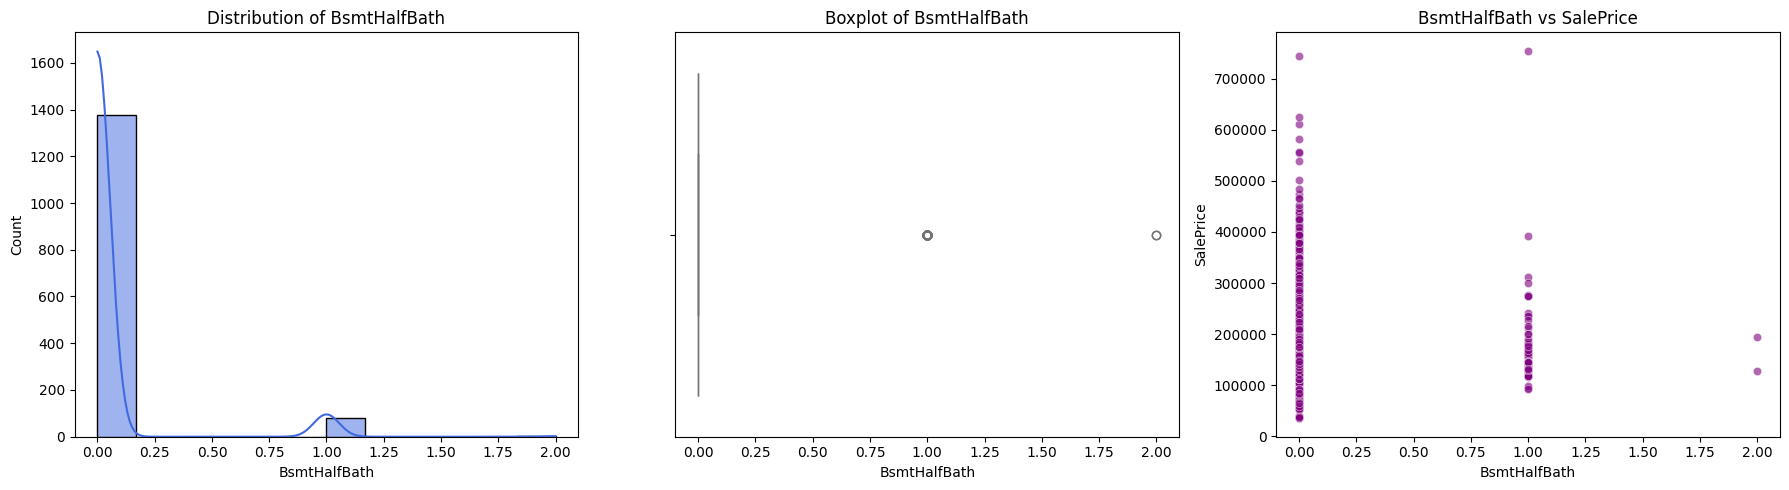


BSMTHALFBATH - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
BsmtHalfBath  1460.0  0.057534  0.238753  0.0  0.0  0.0  0.0  2.0    2.0   

                    cv  
BsmtHalfBath  4.149748


Pearson Correlation with Survived: -0.02
IQR Outliers: 82 (5.6%)

Missing Values: 0 (0.0%)
Zero Values: 1378 (94.4%)


📊 NUMERICAL COLUMN ANALYSIS: BSMTHALFBATH
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         1.000000
99%         1.000000
max         2.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 4.1034 (strong)
• Kurtosis: 16.3966 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 3
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 82 (5.62%)
• Min outlier value: 1.0000
• Max outlier value: 2.0000



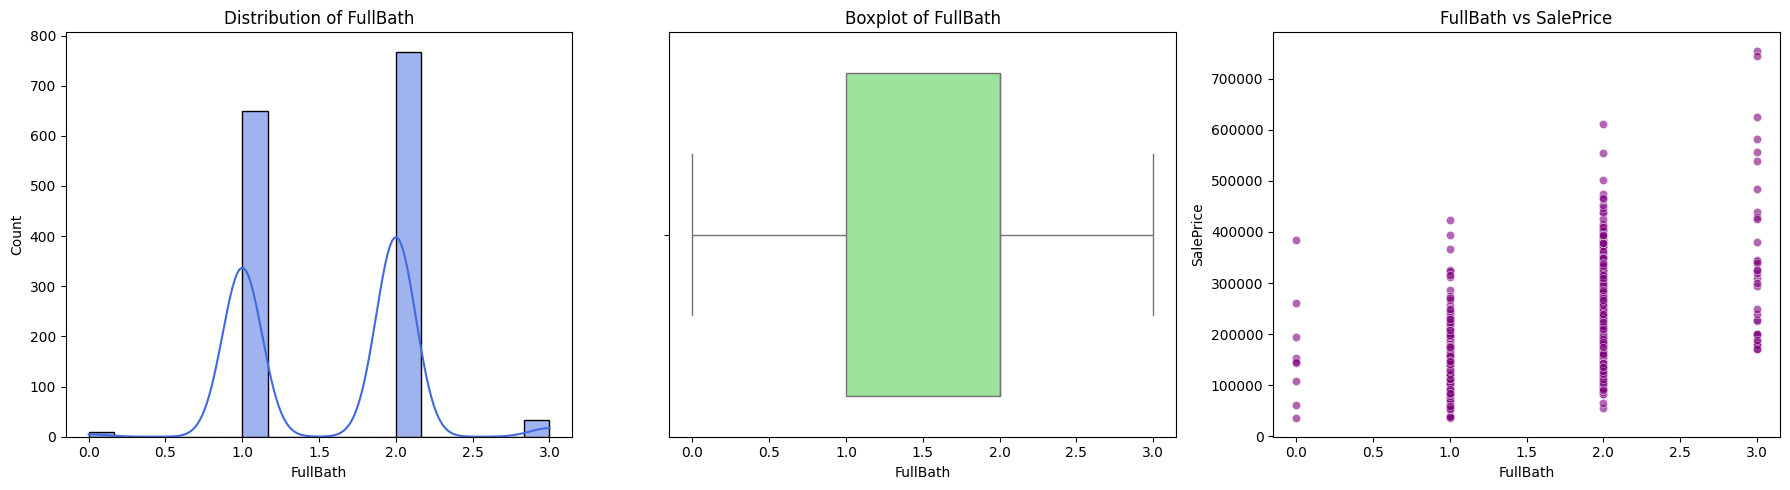


FULLBATH - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range        cv
FullBath  1460.0  1.565068  0.550916  0.0  1.0  2.0  2.0  3.0    3.0  0.352007


Pearson Correlation with Survived: 0.56
IQR Outliers: 0 (0.0%)

Missing Values: 0 (0.0%)
Zero Values: 9 (0.6%)


📊 NUMERICAL COLUMN ANALYSIS: FULLBATH
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
1%          1.000000
5%          1.000000
25%         1.000000
50%         2.000000
75%         2.000000
95%         2.000000
99%         3.000000
max         3.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.0366 (fairly symmetrical)
• Kurtosis: -0.8570 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 4
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -0.5000
• Upper bound: 3.5000
• Potential outliers: 0 (0.00%)



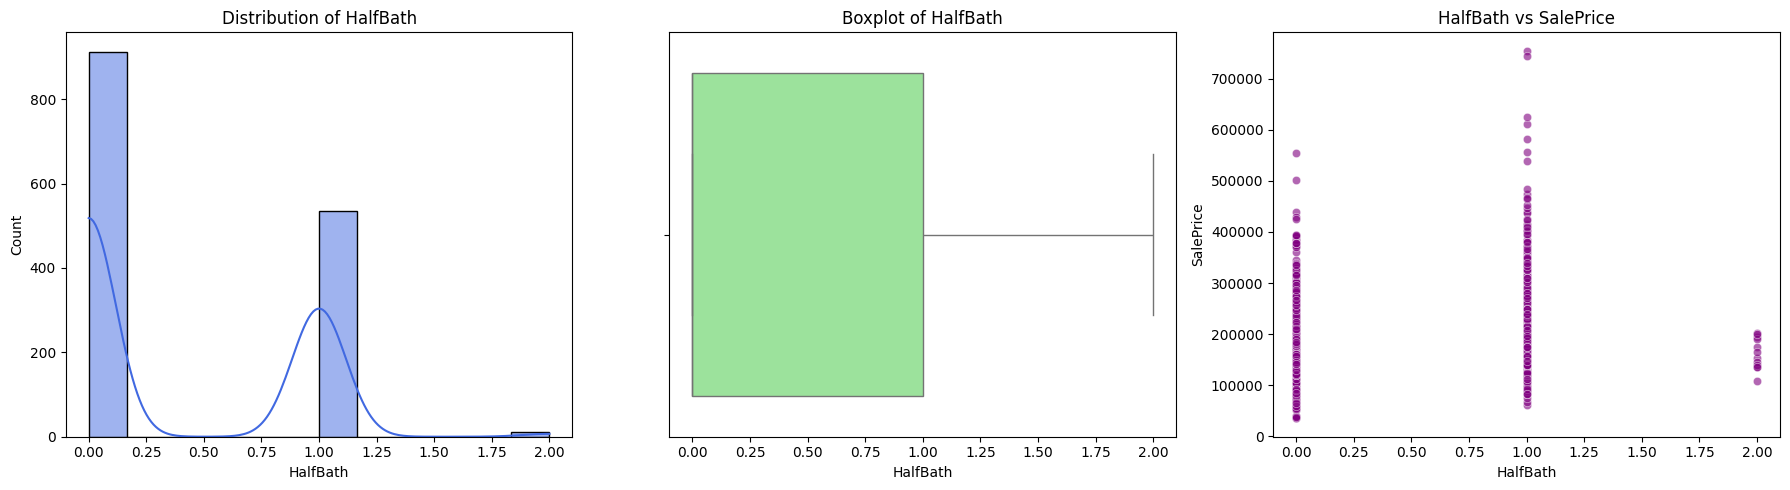


HALFBATH - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range        cv
HalfBath  1460.0  0.382877  0.502885  0.0  0.0  0.0  1.0  2.0    2.0  1.313439


Pearson Correlation with Survived: 0.28
IQR Outliers: 0 (0.0%)

Missing Values: 0 (0.0%)
Zero Values: 913 (62.5%)


📊 NUMERICAL COLUMN ANALYSIS: HALFBATH
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         1.000000
95%         1.000000
99%         1.000000
max         2.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.6759 (moderate)
• Kurtosis: -1.0769 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 3
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -1.5000
• Upper bound: 2.5000
• Potential outliers: 0 (0.00%)



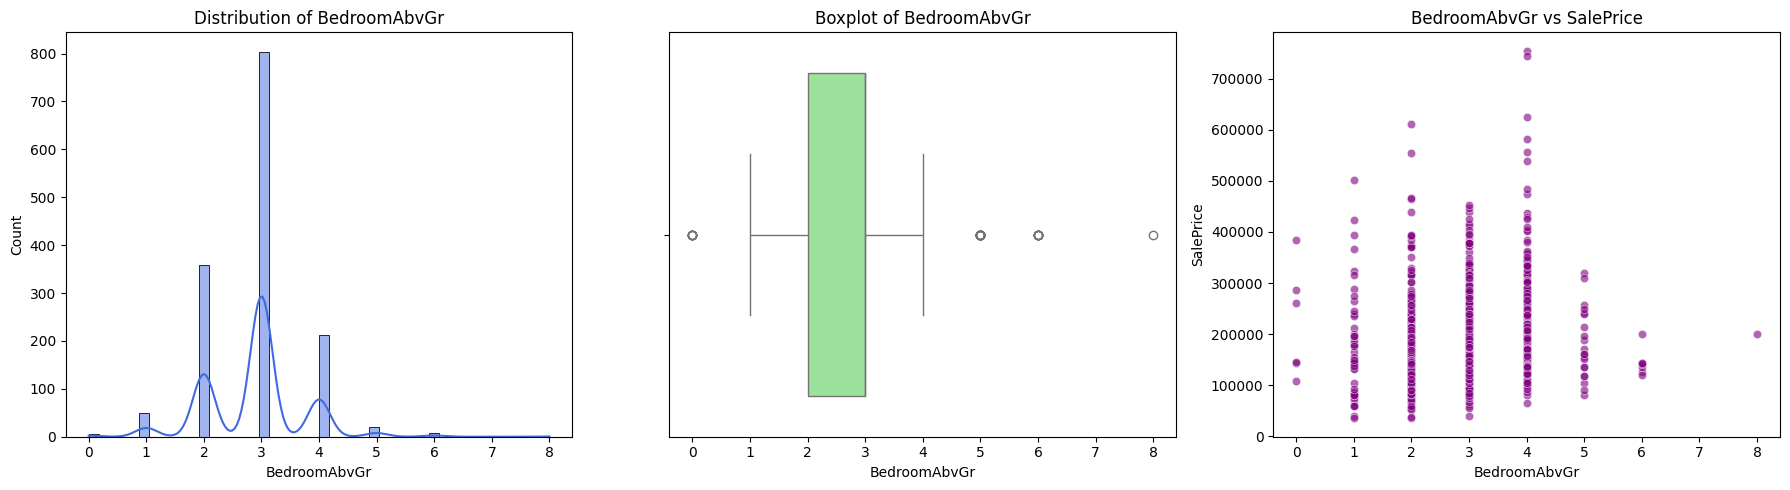


BEDROOMABVGR - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
BedroomAbvGr  1460.0  2.866438  0.815778  0.0  2.0  3.0  3.0  8.0    8.0   

                    cv  
BedroomAbvGr  0.284596


Pearson Correlation with Survived: 0.17
IQR Outliers: 35 (2.4%)

Missing Values: 0 (0.0%)
Zero Values: 6 (0.4%)


📊 NUMERICAL COLUMN ANALYSIS: BEDROOMABVGR
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
1%          1.000000
5%          2.000000
25%         2.000000
50%         3.000000
75%         3.000000
95%         4.000000
99%         5.000000
max         8.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.2118 (fairly symmetrical)
• Kurtosis: 2.2309 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 8
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.5000
• Upper bound: 4.5000
• Potential outliers: 35 (2.40%)
• Min outlier value: 0.0000
• Max outlier value: 8.0000



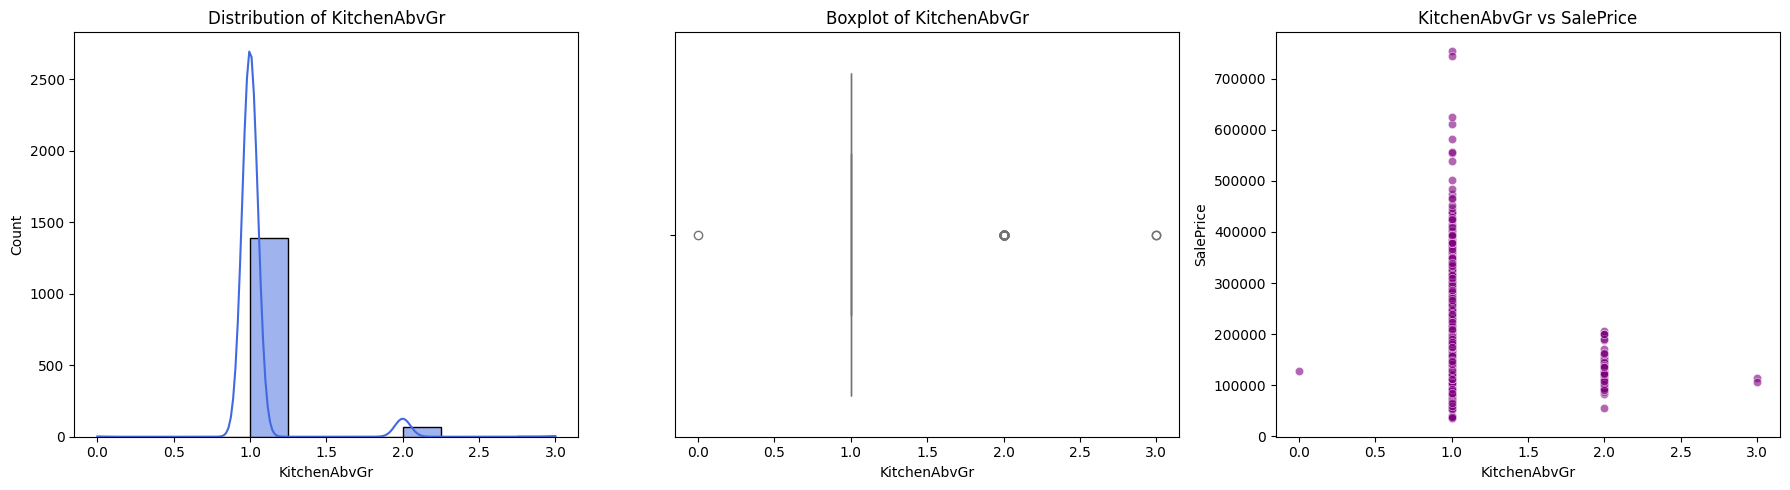


KITCHENABVGR - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
KitchenAbvGr  1460.0  1.046575  0.220338  0.0  1.0  1.0  1.0  3.0    3.0   

                    cv  
KitchenAbvGr  0.210533


Pearson Correlation with Survived: -0.14
IQR Outliers: 68 (4.7%)

Missing Values: 0 (0.0%)
Zero Values: 1 (0.1%)


📊 NUMERICAL COLUMN ANALYSIS: KITCHENABVGR
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
1%          1.000000
5%          1.000000
25%         1.000000
50%         1.000000
75%         1.000000
95%         1.000000
99%         2.000000
max         3.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 4.4884 (strong)
• Kurtosis: 21.5324 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 4
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 1.0000
• Upper bound: 1.0000
• Potential outliers: 68 (4.66%)
• Min outlier value: 0.0000
• Max outlier value: 3.0000



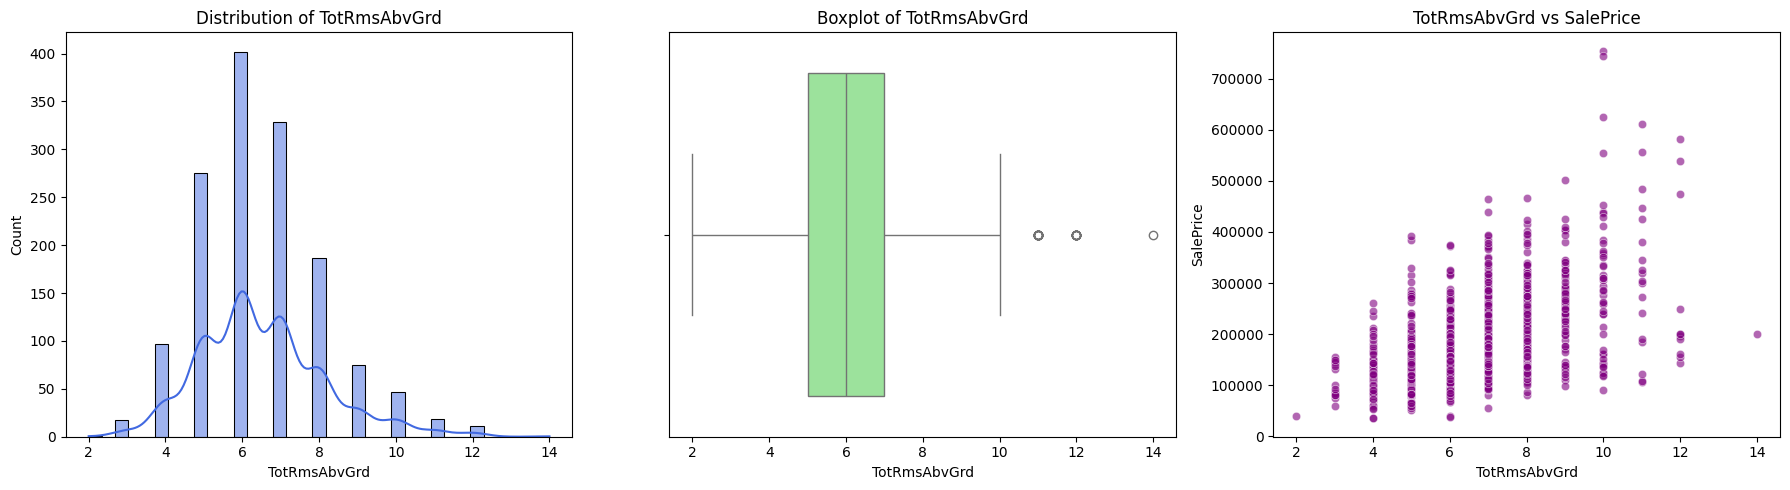


TOTRMSABVGRD - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%   max  range  \
TotRmsAbvGrd  1460.0  6.517808  1.625393  2.0  5.0  6.0  7.0  14.0   12.0   

                    cv  
TotRmsAbvGrd  0.249377


Pearson Correlation with Survived: 0.53
IQR Outliers: 30 (2.1%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: TOTRMSABVGRD
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
1%          3.000000
5%          4.000000
25%         5.000000
50%         6.000000
75%         7.000000
95%        10.000000
99%        11.000000
max        14.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.6763 (moderate)
• Kurtosis: 0.8808 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 12
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 2.0000
• Upper bound: 10.0000
• Potential outliers: 30 (2.05%)
• Min outlier value: 11.0000
• Max outlier value: 14.0000



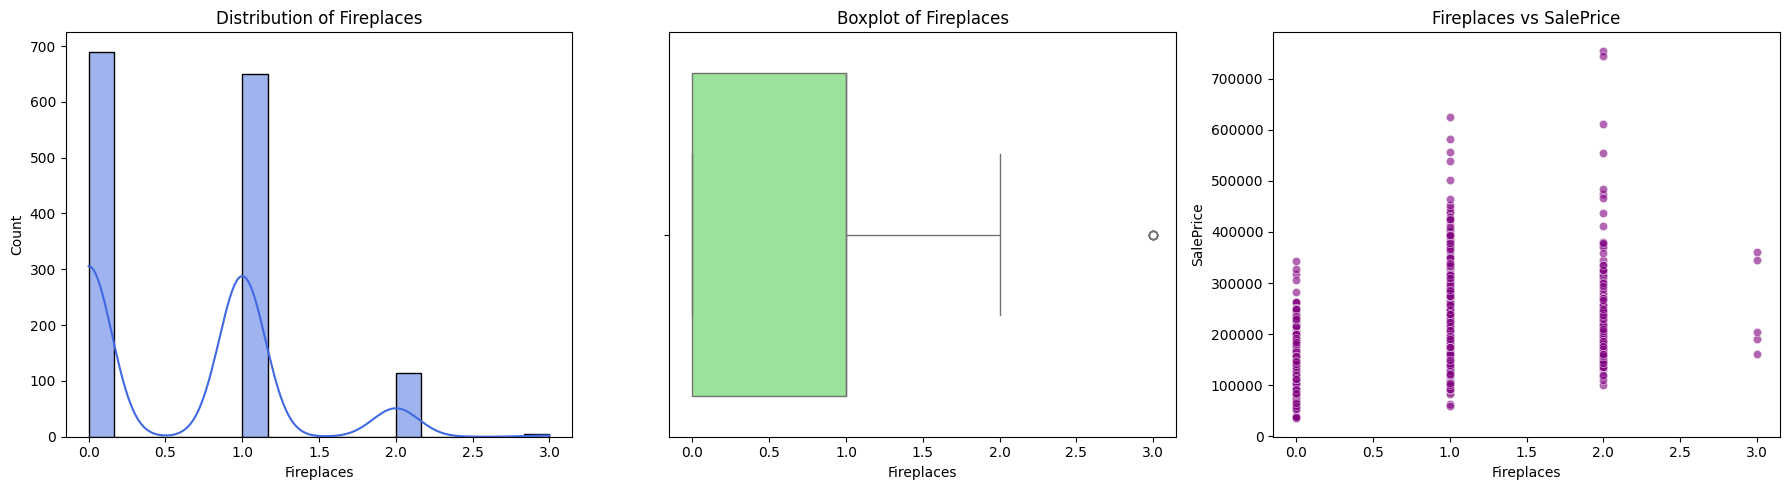


FIREPLACES - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
Fireplaces  1460.0  0.613014  0.644666  0.0  0.0  1.0  1.0  3.0    3.0   

                  cv  
Fireplaces  1.051635


Pearson Correlation with Survived: 0.47
IQR Outliers: 5 (0.3%)

Missing Values: 0 (0.0%)
Zero Values: 690 (47.3%)


📊 NUMERICAL COLUMN ANALYSIS: FIREPLACES
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         1.000000
75%         1.000000
95%         2.000000
99%         2.000000
max         3.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.6496 (moderate)
• Kurtosis: -0.2172 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 4
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -1.5000
• Upper bound: 2.5000
• Potential outliers: 5 (0.34%)
• Min outlier value: 3.0000
• Max outlier value: 3.0000



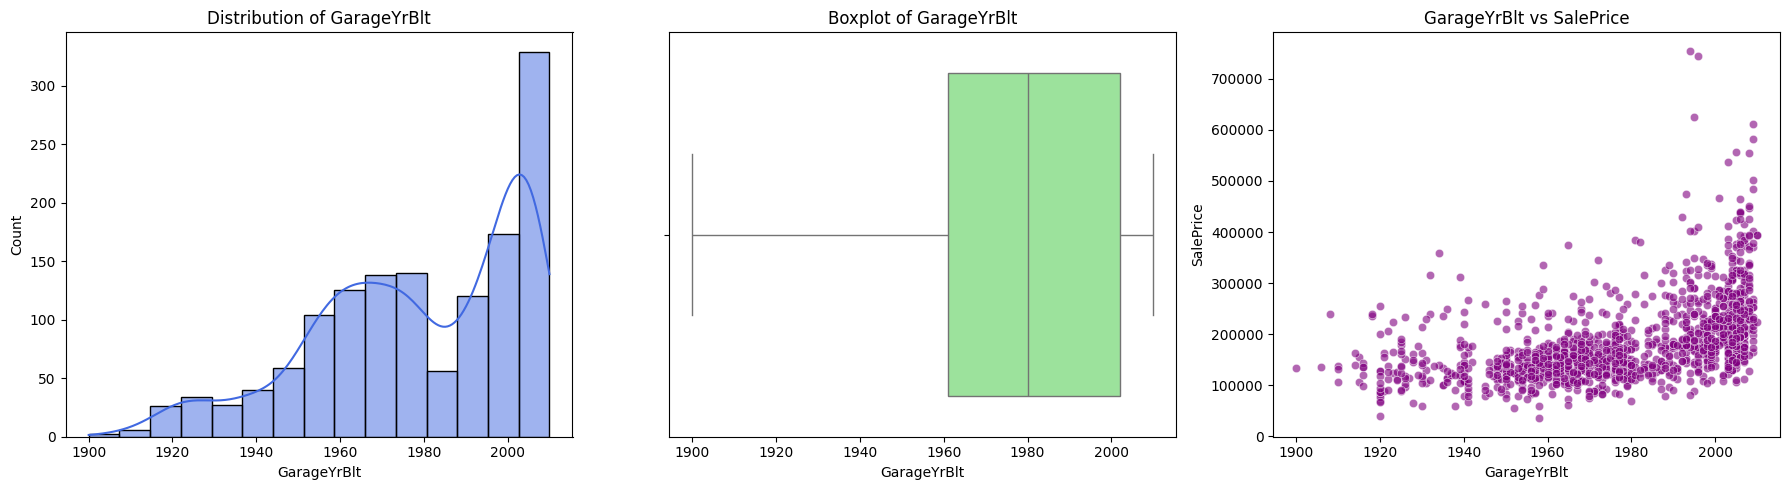


GARAGEYRBLT - DESCRIPTIVE STATISTICS:


count         mean        std     min     25%     50%     75%  \
GarageYrBlt  1379.0  1978.506164  24.689725  1900.0  1961.0  1980.0  2002.0   

                max  range        cv  
GarageYrBlt  2010.0  110.0  0.012479


Pearson Correlation with Survived: 0.49
IQR Outliers: 0 (0.0%)

Missing Values: 81 (5.5%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: GARAGEYRBLT
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
1%       1916.000000
5%       1930.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
95%      2007.000000
99%      2009.000000
max      2010.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: -0.6494 (moderate)
• Kurtosis: -0.4183 (platykurtic)
• Missing values: 81 (5.55%)
• Unique values: 97
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 1899.5000
• Upper bound: 2063.5000
• Potential outliers: 0 (0.00%)



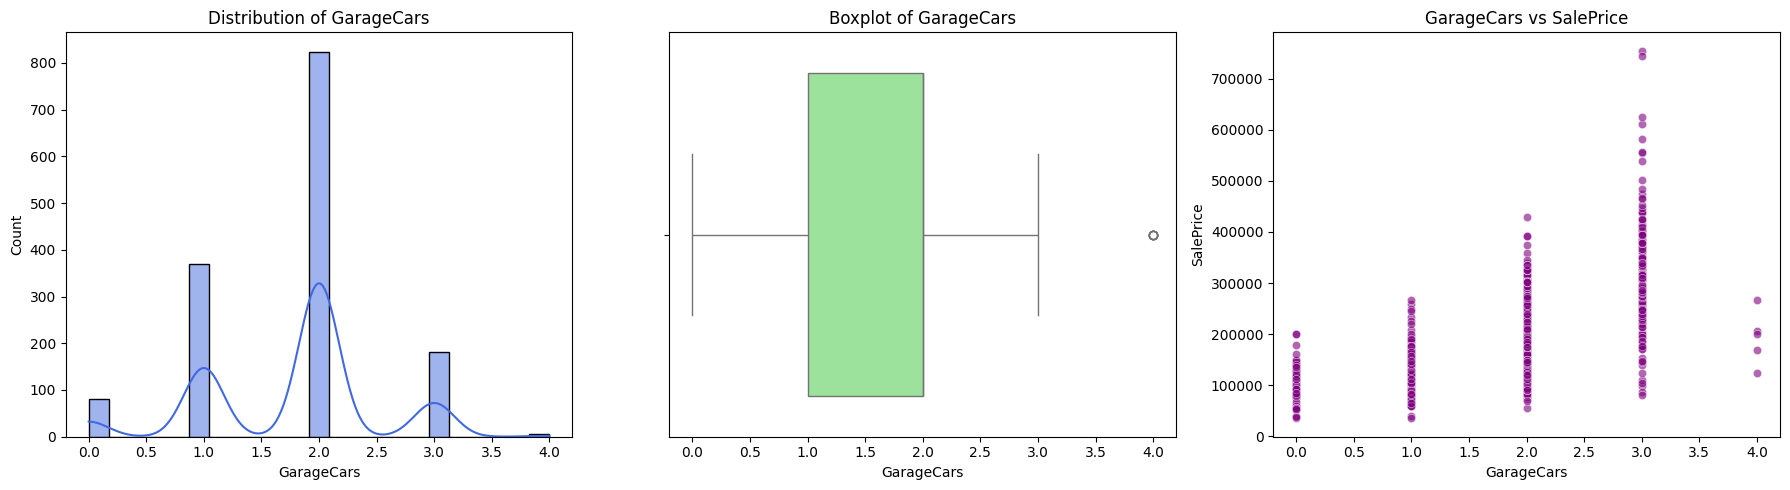


GARAGECARS - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%  max  range  \
GarageCars  1460.0  1.767123  0.747315  0.0  1.0  2.0  2.0  4.0    4.0   

                  cv  
GarageCars  0.422899


Pearson Correlation with Survived: 0.64
IQR Outliers: 5 (0.3%)

Missing Values: 0 (0.0%)
Zero Values: 81 (5.5%)


📊 NUMERICAL COLUMN ANALYSIS: GARAGECARS
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         2.000000
95%         3.000000
99%         3.000000
max         4.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: -0.3425 (fairly symmetrical)
• Kurtosis: 0.2210 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 5
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -0.5000
• Upper bound: 3.5000
• Potential outliers: 5 (0.34%)
• Min outlier value: 4.0000
• Max outlier value: 4.0000



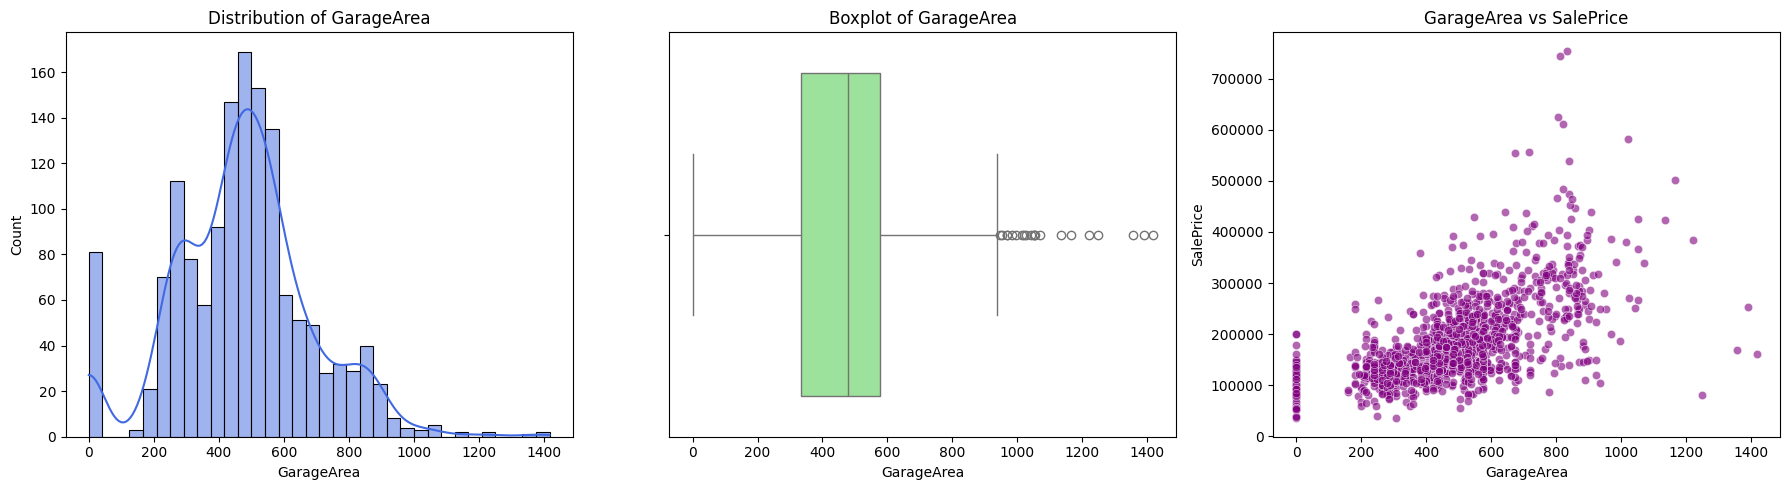


GARAGEAREA - DESCRIPTIVE STATISTICS:


count        mean         std  min    25%    50%    75%     max  \
GarageArea  1460.0  472.980137  213.804841  0.0  334.5  480.0  576.0  1418.0   

             range        cv  
GarageArea  1418.0  0.452038


Pearson Correlation with Survived: 0.62
IQR Outliers: 21 (1.4%)

Missing Values: 0 (0.0%)
Zero Values: 81 (5.5%)


📊 NUMERICAL COLUMN ANALYSIS: GARAGEAREA
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
1%          0.000000
5%          0.000000
25%       334.500000
50%       480.000000
75%       576.000000
95%       850.100000
99%      1002.790000
max      1418.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.1800 (fairly symmetrical)
• Kurtosis: 0.9171 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 441
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -27.7500
• Upper bound: 938.2500
• Potential outliers: 21 (1.44%)
• Min outlier value: 947.0000
• Max outlier value: 1418.0000



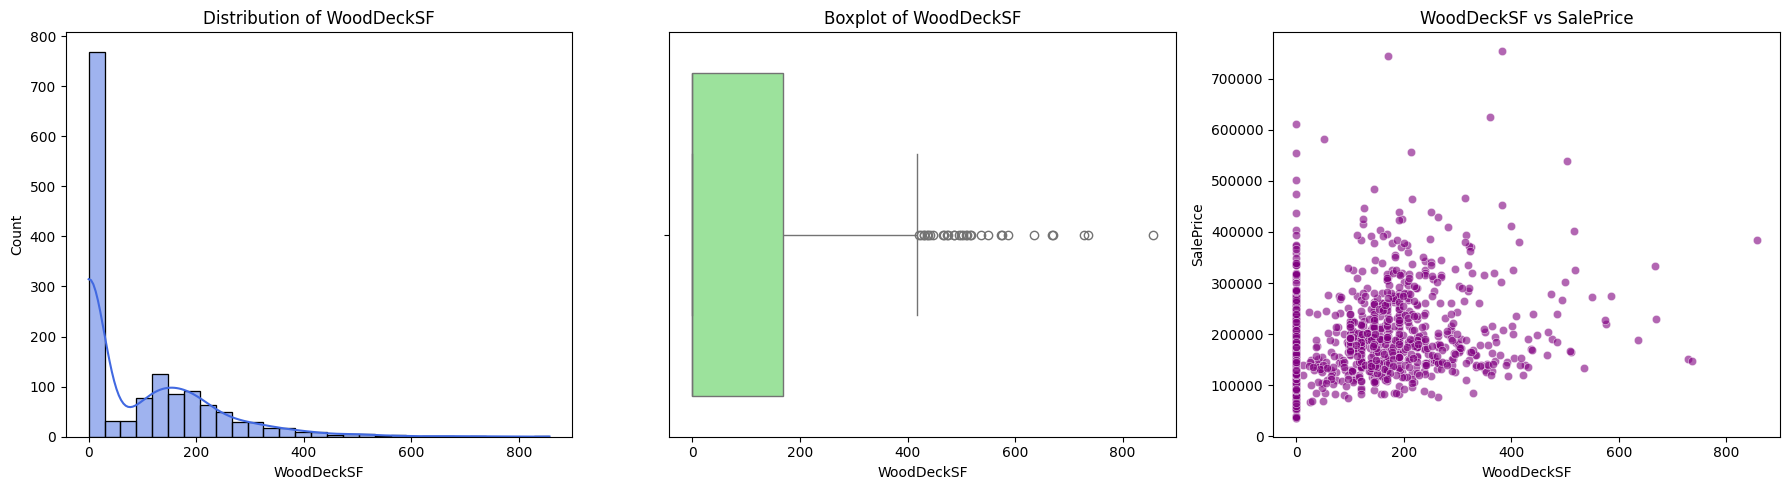


WOODDECKSF - DESCRIPTIVE STATISTICS:


count       mean         std  min  25%  50%    75%    max  range  \
WoodDeckSF  1460.0  94.244521  125.338794  0.0  0.0  0.0  168.0  857.0  857.0   

                  cv  
WoodDeckSF  1.329932


Pearson Correlation with Survived: 0.32
IQR Outliers: 32 (2.2%)

Missing Values: 0 (0.0%)
Zero Values: 761 (52.1%)


📊 NUMERICAL COLUMN ANALYSIS: WOODDECKSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       168.000000
95%       335.000000
99%       505.460000
max       857.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 1.5414 (strong)
• Kurtosis: 2.9930 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 274
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -252.0000
• Upper bound: 420.0000
• Potential outliers: 32 (2.19%)
• Min outlier value: 421.0000
• Max outlier value: 857.0000



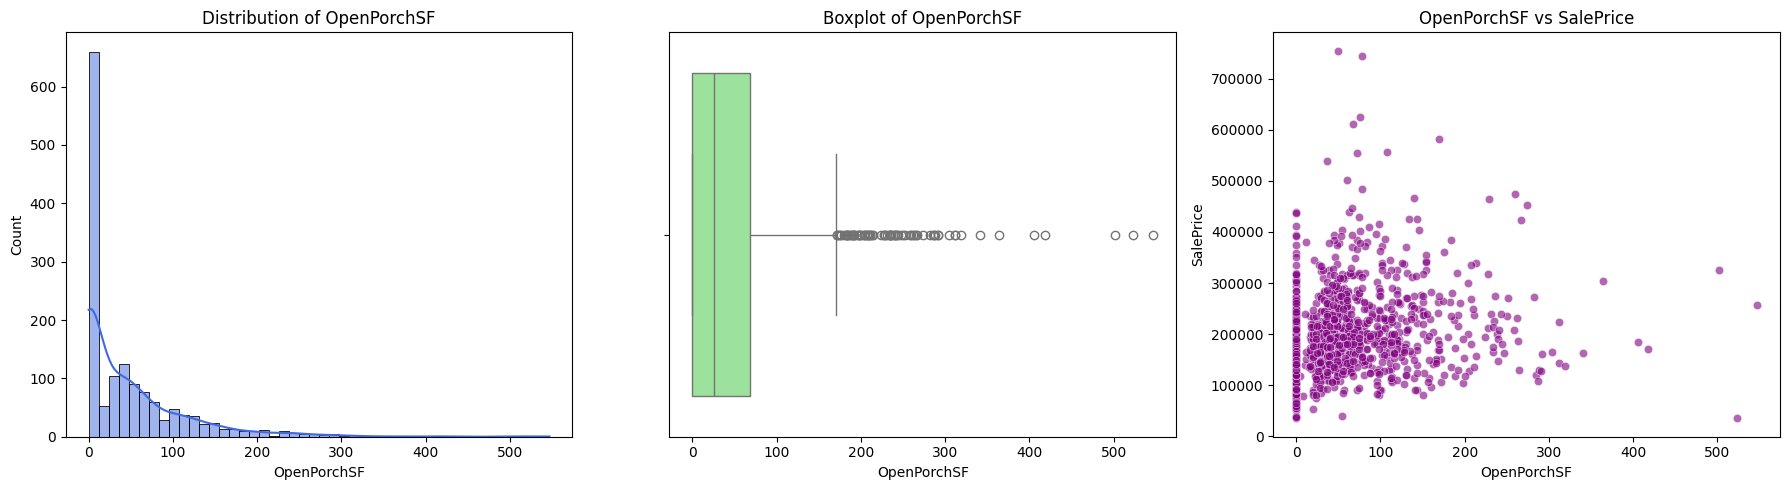


OPENPORCHSF - DESCRIPTIVE STATISTICS:


count       mean        std  min  25%   50%   75%    max  range  \
OpenPorchSF  1460.0  46.660274  66.256028  0.0  0.0  25.0  68.0  547.0  547.0   

                   cv  
OpenPorchSF  1.419967


Pearson Correlation with Survived: 0.32
IQR Outliers: 77 (5.3%)

Missing Values: 0 (0.0%)
Zero Values: 656 (44.9%)


📊 NUMERICAL COLUMN ANALYSIS: OPENPORCHSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%        25.000000
75%        68.000000
95%       175.050000
99%       285.820000
max       547.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 2.3643 (strong)
• Kurtosis: 8.4903 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 202
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: -102.0000
• Upper bound: 170.0000
• Potential outliers: 77 (5.27%)
• Min outlier value: 172.0000
• Max outlier value: 547.0000



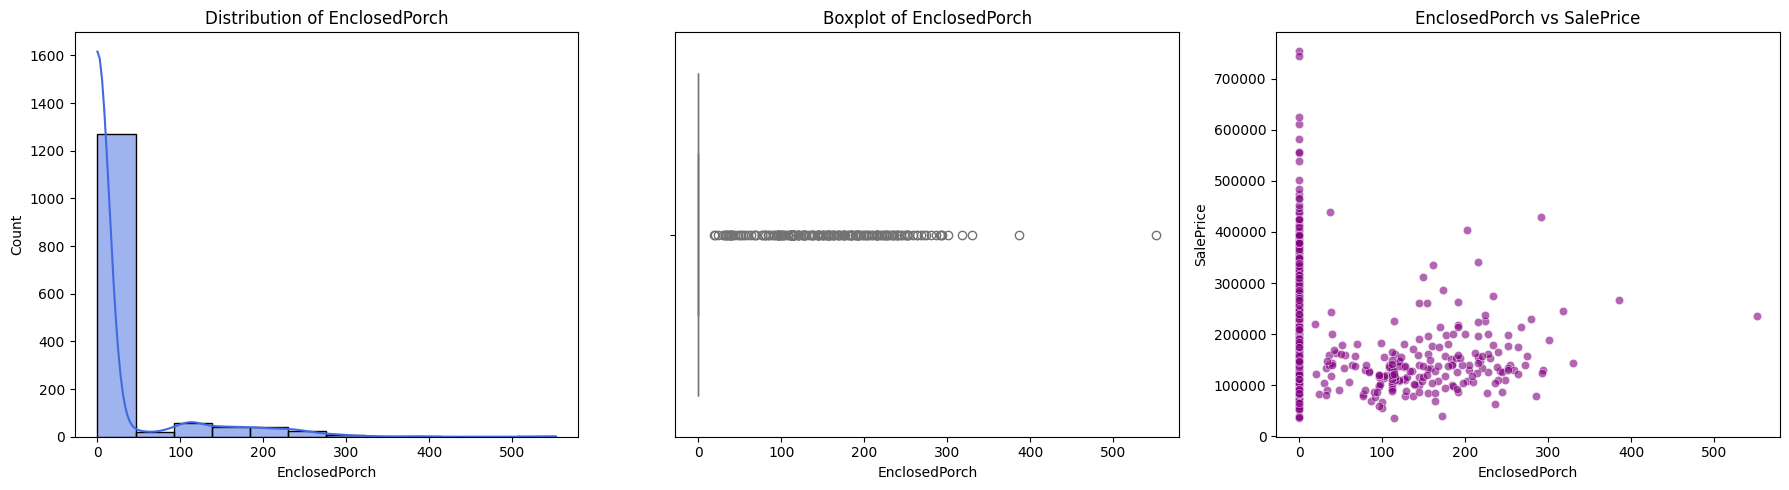


ENCLOSEDPORCH - DESCRIPTIVE STATISTICS:


count      mean        std  min  25%  50%  75%    max  range  \
EnclosedPorch  1460.0  21.95411  61.119149  0.0  0.0  0.0  0.0  552.0  552.0   

                    cv  
EnclosedPorch  2.78395


Pearson Correlation with Survived: -0.13
IQR Outliers: 208 (14.2%)

Missing Values: 0 (0.0%)
Zero Values: 1252 (85.8%)


📊 NUMERICAL COLUMN ANALYSIS: ENCLOSEDPORCH
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       180.150000
99%       261.050000
max       552.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 3.0899 (strong)
• Kurtosis: 10.4308 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 120
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 208 (14.25%)
• Min outlier value: 19.0000
• Max outlier value: 552.0000



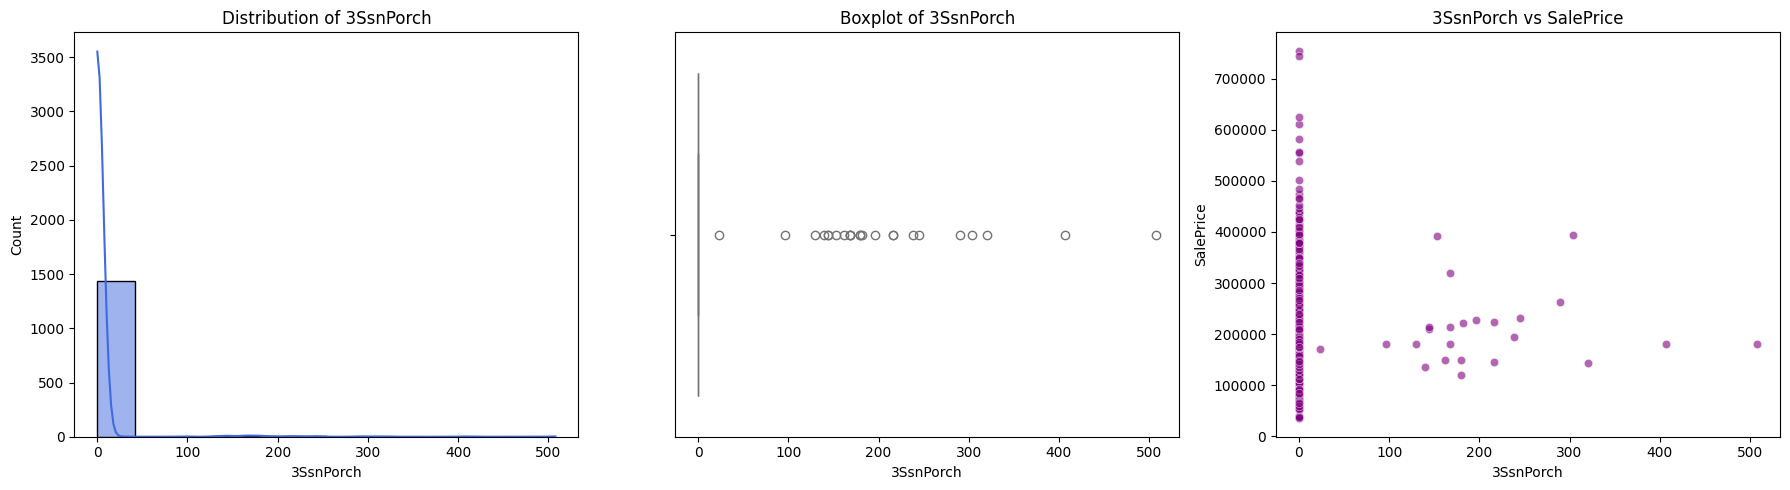


3SSNPORCH - DESCRIPTIVE STATISTICS:


count      mean        std  min  25%  50%  75%    max  range  \
3SsnPorch  1460.0  3.409589  29.317331  0.0  0.0  0.0  0.0  508.0  508.0   

                 cv  
3SsnPorch  8.598494


Pearson Correlation with Survived: 0.04
IQR Outliers: 24 (1.6%)

Missing Values: 0 (0.0%)
Zero Values: 1436 (98.4%)


📊 NUMERICAL COLUMN ANALYSIS: 3SSNPORCH
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
99%       168.000000
max       508.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 10.3043 (strong)
• Kurtosis: 123.6624 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 20
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 24 (1.64%)
• Min outlier value: 23.0000
• Max outlier value: 508.0000



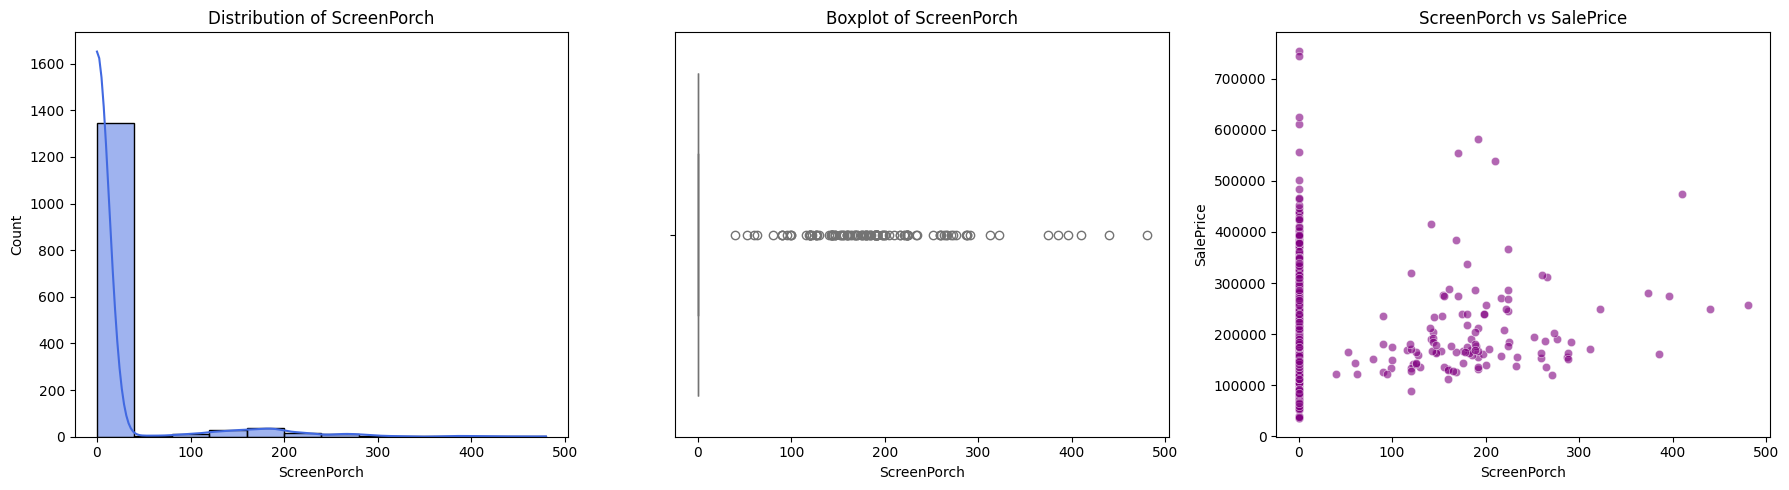


SCREENPORCH - DESCRIPTIVE STATISTICS:


count       mean        std  min  25%  50%  75%    max  range  \
ScreenPorch  1460.0  15.060959  55.757415  0.0  0.0  0.0  0.0  480.0  480.0   

                   cv  
ScreenPorch  3.702116


Pearson Correlation with Survived: 0.11
IQR Outliers: 116 (7.9%)

Missing Values: 0 (0.0%)
Zero Values: 1344 (92.1%)


📊 NUMERICAL COLUMN ANALYSIS: SCREENPORCH
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       160.000000
99%       268.050000
max       480.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 4.1222 (strong)
• Kurtosis: 18.4391 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 76
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 116 (7.95%)
• Min outlier value: 40.0000
• Max outlier value: 480.0000



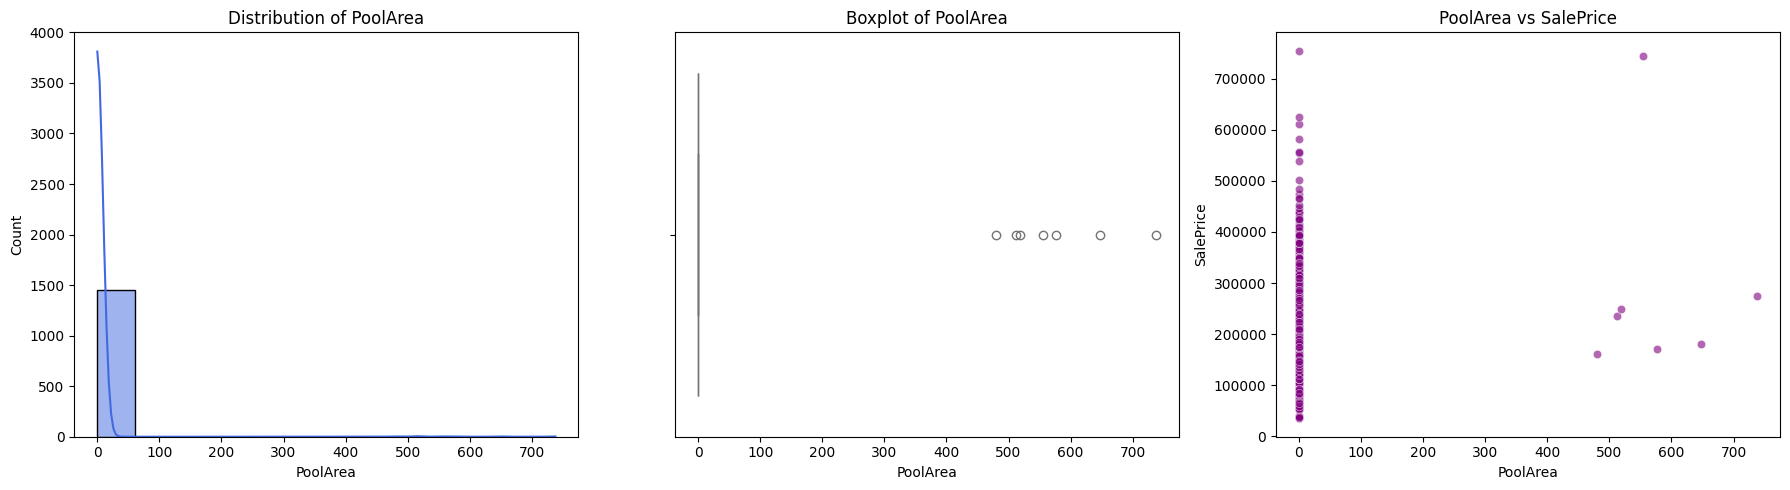


POOLAREA - DESCRIPTIVE STATISTICS:


count      mean        std  min  25%  50%  75%    max  range  \
PoolArea  1460.0  2.758904  40.177307  0.0  0.0  0.0  0.0  738.0  738.0   

                 cv  
PoolArea  14.562778


Pearson Correlation with Survived: 0.09
IQR Outliers: 7 (0.5%)

Missing Values: 0 (0.0%)
Zero Values: 1453 (99.5%)


📊 NUMERICAL COLUMN ANALYSIS: POOLAREA
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
99%         0.000000
max       738.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 14.8284 (strong)
• Kurtosis: 223.2685 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 8
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 7 (0.48%)
• Min outlier value: 480.0000
• Max outlier value: 738.0000



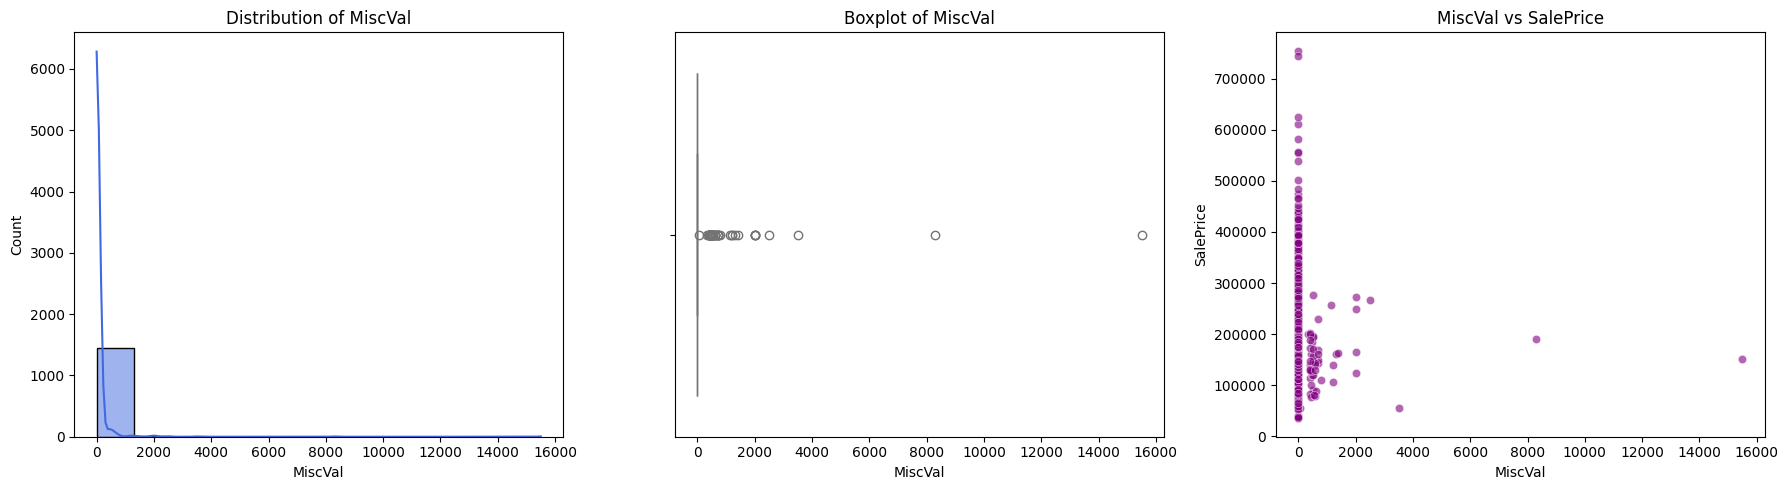


MISCVAL - DESCRIPTIVE STATISTICS:


count       mean         std  min  25%  50%  75%      max    range  \
MiscVal  1460.0  43.489041  496.123024  0.0  0.0  0.0  0.0  15500.0  15500.0   

                cv  
MiscVal  11.408001


Pearson Correlation with Survived: -0.02
IQR Outliers: 52 (3.6%)

Missing Values: 0 (0.0%)
Zero Values: 1408 (96.4%)


📊 NUMERICAL COLUMN ANALYSIS: MISCVAL
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 24.4768 (strong)
• Kurtosis: 701.0033 (leptokurtic)
• Missing values: 0 (0.00%)
• Unique values: 21
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.0000
• Upper bound: 0.0000
• Potential outliers: 52 (3.56%)
• Min outlier value: 54.0000
• Max outlier value: 15500.0000



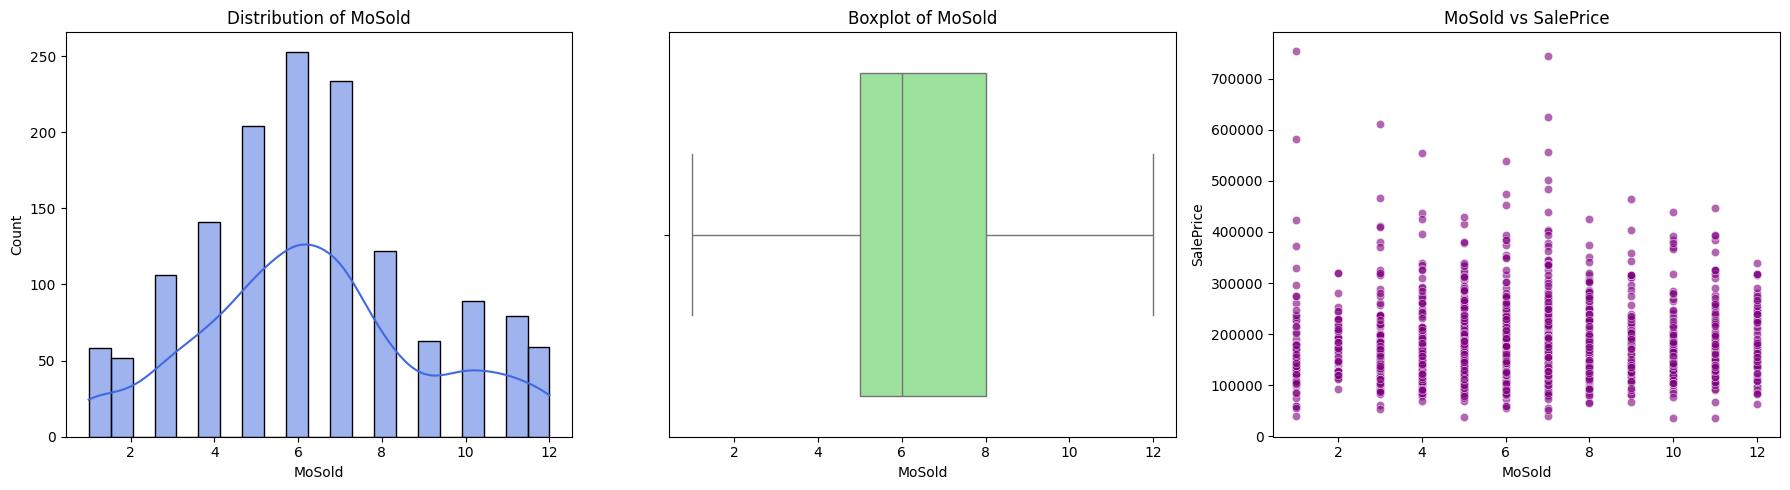


MOSOLD - DESCRIPTIVE STATISTICS:


count      mean       std  min  25%  50%  75%   max  range        cv
MoSold  1460.0  6.321918  2.703626  1.0  5.0  6.0  8.0  12.0   11.0  0.427659


Pearson Correlation with Survived: 0.05
IQR Outliers: 0 (0.0%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: MOSOLD
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
1%          1.000000
5%          2.000000
25%         5.000000
50%         6.000000
75%         8.000000
95%        11.000000
99%        12.000000
max        12.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.2121 (fairly symmetrical)
• Kurtosis: -0.4041 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 12
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 0.5000
• Upper bound: 12.5000
• Potential outliers: 0 (0.00%)



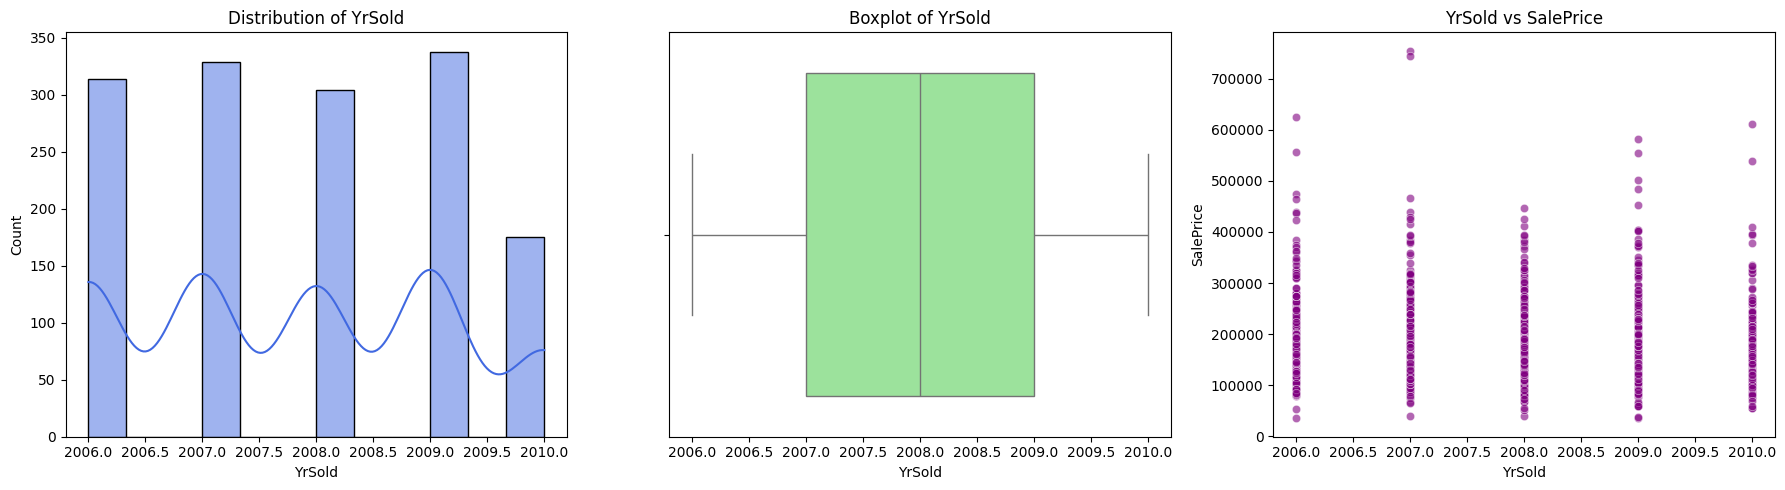


YRSOLD - DESCRIPTIVE STATISTICS:


count         mean       std     min     25%     50%     75%     max  \
YrSold  1460.0  2007.815753  1.328095  2006.0  2007.0  2008.0  2009.0  2010.0   

        range        cv  
YrSold    4.0  0.000661


Pearson Correlation with Survived: -0.03
IQR Outliers: 0 (0.0%)

Missing Values: 0 (0.0%)
Zero Values: 0 (0.0%)


📊 NUMERICAL COLUMN ANALYSIS: YRSOLD
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
1%       2006.000000
5%       2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
95%      2010.000000
99%      2010.000000
max      2010.000000

🔍 ADDITIONAL STATISTICS:
• Skewness: 0.0963 (fairly symmetrical)
• Kurtosis: -1.1906 (platykurtic)
• Missing values: 0 (0.00%)
• Unique values: 5
• Zero variance: No

⚠️ OUTLIER DETECTION (IQR METHOD):
• Lower bound: 2004.0000
• Upper bound: 2012.0000
• Potential outliers: 0 (0.00%)



In [16]:
# Looping over each numerical column for analysis
for col in num_cols:
    # Skip if column has zero variance
    if train_df[col].nunique() == 1:
        print(f"\n⚠️ Column '{col}' has zero variance (constant value: {train_df[col].iloc[0]})")
        continue
    # --- Create figure with 3 subplots ---
    plt.figure(figsize=(18, 5))

    # Subplot 1: Histogram + KDE
    plt.subplot(1, 3, 1)
    sns.histplot(train_df[col].dropna(), color='royalblue', kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

    # Subplot 2: Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=train_df[col].dropna(), color='lightgreen')
    plt.title(f"Boxplot of {col}")

    # Subplot 3: Scatter plot vs target
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=col, y='SalePrice', data=train_df, alpha=0.6, color='purple')
    plt.title(f"{col} vs SalePrice")
    plt.ylabel('SalePrice')

    plt.tight_layout()
    plt.show()

    # --- Descriptive Statistics ---
    stats_df = train_df[col].describe().to_frame().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coefficient of variation
    print(f"\n{col.upper()} - DESCRIPTIVE STATISTICS:")
    display(stats_df)

    # --- Correlation with Target ---
    corr = train_df[[col, 'SalePrice']].corr().iloc[0,1]
    print(f"\nPearson Correlation with Survived: {corr:.2f}")

    # --- Outlier Detection ---
    q1, q3 = np.percentile(train_df[col].dropna(), [25, 75])
    iqr = q3 - q1
    outliers = ((train_df[col] < q1 - 1.5*iqr) | (train_df[col] > q3 + 1.5*iqr)).sum()
    print(f"IQR Outliers: {outliers} ({outliers/len(train_df[col])*100:.1f}%)")

    # --- Data Quality ---
    print(f"\nMissing Values: {train_df[col].isna().sum()} ({train_df[col].isna().mean()*100:.1f}%)")
    print(f"Zero Values: {(train_df[col] == 0).sum()} ({(train_df[col] == 0).mean()*100:.1f}%)\n")

    # Calculate descriptive statistics
    desc_stats = train_df[col].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

    # Calculate outliers using IQR method
    Q1 = desc_stats['25%']
    Q3 = desc_stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]

    # Print comprehensive analysis
    print(f"\n📊 NUMERICAL COLUMN ANALYSIS: {col.upper()}")
    print("="*70)
    print(desc_stats.to_string())

    print("\n🔍 ADDITIONAL STATISTICS:")
    print(f"• Skewness: {train_df[col].skew():.4f} ({'moderate' if 0.5 < abs(train_df[col].skew()) < 1 else 'strong' if abs(train_df[col].skew()) >= 1 else 'fairly symmetrical'})")
    print(f"• Kurtosis: {train_df[col].kurtosis():.4f} ({'leptokurtic' if train_df[col].kurtosis() > 3 else 'platykurtic' if train_df[col].kurtosis() < 3 else 'mesokurtic'})")
    print(f"• Missing values: {train_df[col].isnull().sum()} ({train_df[col].isnull().mean()*100:.2f}%)")
    print(f"• Unique values: {train_df[col].nunique()}")
    print(f"• Zero variance: {'Yes' if train_df[col].nunique() == 1 else 'No'}")

    print("\n⚠️ OUTLIER DETECTION (IQR METHOD):")
    print(f"• Lower bound: {lower_bound:.4f}")
    print(f"• Upper bound: {upper_bound:.4f}")
    print(f"• Potential outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"• Min outlier value: {outliers.min():.4f}")
        print(f"• Max outlier value: {outliers.max():.4f}")

    print("="*70 + "\n")

In [17]:
# Categorical  columns
cat_cols = train_df.select_dtypes(include=['object', 'category'])
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

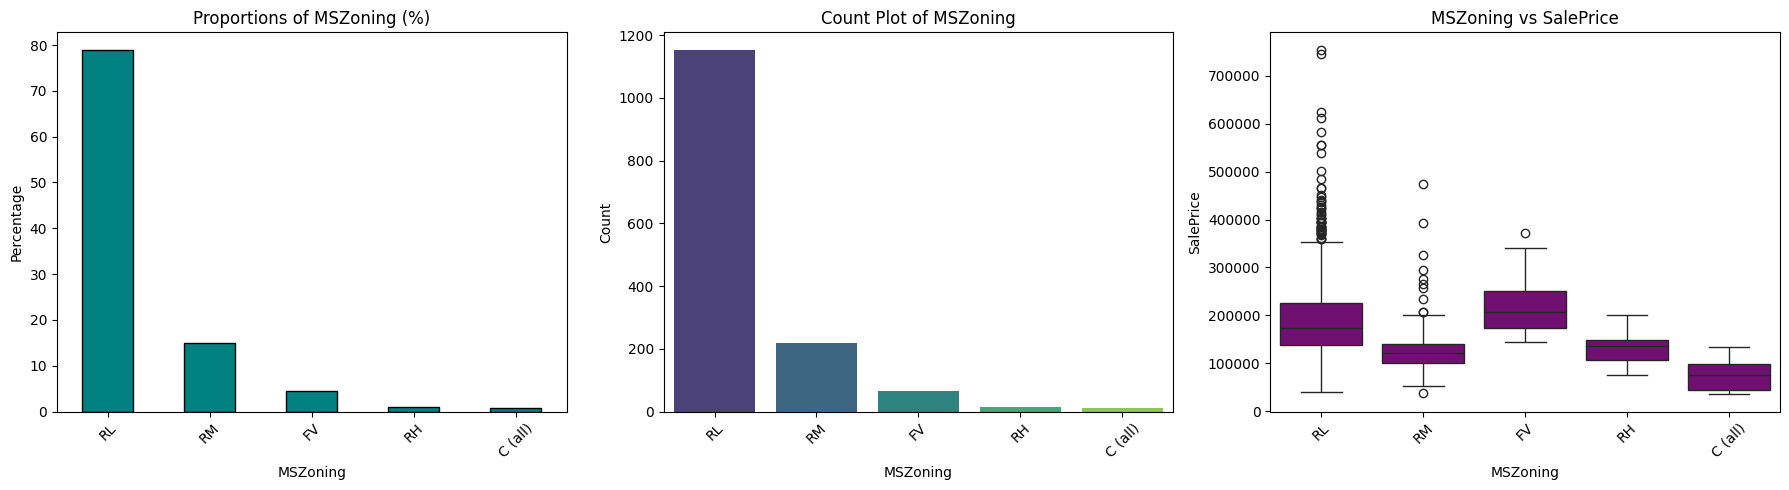


MSZONING - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
MSZoning  1460      5  RL  1151         5   RL


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: MSZONING
Total categories: 5
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10

📈 PERCENTAGE DISTRIBUTION:
MSZoning
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
MSZoning
C (all)    0.68

⚖️ BALANCE ANALYSIS:
• Most common category: RL (78.84%)
• Least common category: 10.00%)
• Imbalance ratio: 115.1x



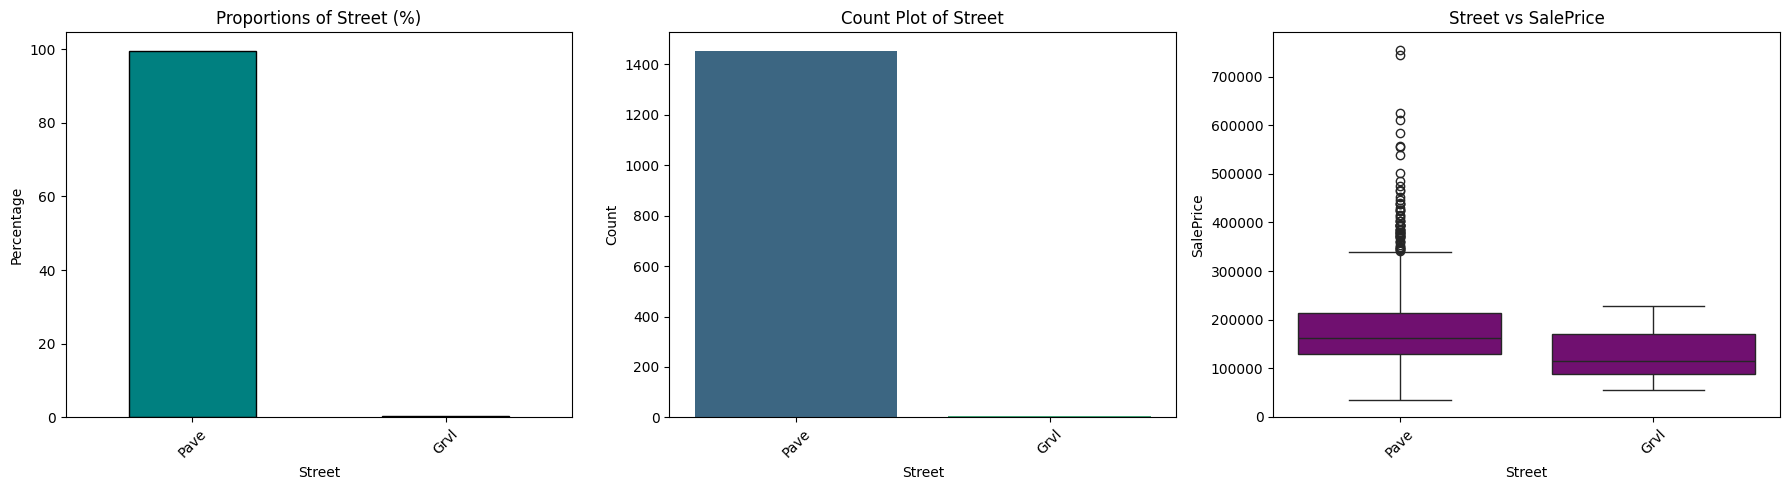


STREET - DESCRIPTIVE STATISTICS:


count unique   top  freq  n_unique  mode
Street  1460      2  Pave  1454         2  Pave


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: STREET
Total categories: 2
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Street
Pave    1454
Grvl       6

📈 PERCENTAGE DISTRIBUTION:
Street
Pave    99.59
Grvl     0.41

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
Street
Grvl    0.41

⚖️ BALANCE ANALYSIS:
• Most common category: Pave (99.59%)
• Least common category: 6.00%)
• Imbalance ratio: 242.3x



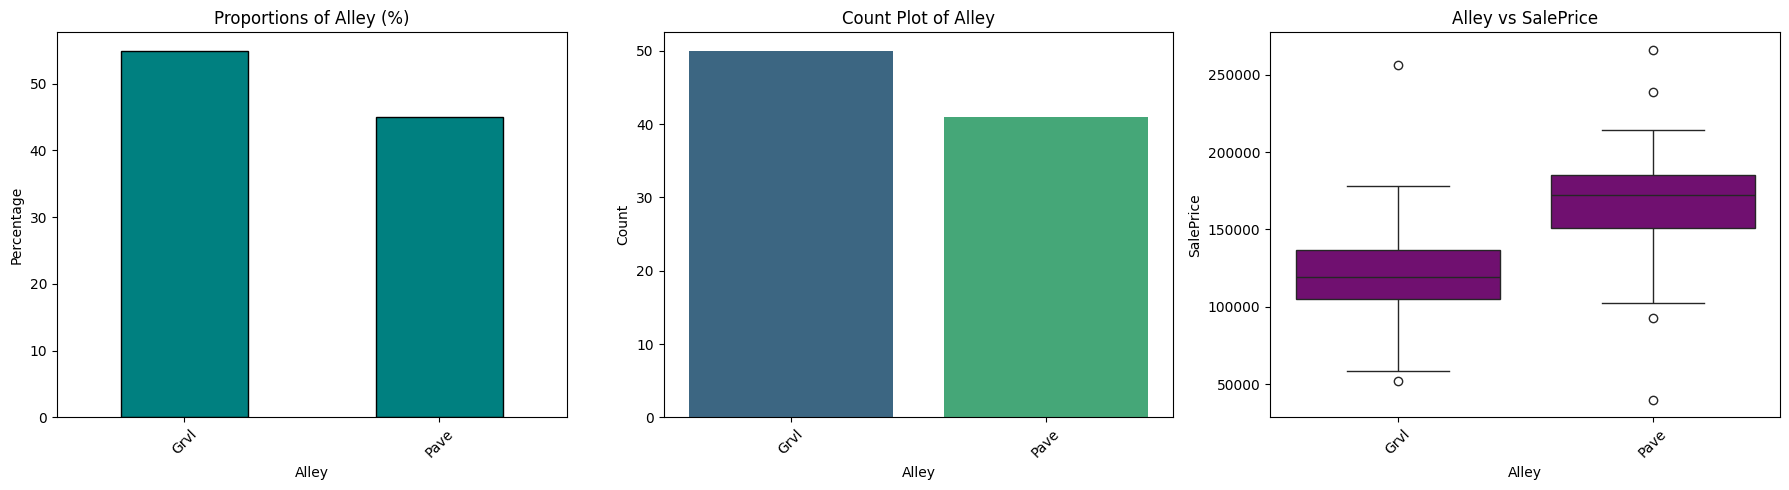


ALLEY - DESCRIPTIVE STATISTICS:


count unique   top freq  n_unique  mode
Alley    91      2  Grvl   50         2  Grvl


Missing Values: 1369 (93.8%)

📊 CATEGORICAL COLUMN ANALYSIS: ALLEY
Total categories: 2
Missing values: 1369 (93.77%)

🔍 VALUE COUNTS:
Alley
Grvl    50
Pave    41

📈 PERCENTAGE DISTRIBUTION:
Alley
Grvl    54.95
Pave    45.05

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Grvl (54.95%)
• Least common category: 41.00%)
• Imbalance ratio: 1.2x



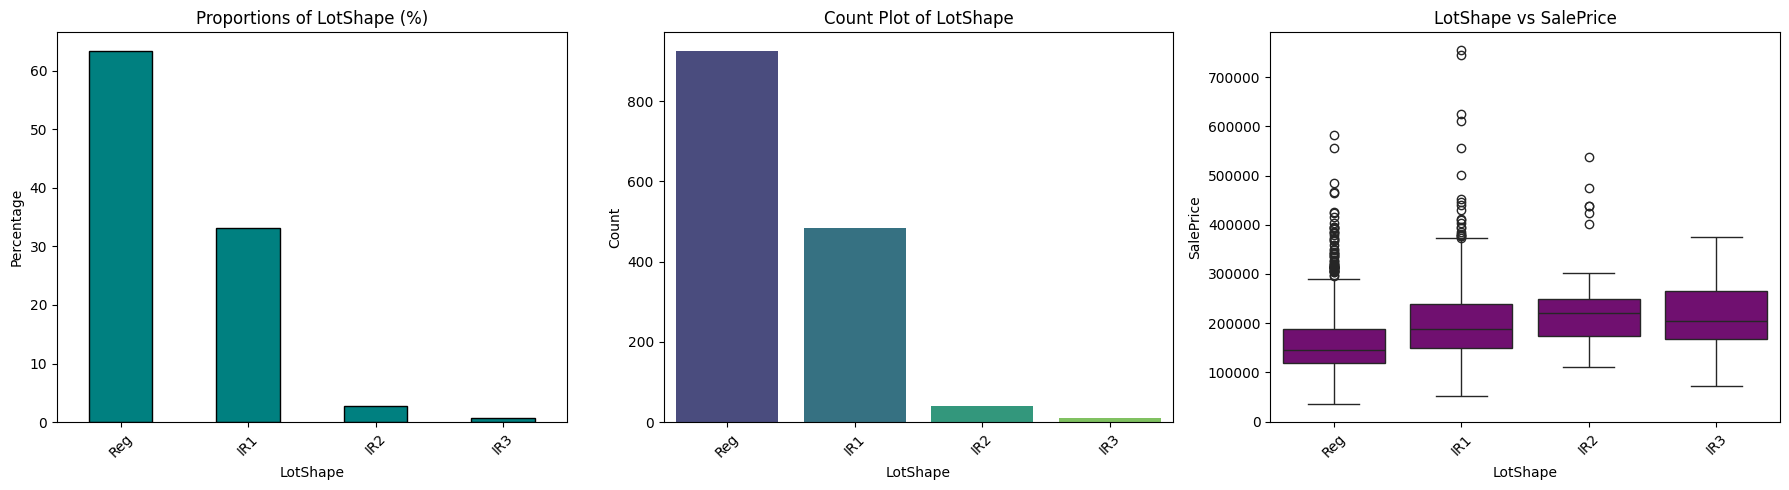


LOTSHAPE - DESCRIPTIVE STATISTICS:


count unique  top freq  n_unique mode
LotShape  1460      4  Reg  925         4  Reg


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: LOTSHAPE
Total categories: 4
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10

📈 PERCENTAGE DISTRIBUTION:
LotShape
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
LotShape
IR3    0.68

⚖️ BALANCE ANALYSIS:
• Most common category: Reg (63.36%)
• Least common category: 10.00%)
• Imbalance ratio: 92.5x



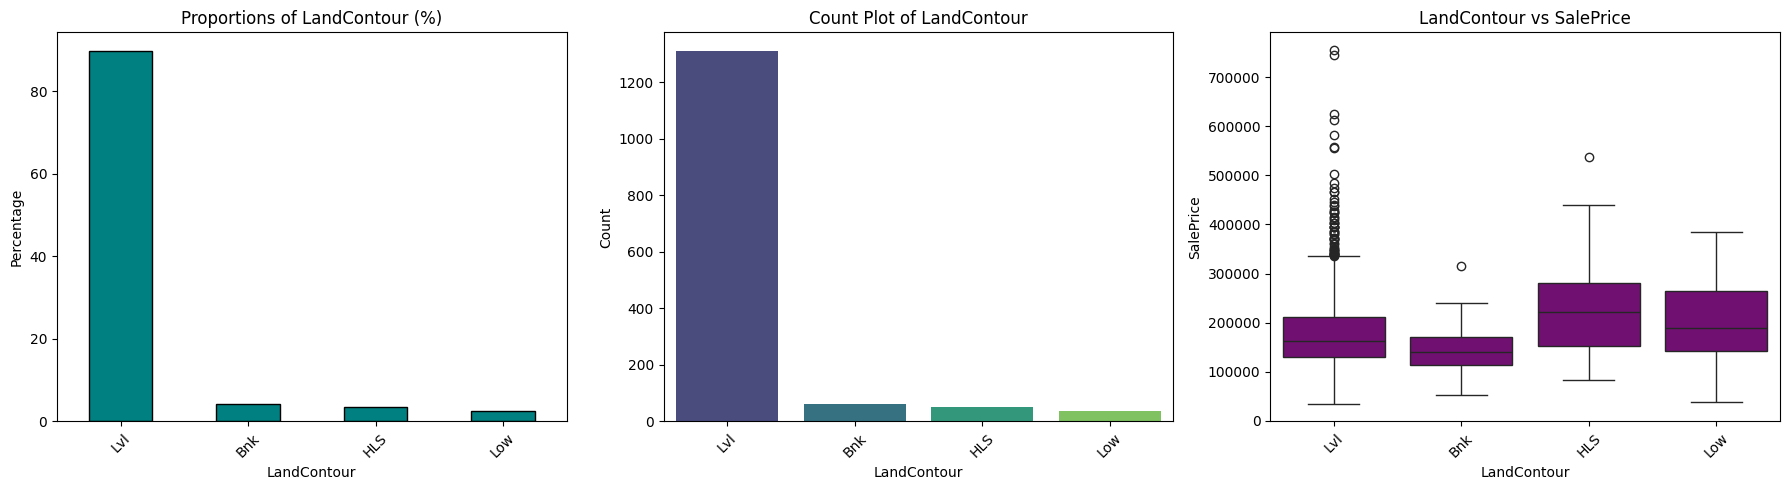


LANDCONTOUR - DESCRIPTIVE STATISTICS:


count unique  top  freq  n_unique mode
LandContour  1460      4  Lvl  1311         4  Lvl


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: LANDCONTOUR
Total categories: 4
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36

📈 PERCENTAGE DISTRIBUTION:
LandContour
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Lvl (89.79%)
• Least common category: 36.00%)
• Imbalance ratio: 36.4x



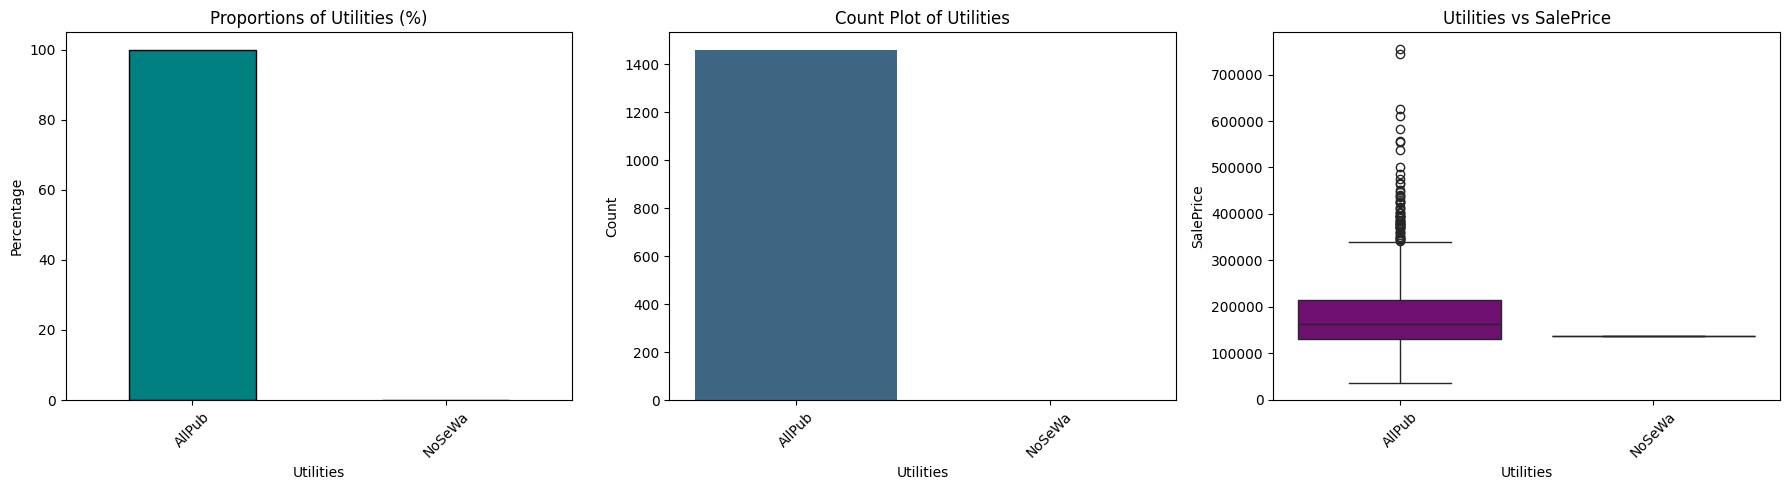


UTILITIES - DESCRIPTIVE STATISTICS:


count unique     top  freq  n_unique    mode
Utilities  1460      2  AllPub  1459         2  AllPub


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: UTILITIES
Total categories: 2
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Utilities
AllPub    1459
NoSeWa       1

📈 PERCENTAGE DISTRIBUTION:
Utilities
AllPub    99.93
NoSeWa     0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
Utilities
NoSeWa    0.07

⚖️ BALANCE ANALYSIS:
• Most common category: AllPub (99.93%)
• Least common category: 1.00%)
• Imbalance ratio: 1459.0x



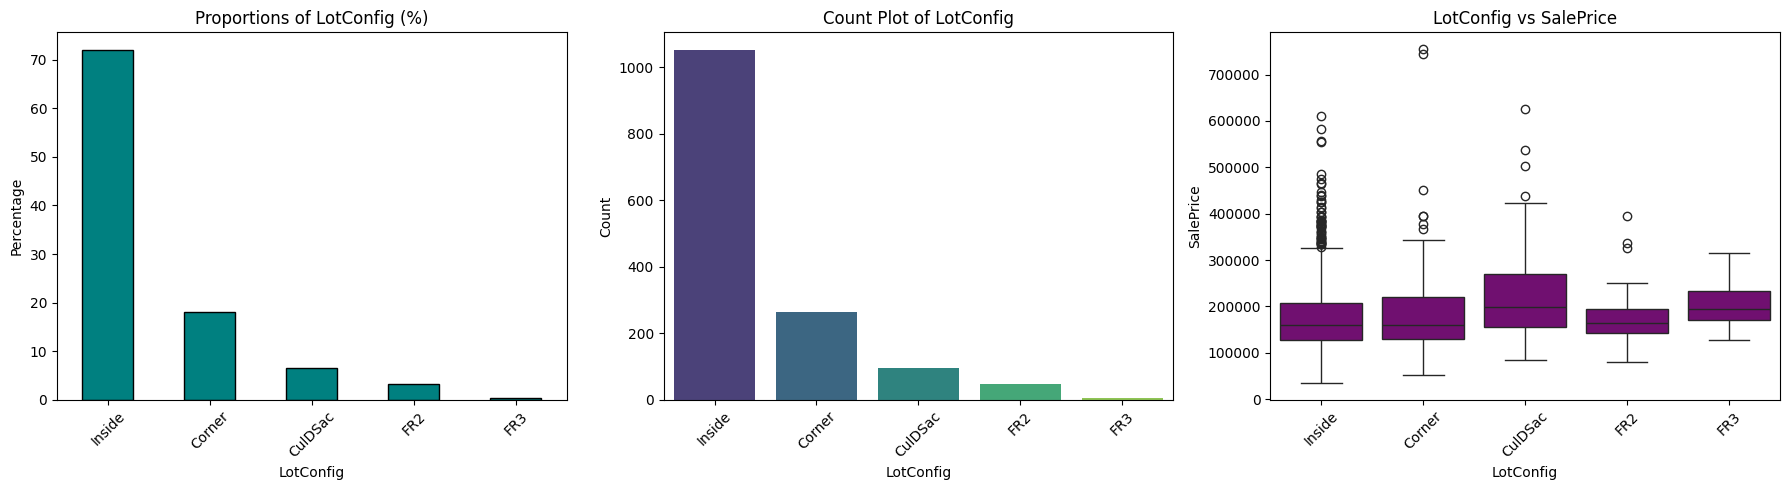


LOTCONFIG - DESCRIPTIVE STATISTICS:


count unique     top  freq  n_unique    mode
LotConfig  1460      5  Inside  1052         5  Inside


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: LOTCONFIG
Total categories: 5
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4

📈 PERCENTAGE DISTRIBUTION:
LotConfig
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
LotConfig
FR3    0.27

⚖️ BALANCE ANALYSIS:
• Most common category: Inside (72.05%)
• Least common category: 4.00%)
• Imbalance ratio: 263.0x



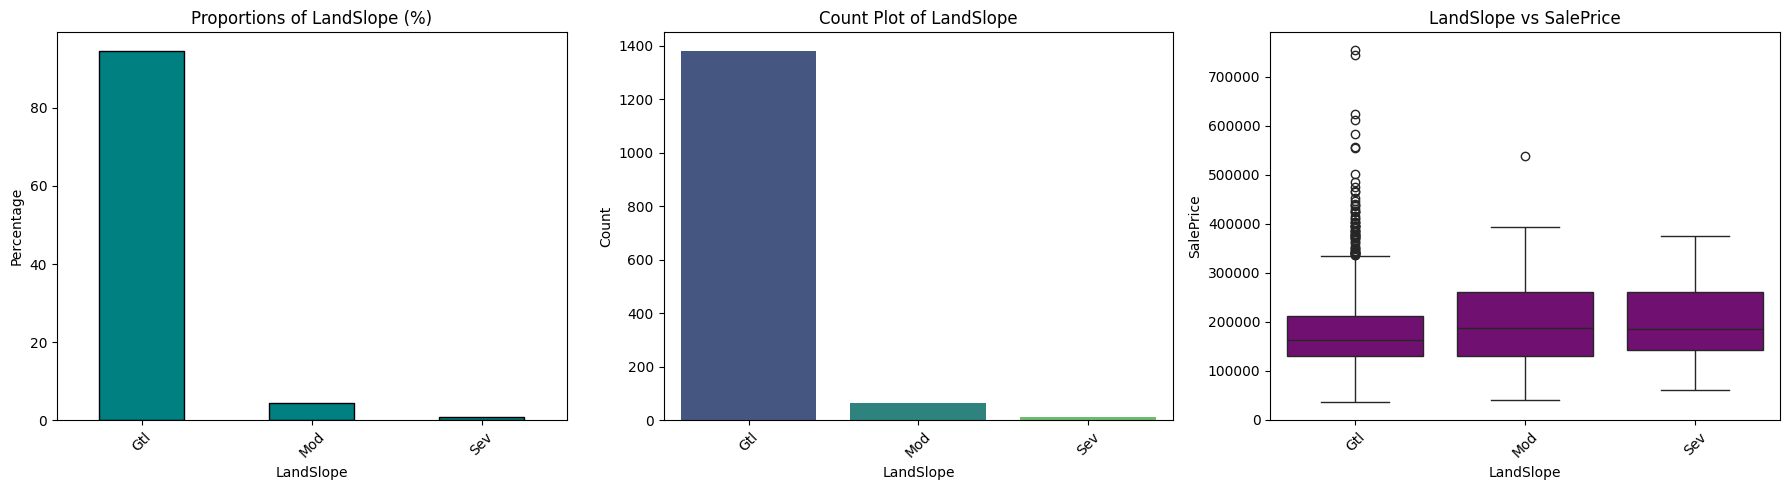


LANDSLOPE - DESCRIPTIVE STATISTICS:


count unique  top  freq  n_unique mode
LandSlope  1460      3  Gtl  1382         3  Gtl


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: LANDSLOPE
Total categories: 3
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
LandSlope
Gtl    1382
Mod      65
Sev      13

📈 PERCENTAGE DISTRIBUTION:
LandSlope
Gtl    94.66
Mod     4.45
Sev     0.89

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
LandSlope
Sev    0.89

⚖️ BALANCE ANALYSIS:
• Most common category: Gtl (94.66%)
• Least common category: 13.00%)
• Imbalance ratio: 106.3x



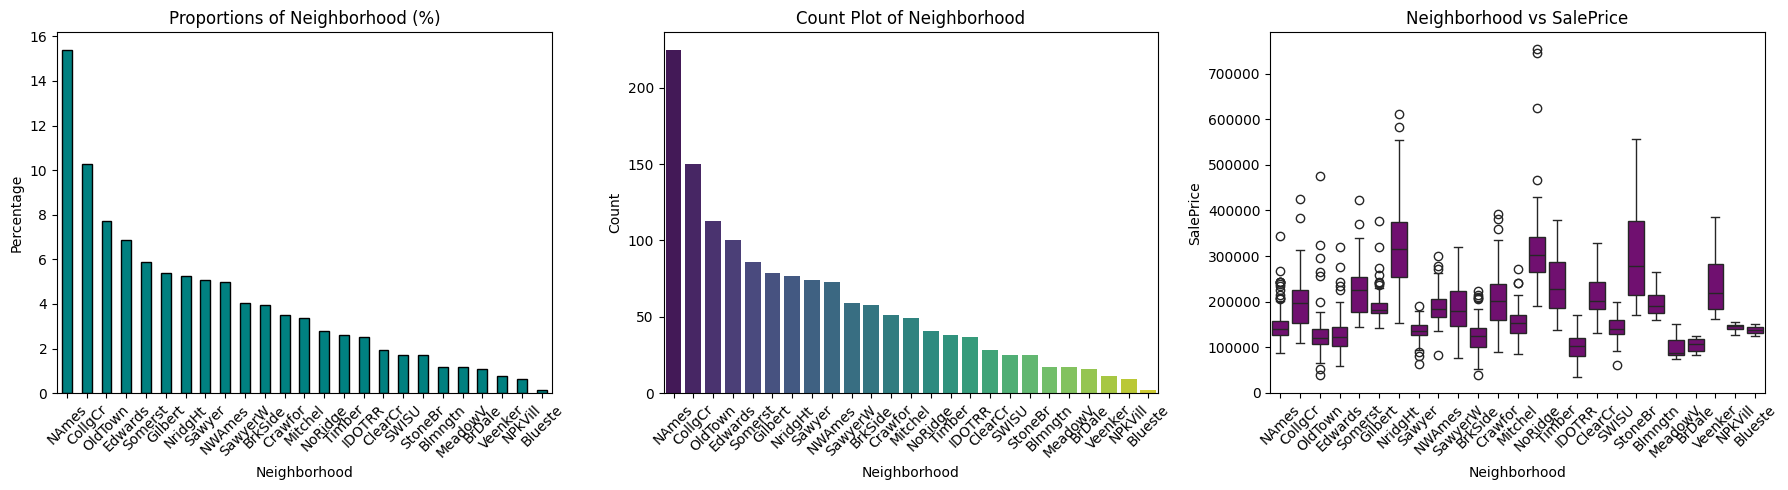


NEIGHBORHOOD - DESCRIPTIVE STATISTICS:


count unique    top freq  n_unique   mode
Neighborhood  1460     25  NAmes  225        25  NAmes


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: NEIGHBORHOOD
Total categories: 25
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2

📈 PERCENTAGE DISTRIBUTION:
Neighborhood
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
SWISU       1.71
StoneBr     1.71
Blmngtn     1.16
MeadowV     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14

⚠️ CARDINA

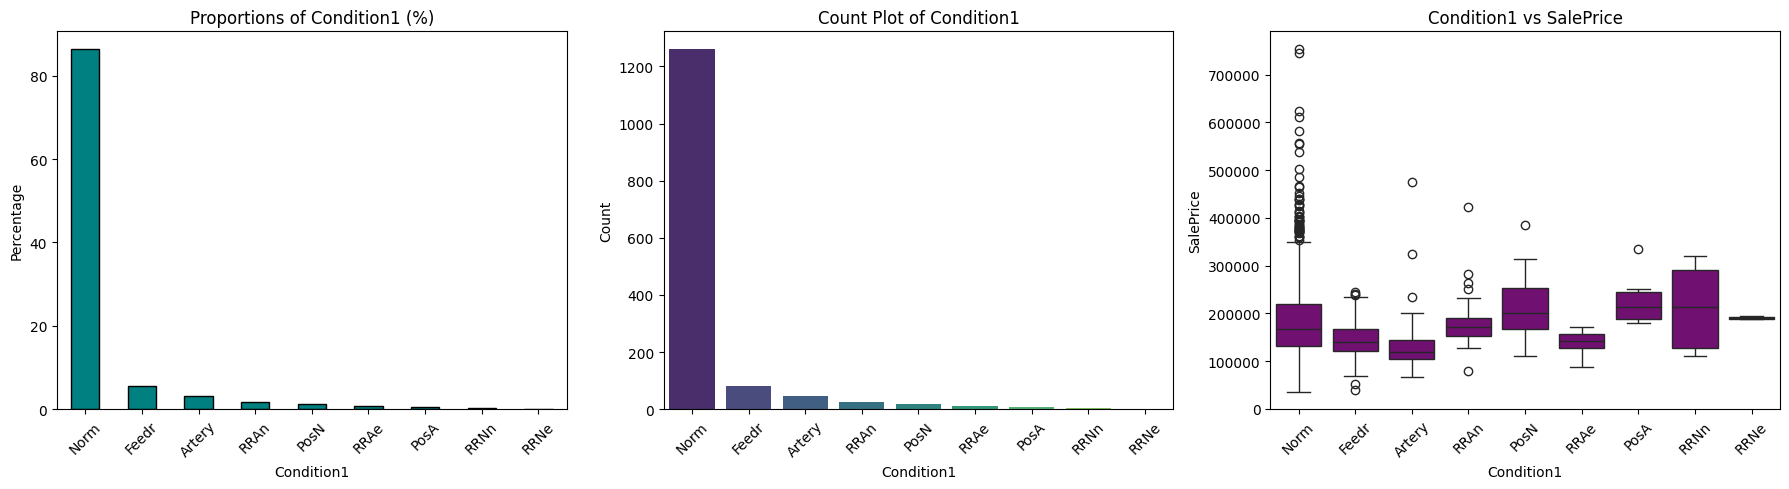


CONDITION1 - DESCRIPTIVE STATISTICS:


count unique   top  freq  n_unique  mode
Condition1  1460      9  Norm  1260         9  Norm


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: CONDITION1
Total categories: 9
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2

📈 PERCENTAGE DISTRIBUTION:
Condition1
Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 4
  Rare categories and their percentages:
Condition1
RRAe    0.75
PosA    0.55
RRNn    0.34
RRNe    0.14

⚖️ BALANCE ANALYSIS:
• Most common category: Norm (86.30%)
• Least common category: 2.00%)
• Imbalance ratio: 630.0x



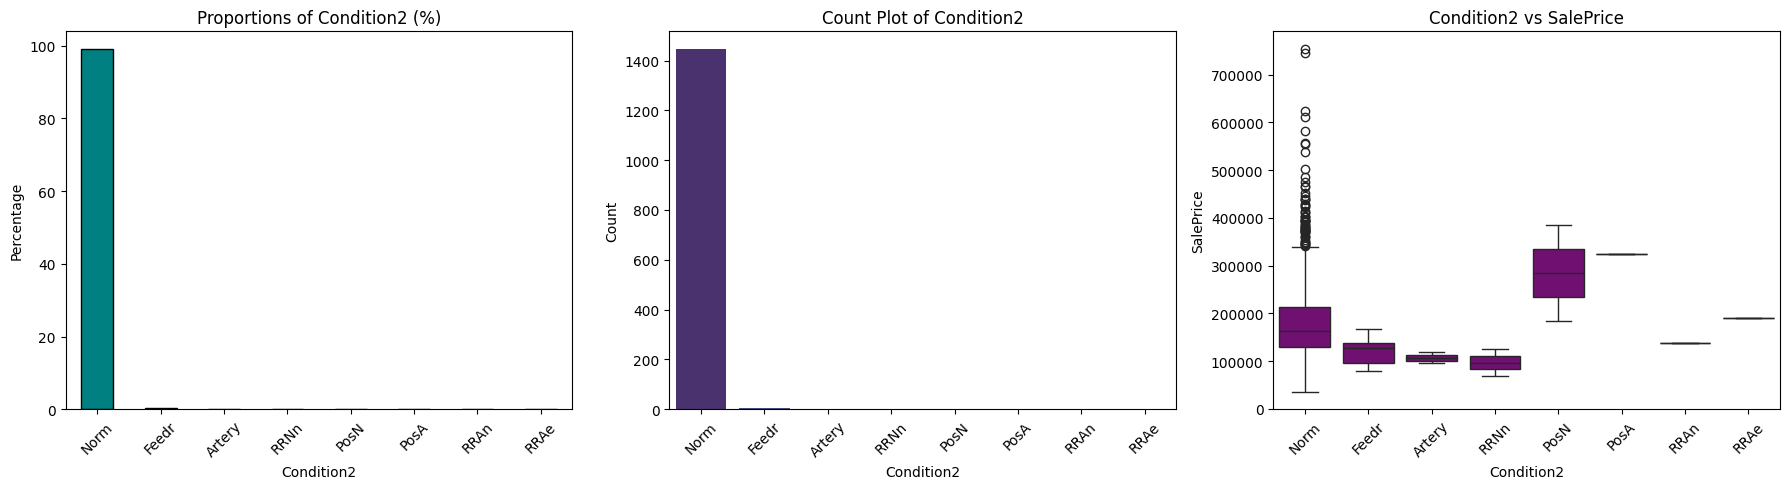


CONDITION2 - DESCRIPTIVE STATISTICS:


count unique   top  freq  n_unique  mode
Condition2  1460      8  Norm  1445         8  Norm


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: CONDITION2
Total categories: 8
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1

📈 PERCENTAGE DISTRIBUTION:
Condition2
Norm      98.97
Feedr      0.41
Artery     0.14
RRNn       0.14
PosN       0.14
PosA       0.07
RRAn       0.07
RRAe       0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 7
  Rare categories and their percentages:
Condition2
Feedr     0.41
Artery    0.14
RRNn      0.14
PosN      0.14
PosA      0.07
RRAn      0.07
RRAe      0.07

⚖️ BALANCE ANALYSIS:
• Most common category: Norm (98.97%)
• Least common category: 1.00%)
• Imbalance ratio: 1445.0x



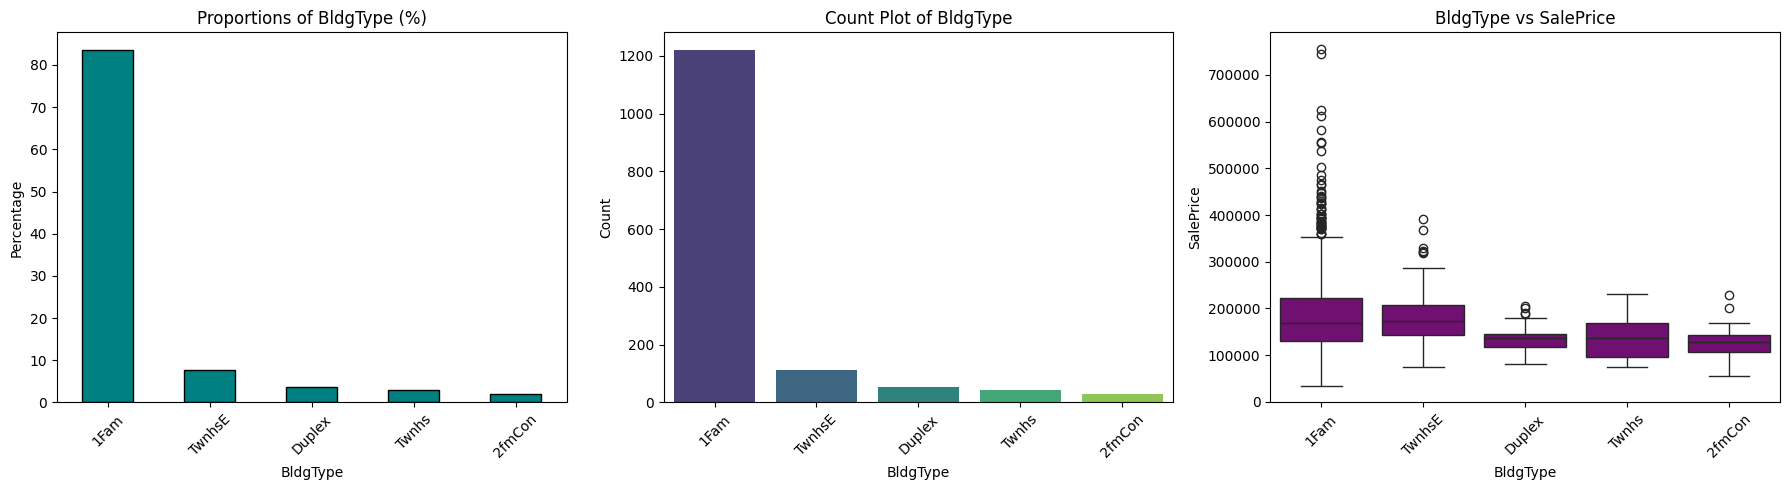


BLDGTYPE - DESCRIPTIVE STATISTICS:


count unique   top  freq  n_unique  mode
BldgType  1460      5  1Fam  1220         5  1Fam


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: BLDGTYPE
Total categories: 5
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31

📈 PERCENTAGE DISTRIBUTION:
BldgType
1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: 1Fam (83.56%)
• Least common category: 31.00%)
• Imbalance ratio: 39.4x



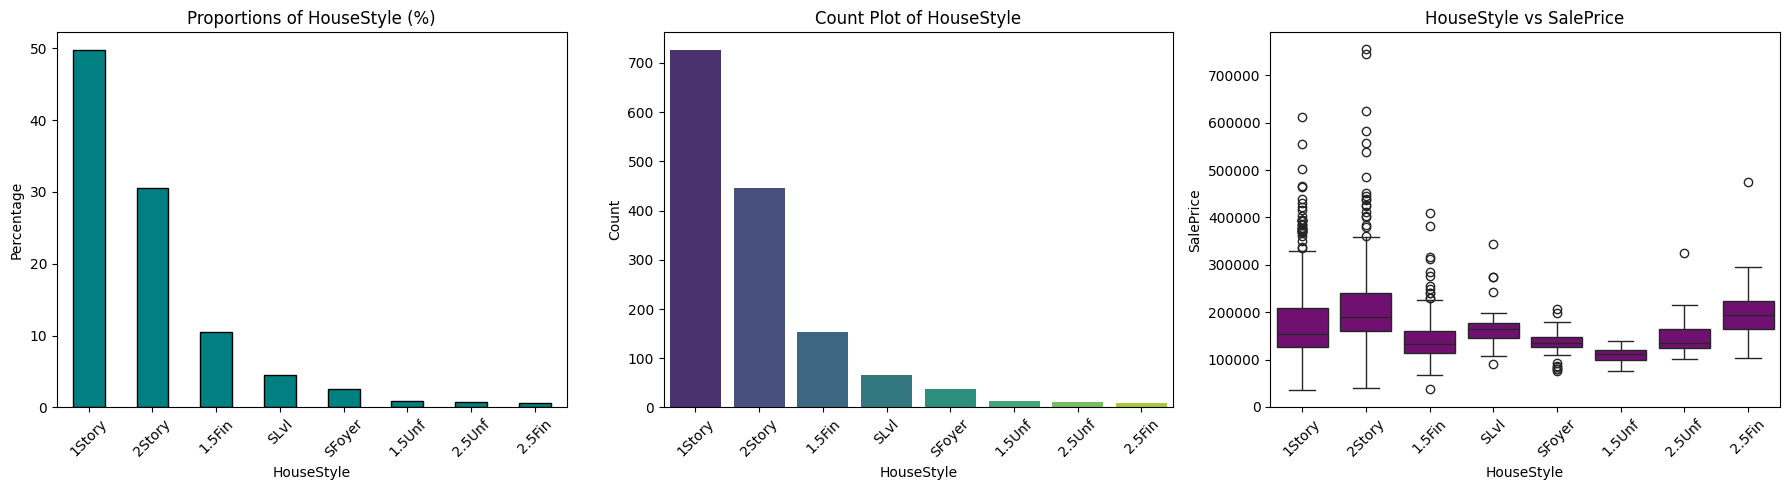


HOUSESTYLE - DESCRIPTIVE STATISTICS:


count unique     top freq  n_unique    mode
HouseStyle  1460      8  1Story  726         8  1Story


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: HOUSESTYLE
Total categories: 8
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8

📈 PERCENTAGE DISTRIBUTION:
HouseStyle
1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 3
  Rare categories and their percentages:
HouseStyle
1.5Unf    0.96
2.5Unf    0.75
2.5Fin    0.55

⚖️ BALANCE ANALYSIS:
• Most common category: 1Story (49.73%)
• Least common category: 8.00%)
• Imbalance ratio: 90.8x



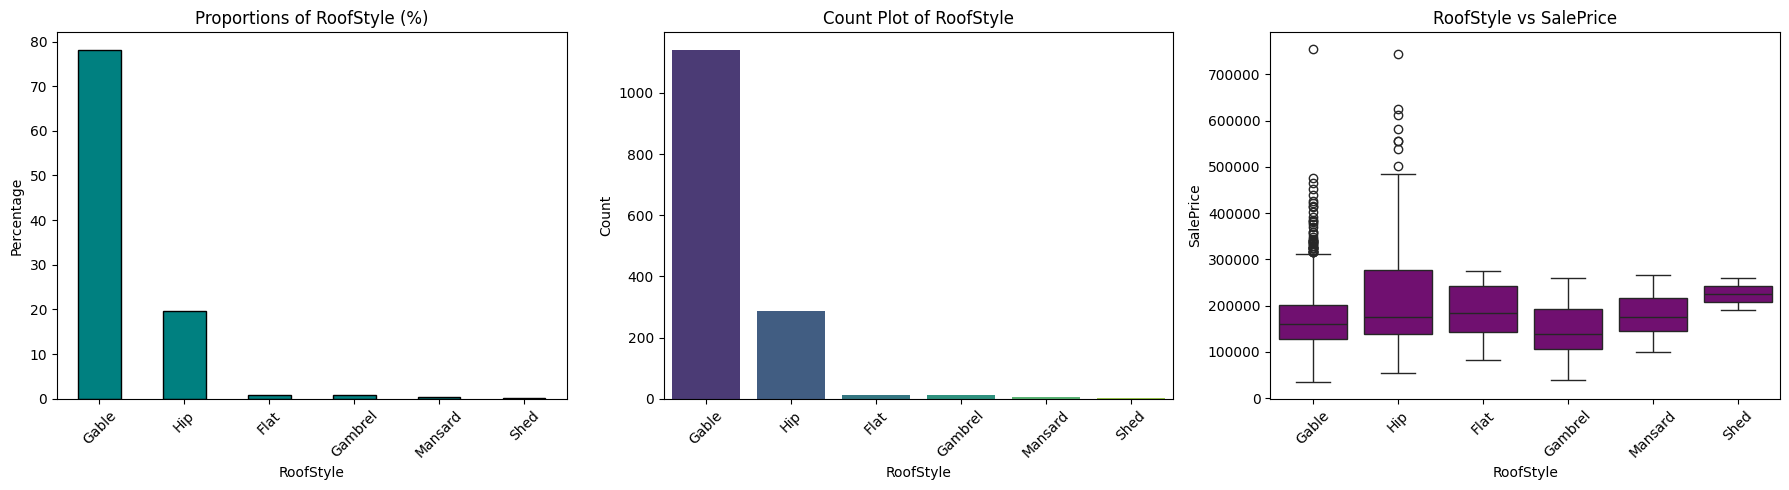


ROOFSTYLE - DESCRIPTIVE STATISTICS:


count unique    top  freq  n_unique   mode
RoofStyle  1460      6  Gable  1141         6  Gable


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: ROOFSTYLE
Total categories: 6
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2

📈 PERCENTAGE DISTRIBUTION:
RoofStyle
Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 4
  Rare categories and their percentages:
RoofStyle
Flat       0.89
Gambrel    0.75
Mansard    0.48
Shed       0.14

⚖️ BALANCE ANALYSIS:
• Most common category: Gable (78.15%)
• Least common category: 2.00%)
• Imbalance ratio: 570.5x



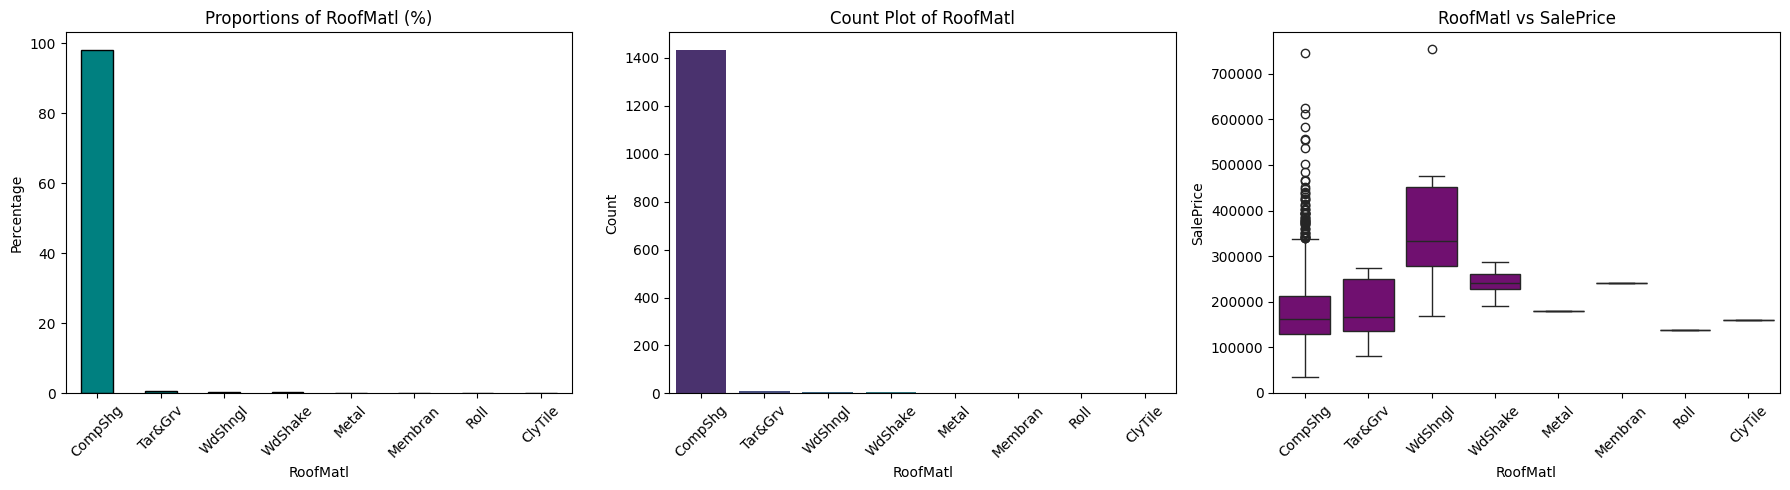


ROOFMATL - DESCRIPTIVE STATISTICS:


count unique      top  freq  n_unique     mode
RoofMatl  1460      8  CompShg  1434         8  CompShg


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: ROOFMATL
Total categories: 8
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1

📈 PERCENTAGE DISTRIBUTION:
RoofMatl
CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Metal       0.07
Membran     0.07
Roll        0.07
ClyTile     0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 7
  Rare categories and their percentages:
RoofMatl
Tar&Grv    0.75
WdShngl    0.41
WdShake    0.34
Metal      0.07
Membran    0.07
Roll       0.07
ClyTile    0.07

⚖️ BALANCE ANALYSIS:
• Most common category: CompShg (98.22%)
• Least common category: 1.00%)
• Imbalance ratio: 1434.0x



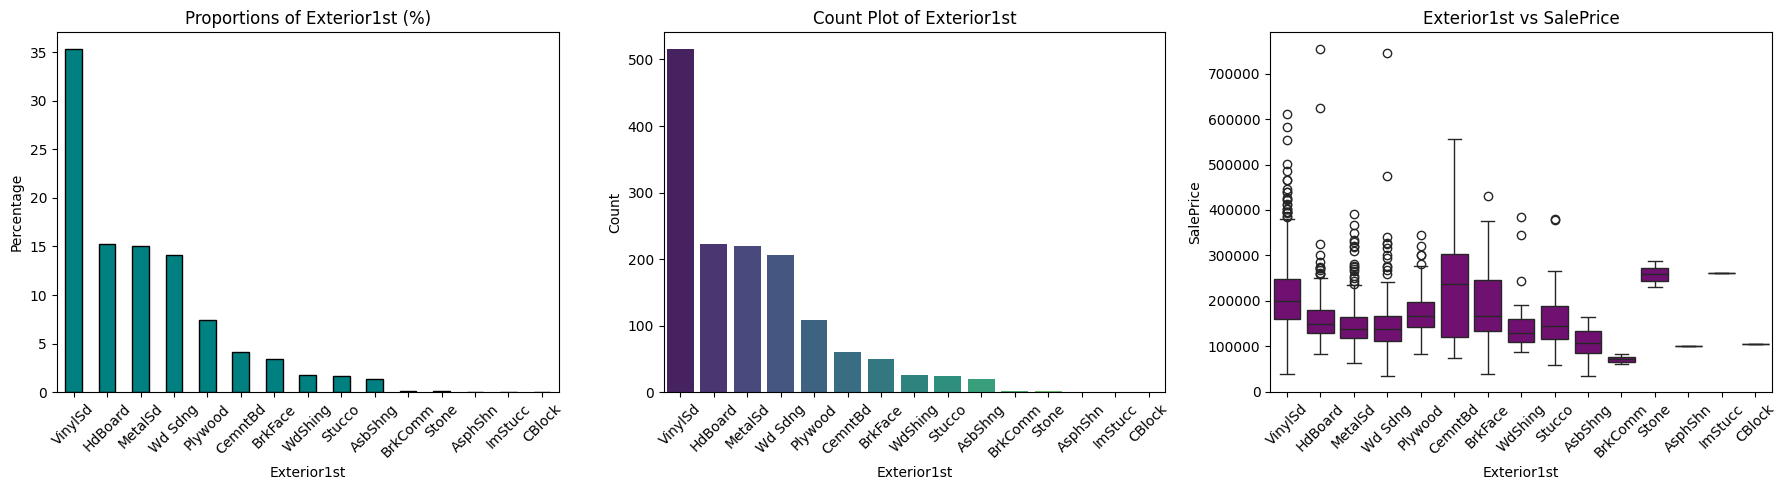


EXTERIOR1ST - DESCRIPTIVE STATISTICS:


count unique      top freq  n_unique     mode
Exterior1st  1460     15  VinylSd  515        15  VinylSd


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: EXTERIOR1ST
Total categories: 15
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1

📈 PERCENTAGE DISTRIBUTION:
Exterior1st
VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
BrkComm     0.14
Stone       0.14
AsphShn     0.07
ImStucc     0.07
CBlock      0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 5
  Rare categories and their percentages:
Exterior1st
BrkComm    0.14
Stone      0.14
AsphShn    0.07
ImStucc    0.07
CBlock     0.07

⚖️ BALANCE ANALYSIS:
• Most common category: VinylSd (35.27%)
• Least common category: 1.00%)
• Imbalance ratio: 515.0x



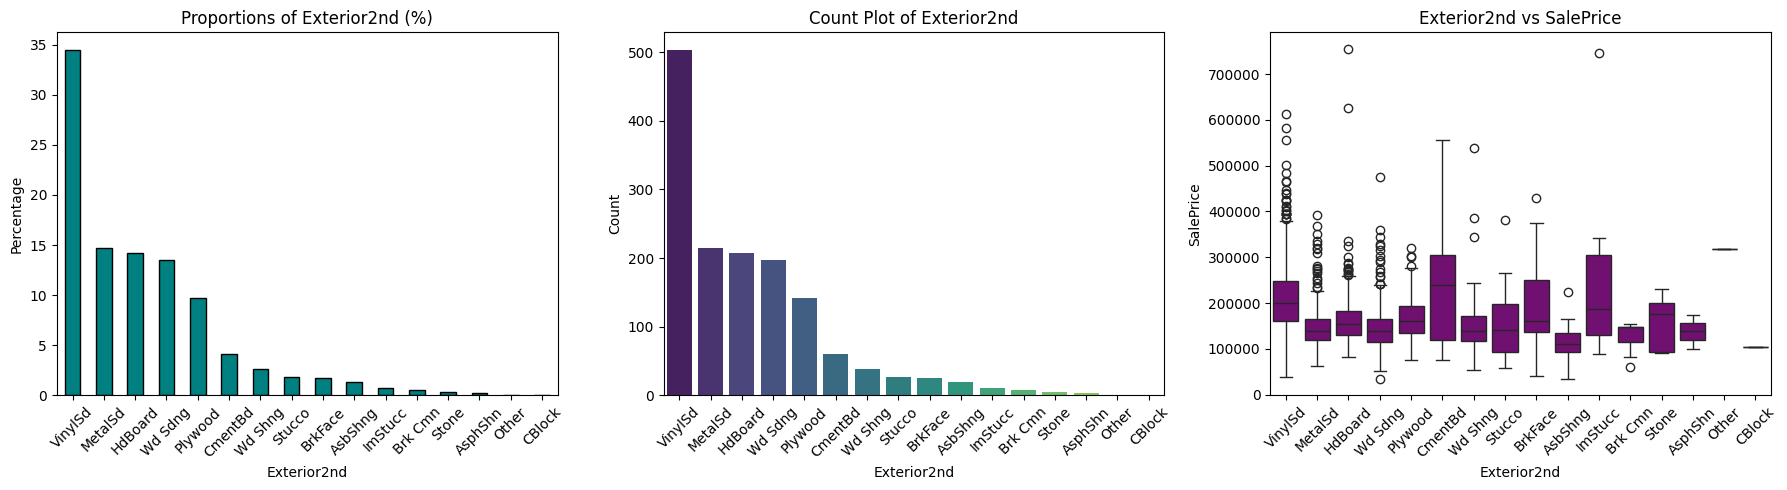


EXTERIOR2ND - DESCRIPTIVE STATISTICS:


count unique      top freq  n_unique     mode
Exterior2nd  1460     16  VinylSd  504        16  VinylSd


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: EXTERIOR2ND
Total categories: 16
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1

📈 PERCENTAGE DISTRIBUTION:
Exterior2nd
VinylSd    34.52
MetalSd    14.66
HdBoard    14.18
Wd Sdng    13.49
Plywood     9.73
CmentBd     4.11
Wd Shng     2.60
Stucco      1.78
BrkFace     1.71
AsbShng     1.37
ImStucc     0.68
Brk Cmn     0.48
Stone       0.34
AsphShn     0.21
Other       0.07
CBlock      0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 6
  Rare categories and their percentages:
Exterior2nd
ImStucc    0.68
Brk Cmn    0.48
Stone      0.34
AsphShn    0.21
Other      0.07
CBlock     0.07

⚖️ BALANCE ANALYSIS:
• Most common category: VinylSd (34.52%)
• Least common

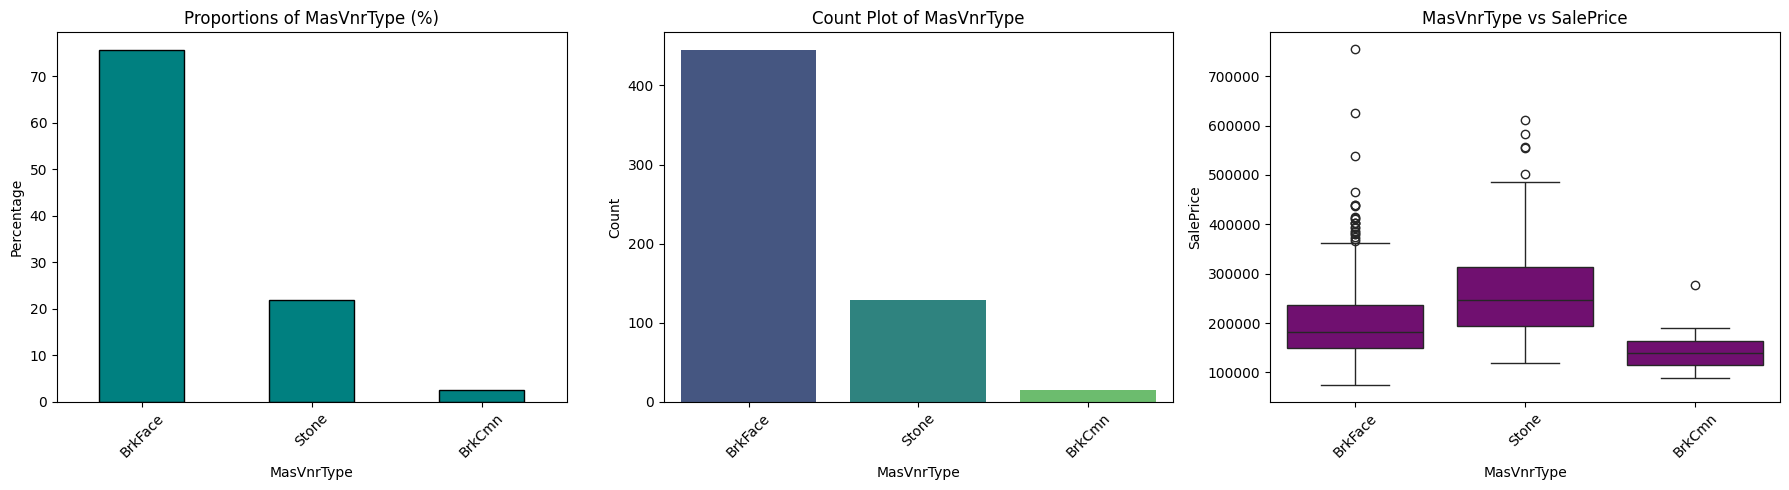


MASVNRTYPE - DESCRIPTIVE STATISTICS:


count unique      top freq  n_unique     mode
MasVnrType   588      3  BrkFace  445         3  BrkFace


Missing Values: 872 (59.7%)

📊 CATEGORICAL COLUMN ANALYSIS: MASVNRTYPE
Total categories: 3
Missing values: 872 (59.73%)

🔍 VALUE COUNTS:
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15

📈 PERCENTAGE DISTRIBUTION:
MasVnrType
BrkFace    75.68
Stone      21.77
BrkCmn      2.55

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: BrkFace (75.68%)
• Least common category: 15.00%)
• Imbalance ratio: 29.7x



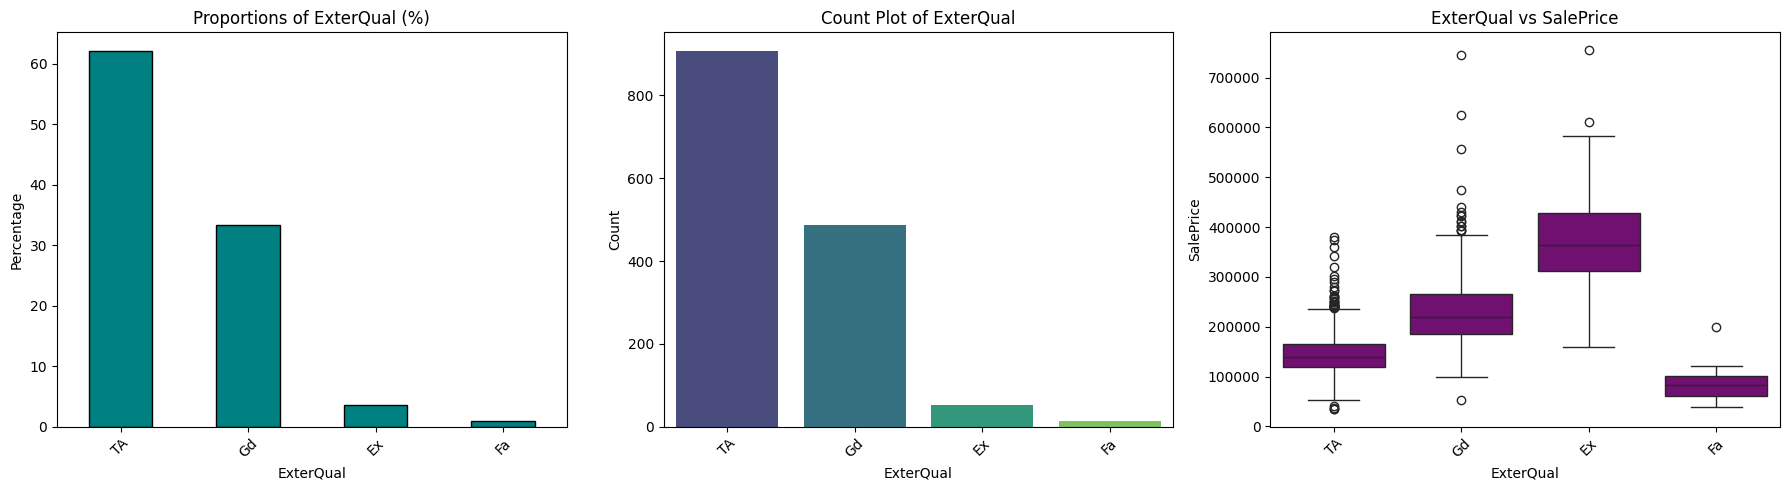


EXTERQUAL - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
ExterQual  1460      4  TA  906         4   TA


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: EXTERQUAL
Total categories: 4
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14

📈 PERCENTAGE DISTRIBUTION:
ExterQual
TA    62.05
Gd    33.42
Ex     3.56
Fa     0.96

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
ExterQual
Fa    0.96

⚖️ BALANCE ANALYSIS:
• Most common category: TA (62.05%)
• Least common category: 14.00%)
• Imbalance ratio: 64.7x



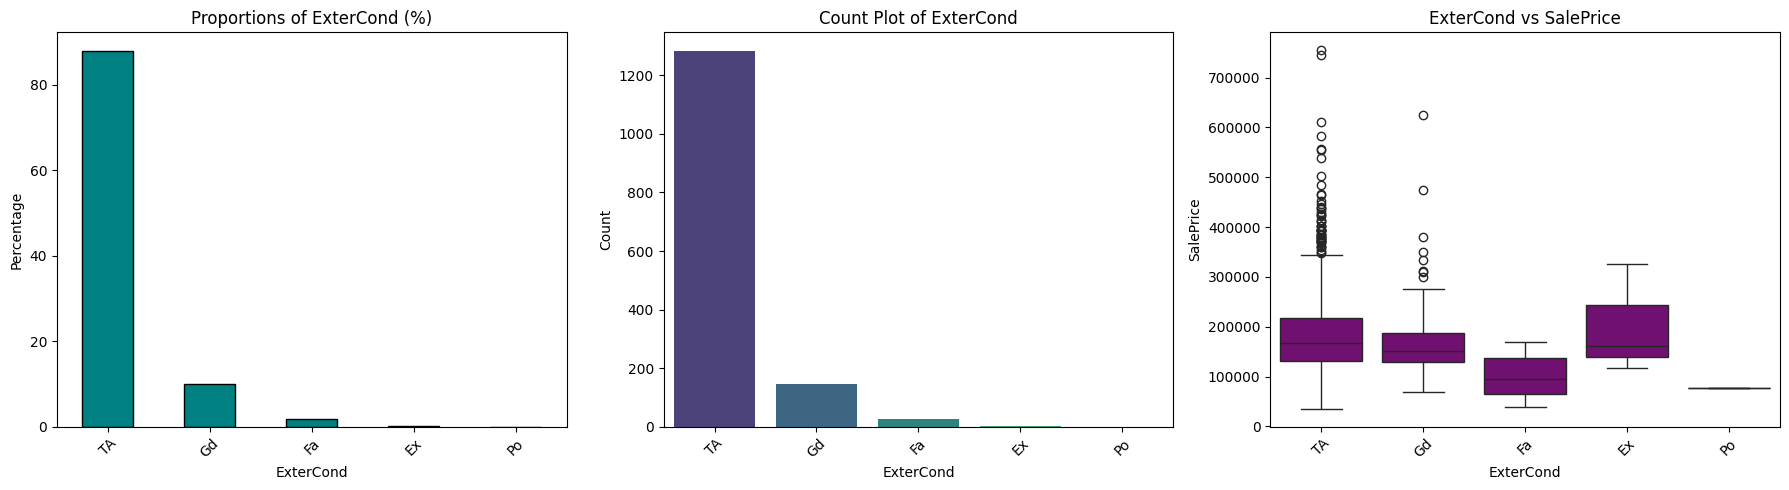


EXTERCOND - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
ExterCond  1460      5  TA  1282         5   TA


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: EXTERCOND
Total categories: 5
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1

📈 PERCENTAGE DISTRIBUTION:
ExterCond
TA    87.81
Gd    10.00
Fa     1.92
Ex     0.21
Po     0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
ExterCond
Ex    0.21
Po    0.07

⚖️ BALANCE ANALYSIS:
• Most common category: TA (87.81%)
• Least common category: 1.00%)
• Imbalance ratio: 1282.0x



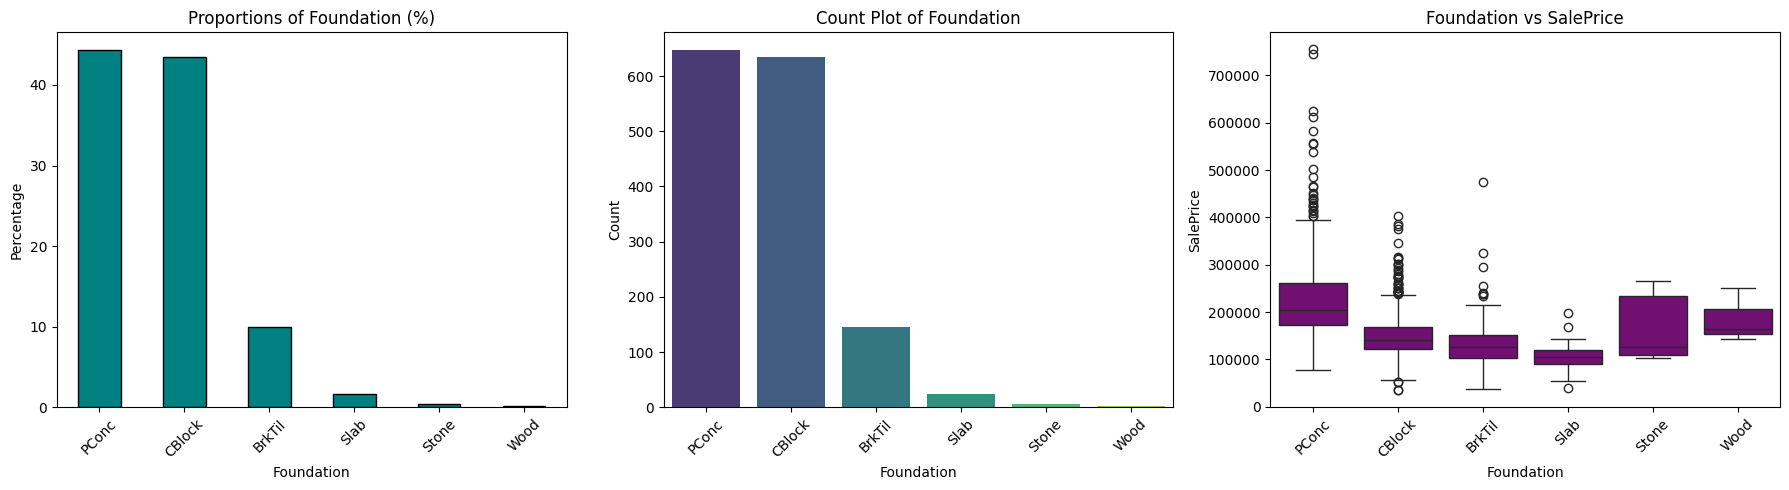


FOUNDATION - DESCRIPTIVE STATISTICS:


count unique    top freq  n_unique   mode
Foundation  1460      6  PConc  647         6  PConc


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: FOUNDATION
Total categories: 6
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3

📈 PERCENTAGE DISTRIBUTION:
Foundation
PConc     44.32
CBlock    43.42
BrkTil    10.00
Slab       1.64
Stone      0.41
Wood       0.21

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
Foundation
Stone    0.41
Wood     0.21

⚖️ BALANCE ANALYSIS:
• Most common category: PConc (44.32%)
• Least common category: 3.00%)
• Imbalance ratio: 215.7x



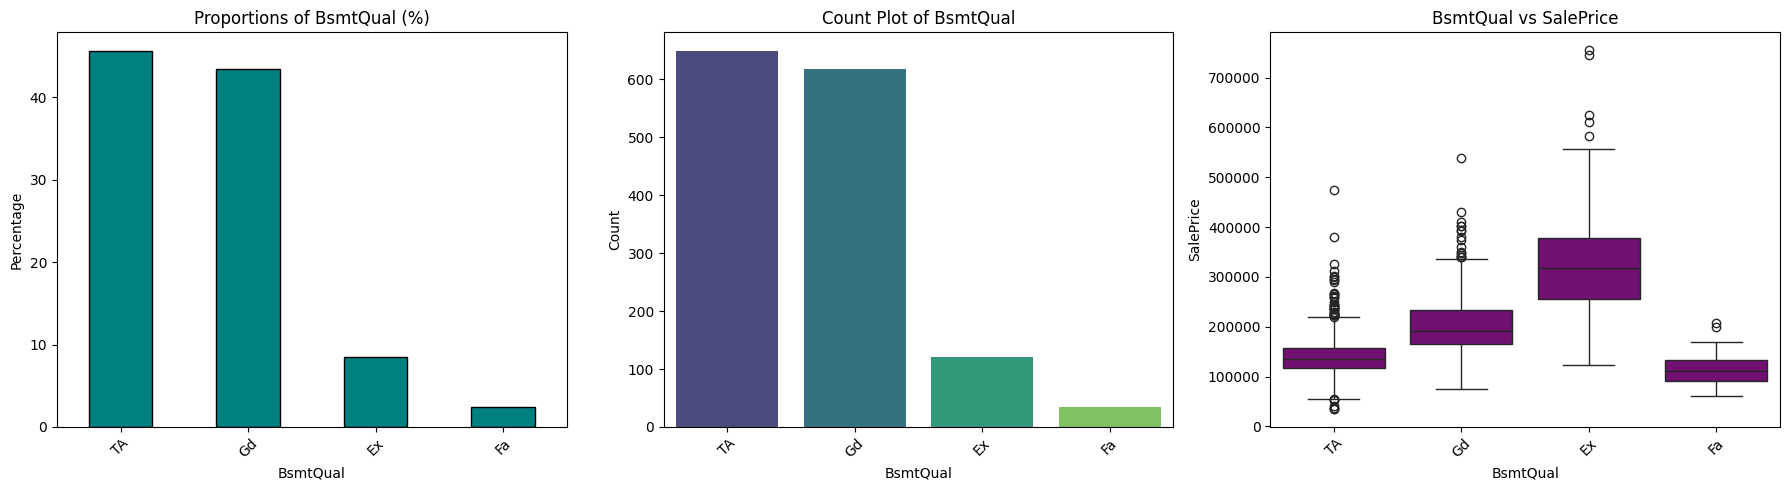


BSMTQUAL - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
BsmtQual  1423      4  TA  649         4   TA


Missing Values: 37 (2.5%)

📊 CATEGORICAL COLUMN ANALYSIS: BSMTQUAL
Total categories: 4
Missing values: 37 (2.53%)

🔍 VALUE COUNTS:
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35

📈 PERCENTAGE DISTRIBUTION:
BsmtQual
TA    45.61
Gd    43.43
Ex     8.50
Fa     2.46

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: TA (45.61%)
• Least common category: 35.00%)
• Imbalance ratio: 18.5x



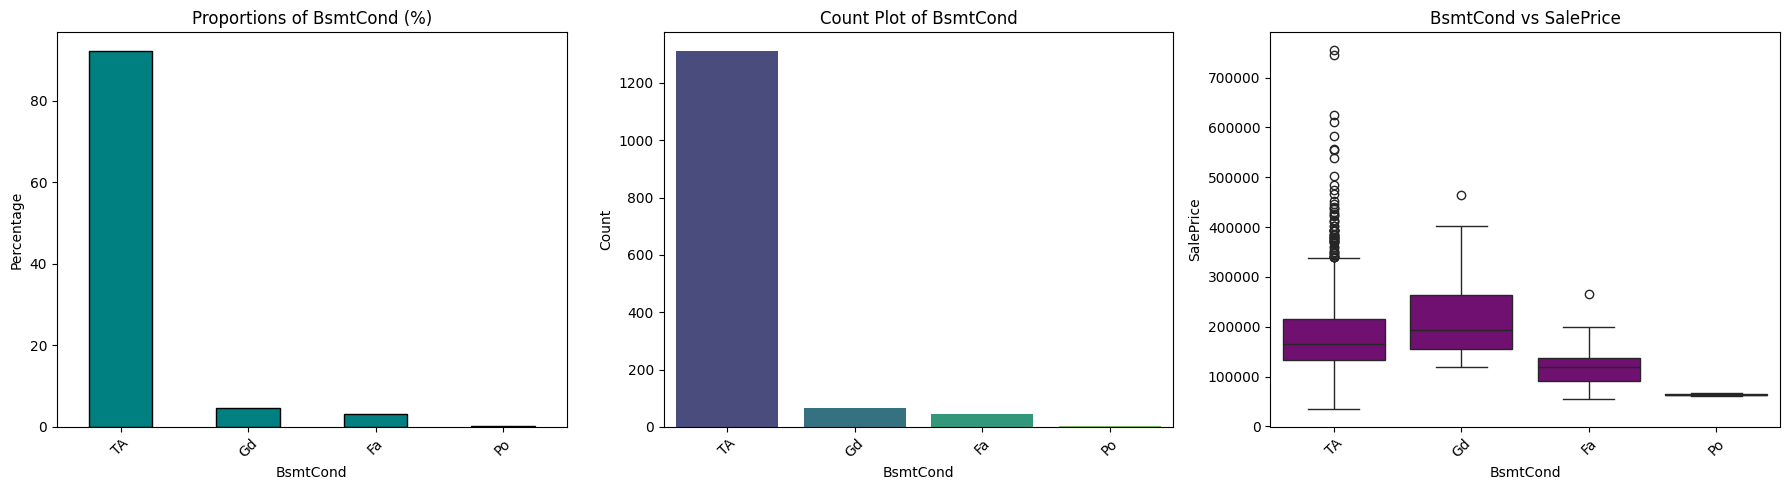


BSMTCOND - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
BsmtCond  1423      4  TA  1311         4   TA


Missing Values: 37 (2.5%)

📊 CATEGORICAL COLUMN ANALYSIS: BSMTCOND
Total categories: 4
Missing values: 37 (2.53%)

🔍 VALUE COUNTS:
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2

📈 PERCENTAGE DISTRIBUTION:
BsmtCond
TA    92.13
Gd     4.57
Fa     3.16
Po     0.14

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
BsmtCond
Po    0.14

⚖️ BALANCE ANALYSIS:
• Most common category: TA (92.13%)
• Least common category: 2.00%)
• Imbalance ratio: 655.5x



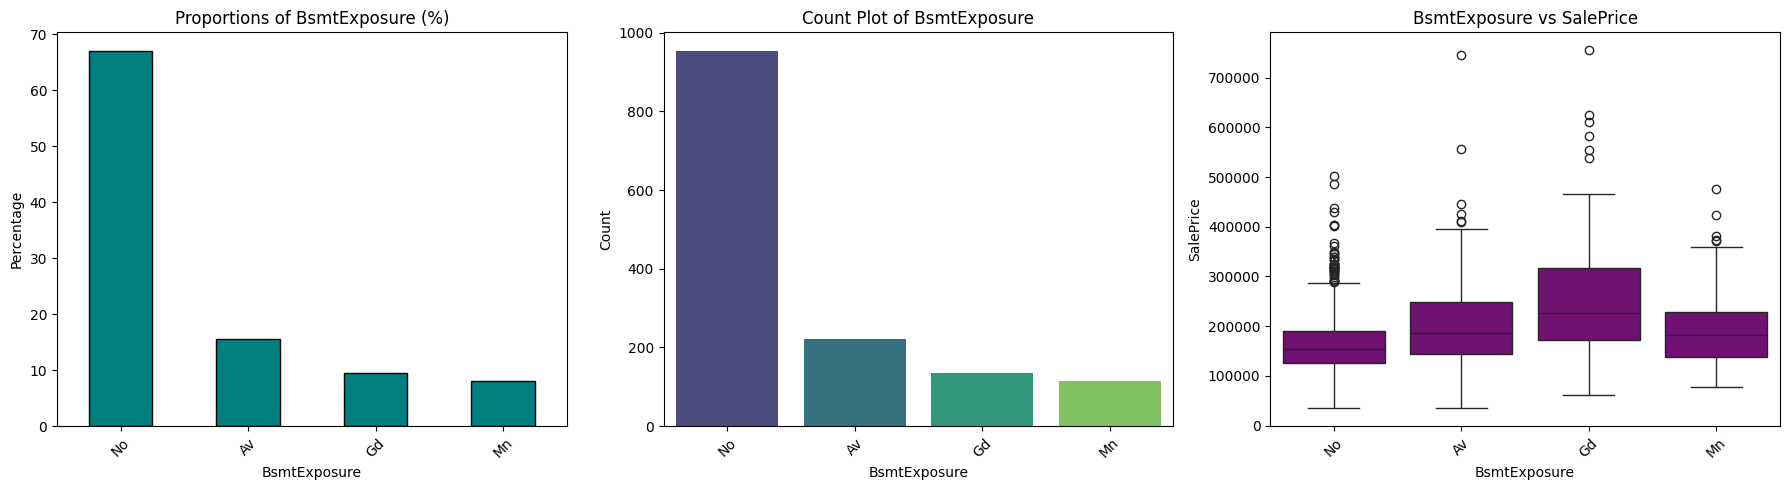


BSMTEXPOSURE - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
BsmtExposure  1422      4  No  953         4   No


Missing Values: 38 (2.6%)

📊 CATEGORICAL COLUMN ANALYSIS: BSMTEXPOSURE
Total categories: 4
Missing values: 38 (2.60%)

🔍 VALUE COUNTS:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114

📈 PERCENTAGE DISTRIBUTION:
BsmtExposure
No    67.02
Av    15.54
Gd     9.42
Mn     8.02

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: No (67.02%)
• Least common category: 114.00%)
• Imbalance ratio: 8.4x



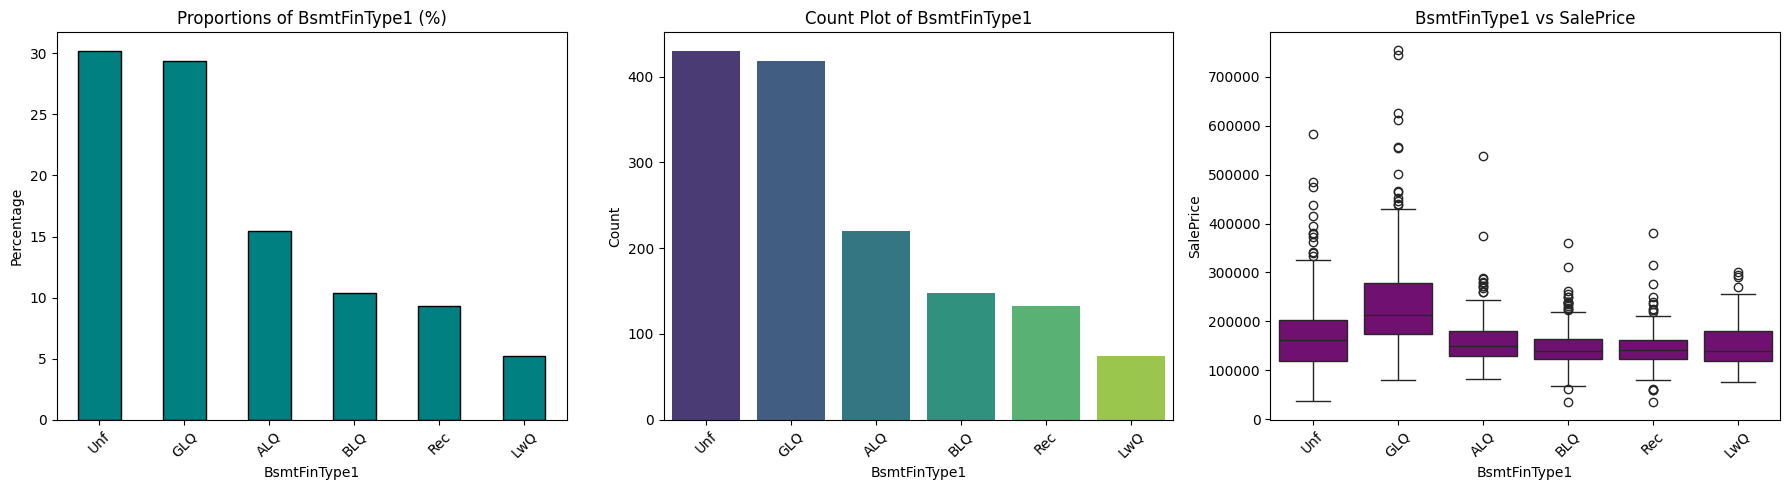


BSMTFINTYPE1 - DESCRIPTIVE STATISTICS:


count unique  top freq  n_unique mode
BsmtFinType1  1423      6  Unf  430         6  Unf


Missing Values: 37 (2.5%)

📊 CATEGORICAL COLUMN ANALYSIS: BSMTFINTYPE1
Total categories: 6
Missing values: 37 (2.53%)

🔍 VALUE COUNTS:
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74

📈 PERCENTAGE DISTRIBUTION:
BsmtFinType1
Unf    30.22
GLQ    29.37
ALQ    15.46
BLQ    10.40
Rec     9.35
LwQ     5.20

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Unf (30.22%)
• Least common category: 74.00%)
• Imbalance ratio: 5.8x



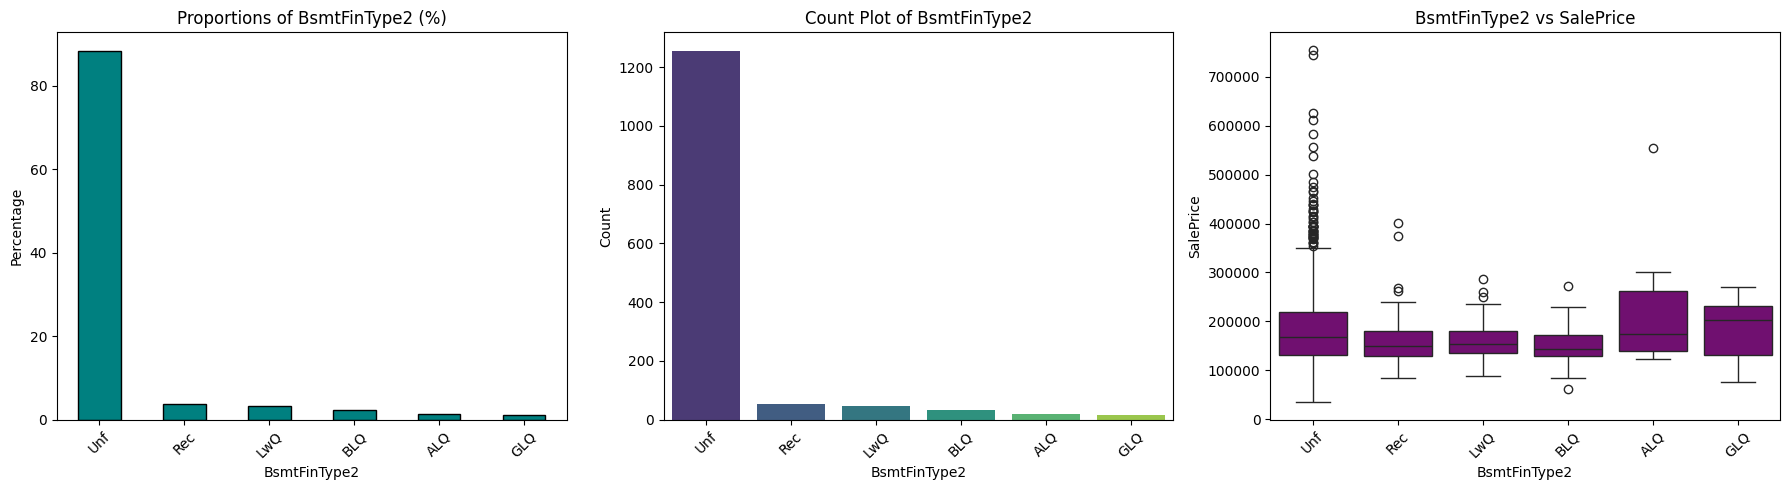


BSMTFINTYPE2 - DESCRIPTIVE STATISTICS:


count unique  top  freq  n_unique mode
BsmtFinType2  1422      6  Unf  1256         6  Unf


Missing Values: 38 (2.6%)

📊 CATEGORICAL COLUMN ANALYSIS: BSMTFINTYPE2
Total categories: 6
Missing values: 38 (2.60%)

🔍 VALUE COUNTS:
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14

📈 PERCENTAGE DISTRIBUTION:
BsmtFinType2
Unf    88.33
Rec     3.80
LwQ     3.23
BLQ     2.32
ALQ     1.34
GLQ     0.98

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
BsmtFinType2
GLQ    0.98

⚖️ BALANCE ANALYSIS:
• Most common category: Unf (88.33%)
• Least common category: 14.00%)
• Imbalance ratio: 89.7x



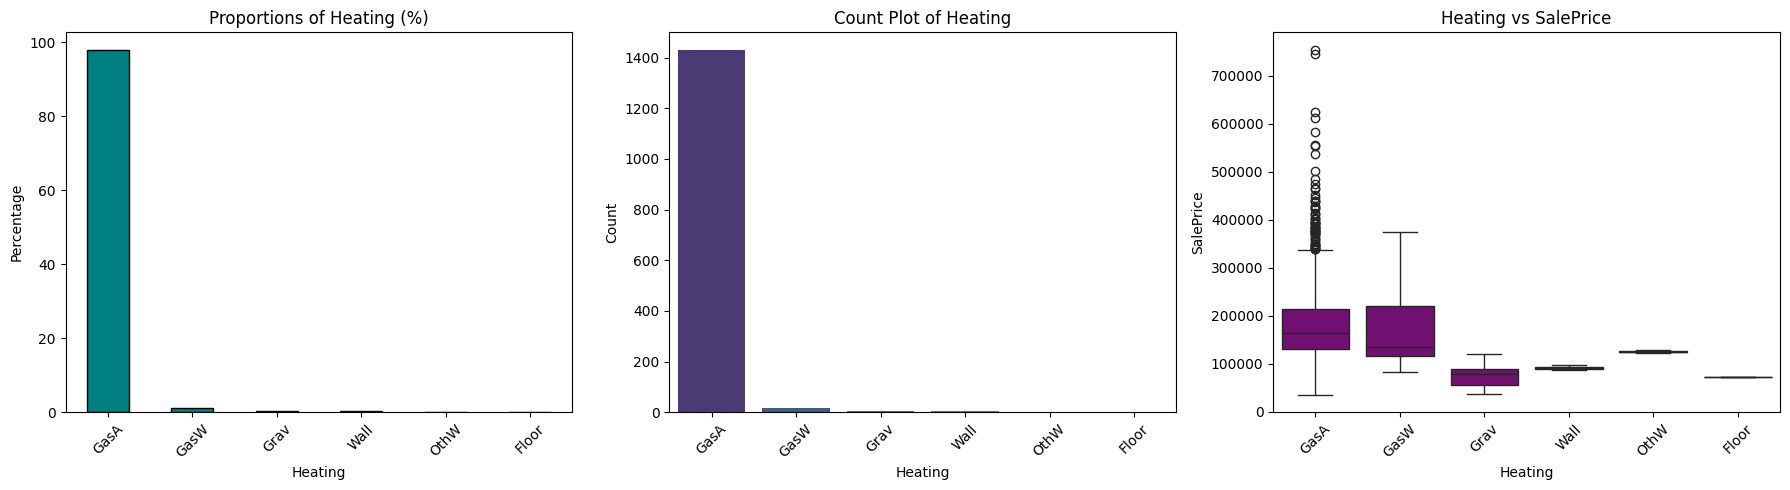


HEATING - DESCRIPTIVE STATISTICS:


count unique   top  freq  n_unique  mode
Heating  1460      6  GasA  1428         6  GasA


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: HEATING
Total categories: 6
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1

📈 PERCENTAGE DISTRIBUTION:
Heating
GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 4
  Rare categories and their percentages:
Heating
Grav     0.48
Wall     0.27
OthW     0.14
Floor    0.07

⚖️ BALANCE ANALYSIS:
• Most common category: GasA (97.81%)
• Least common category: 1.00%)
• Imbalance ratio: 1428.0x



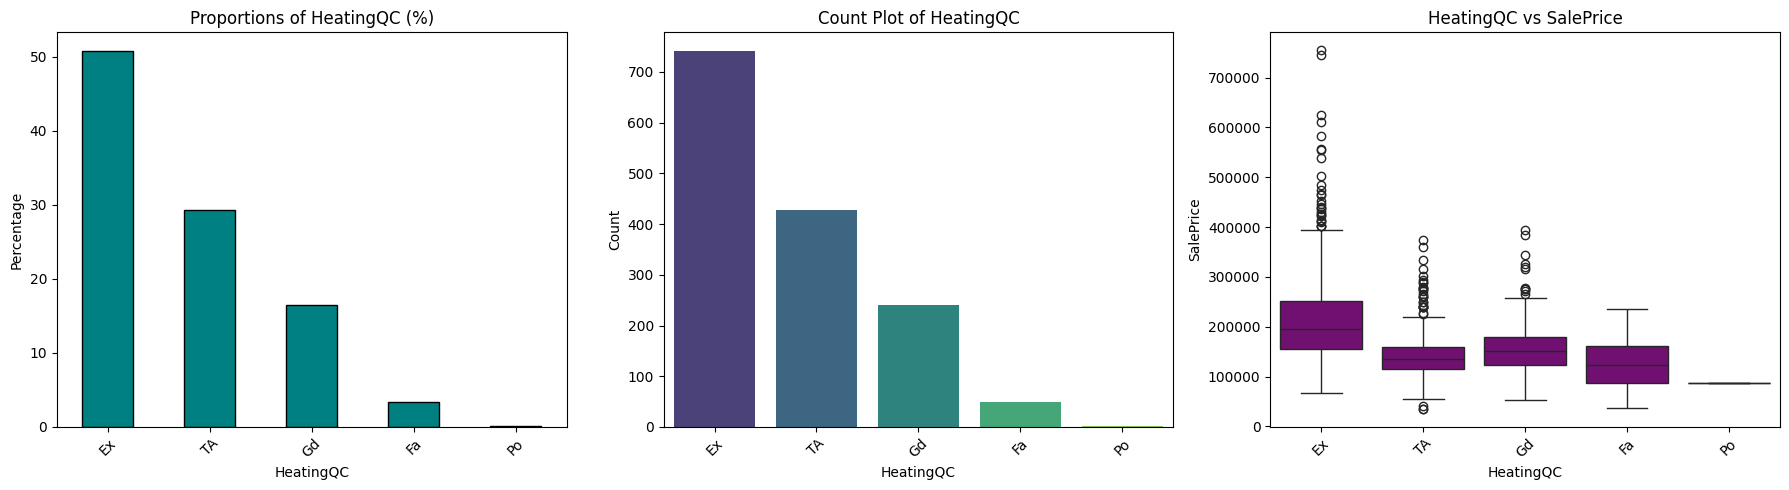


HEATINGQC - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
HeatingQC  1460      5  Ex  741         5   Ex


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: HEATINGQC
Total categories: 5
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1

📈 PERCENTAGE DISTRIBUTION:
HeatingQC
Ex    50.75
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 1
  Rare categories and their percentages:
HeatingQC
Po    0.07

⚖️ BALANCE ANALYSIS:
• Most common category: Ex (50.75%)
• Least common category: 1.00%)
• Imbalance ratio: 741.0x



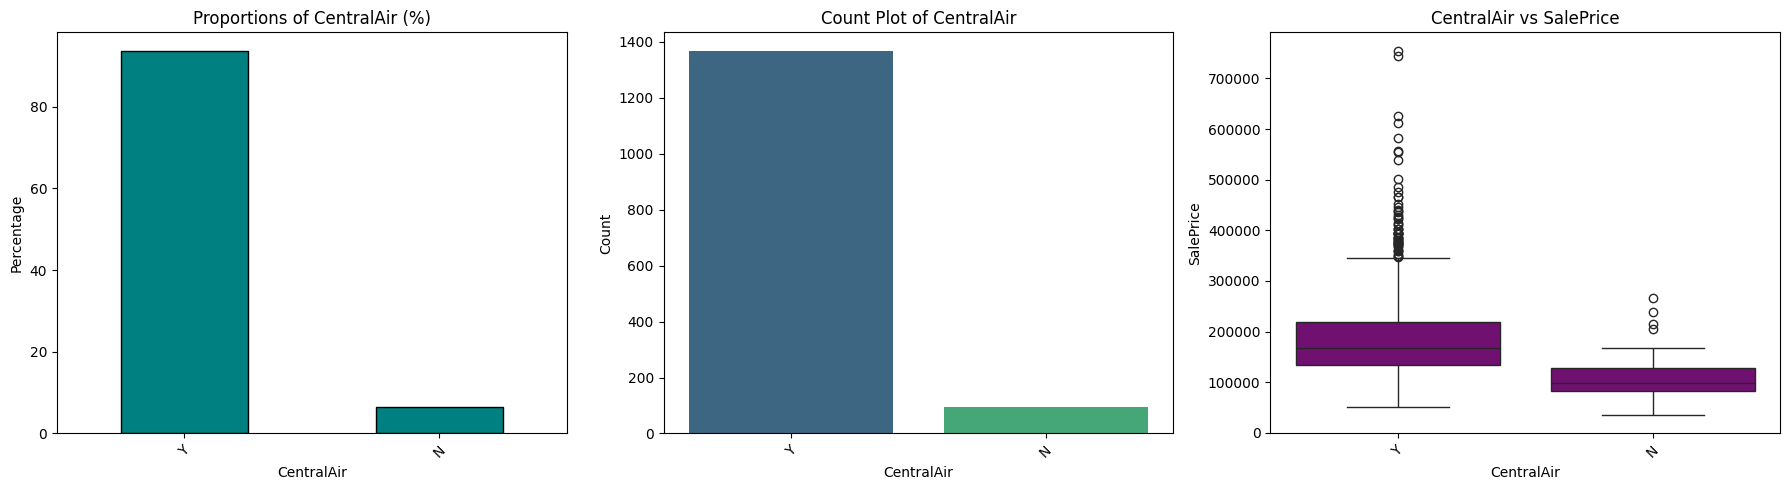


CENTRALAIR - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
CentralAir  1460      2   Y  1365         2    Y


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: CENTRALAIR
Total categories: 2
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
CentralAir
Y    1365
N      95

📈 PERCENTAGE DISTRIBUTION:
CentralAir
Y    93.49
N     6.51

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Y (93.49%)
• Least common category: 95.00%)
• Imbalance ratio: 14.4x



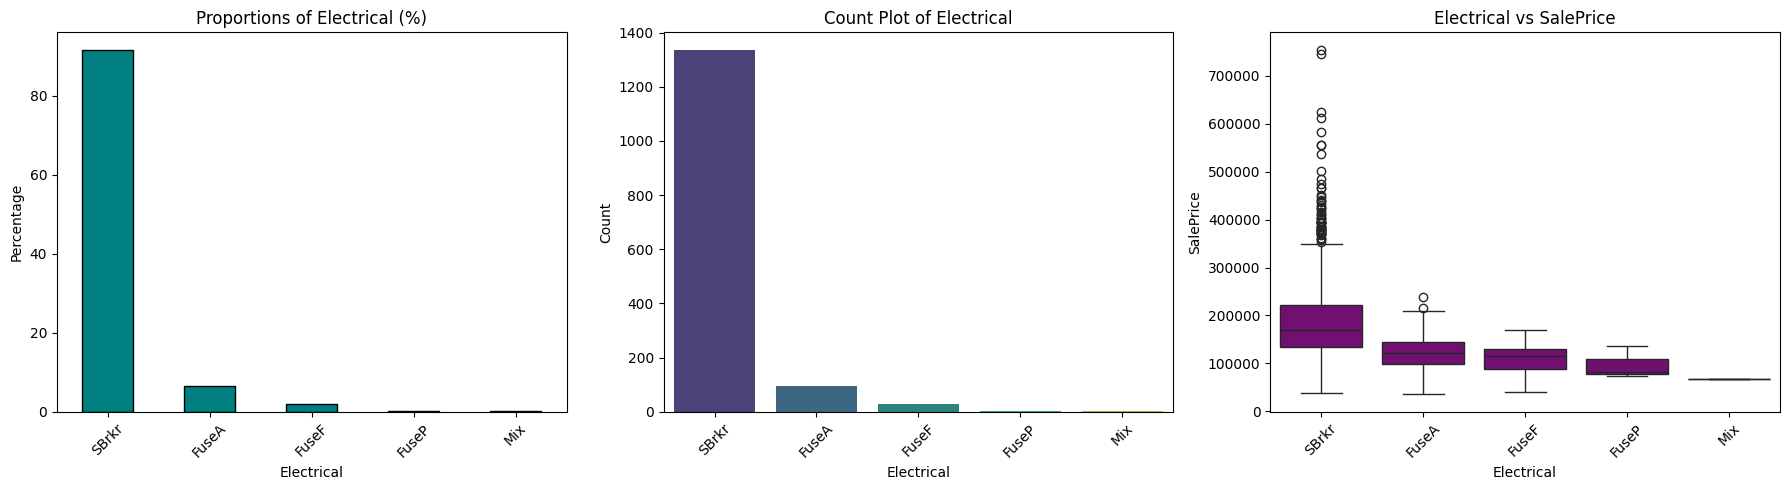


ELECTRICAL - DESCRIPTIVE STATISTICS:


count unique    top  freq  n_unique   mode
Electrical  1459      5  SBrkr  1334         5  SBrkr


Missing Values: 1 (0.1%)

📊 CATEGORICAL COLUMN ANALYSIS: ELECTRICAL
Total categories: 5
Missing values: 1 (0.07%)

🔍 VALUE COUNTS:
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1

📈 PERCENTAGE DISTRIBUTION:
Electrical
SBrkr    91.43
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
Electrical
FuseP    0.21
Mix      0.07

⚖️ BALANCE ANALYSIS:
• Most common category: SBrkr (91.43%)
• Least common category: 1.00%)
• Imbalance ratio: 1334.0x



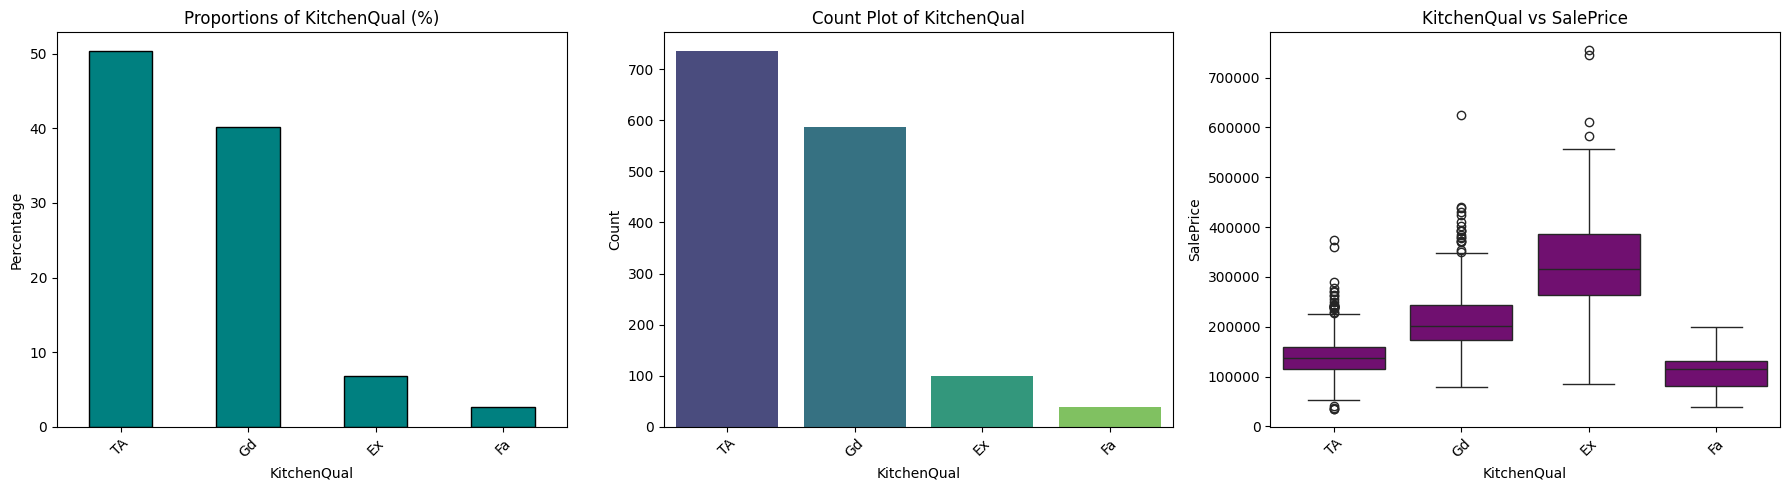


KITCHENQUAL - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
KitchenQual  1460      4  TA  735         4   TA


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: KITCHENQUAL
Total categories: 4
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39

📈 PERCENTAGE DISTRIBUTION:
KitchenQual
TA    50.34
Gd    40.14
Ex     6.85
Fa     2.67

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: TA (50.34%)
• Least common category: 39.00%)
• Imbalance ratio: 18.8x



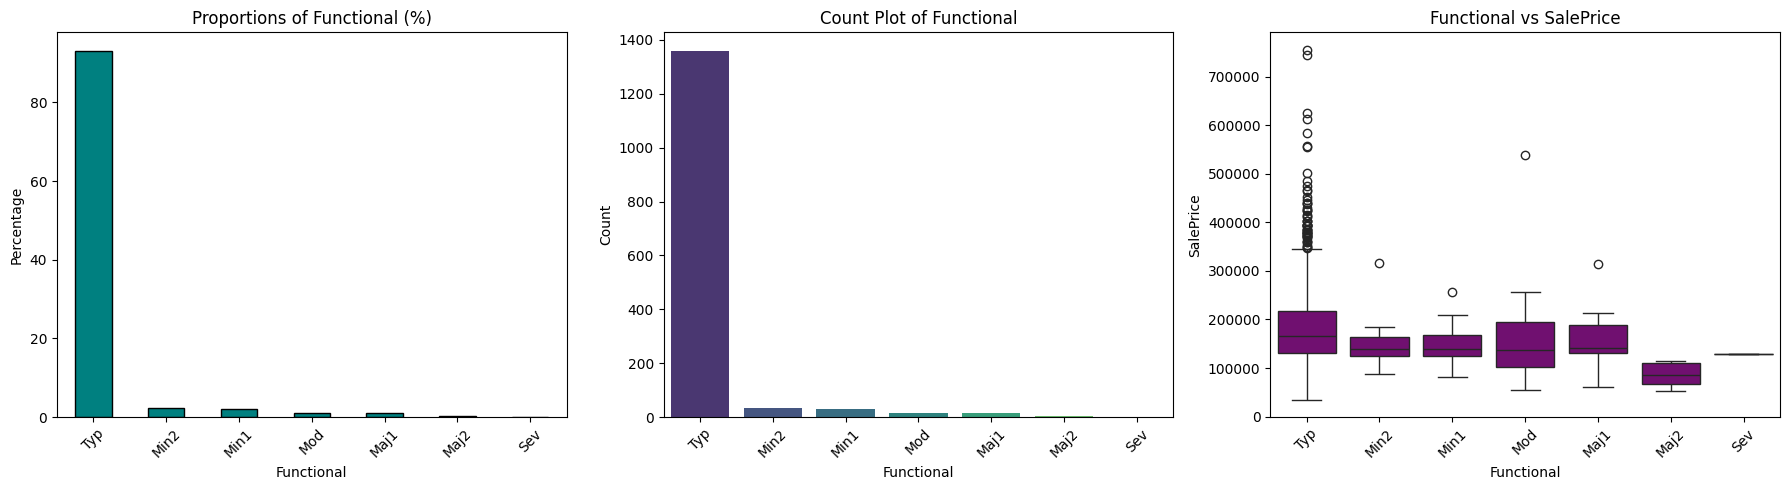


FUNCTIONAL - DESCRIPTIVE STATISTICS:


count unique  top  freq  n_unique mode
Functional  1460      7  Typ  1360         7  Typ


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: FUNCTIONAL
Total categories: 7
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1

📈 PERCENTAGE DISTRIBUTION:
Functional
Typ     93.15
Min2     2.33
Min1     2.12
Mod      1.03
Maj1     0.96
Maj2     0.34
Sev      0.07

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 3
  Rare categories and their percentages:
Functional
Maj1    0.96
Maj2    0.34
Sev     0.07

⚖️ BALANCE ANALYSIS:
• Most common category: Typ (93.15%)
• Least common category: 1.00%)
• Imbalance ratio: 1360.0x



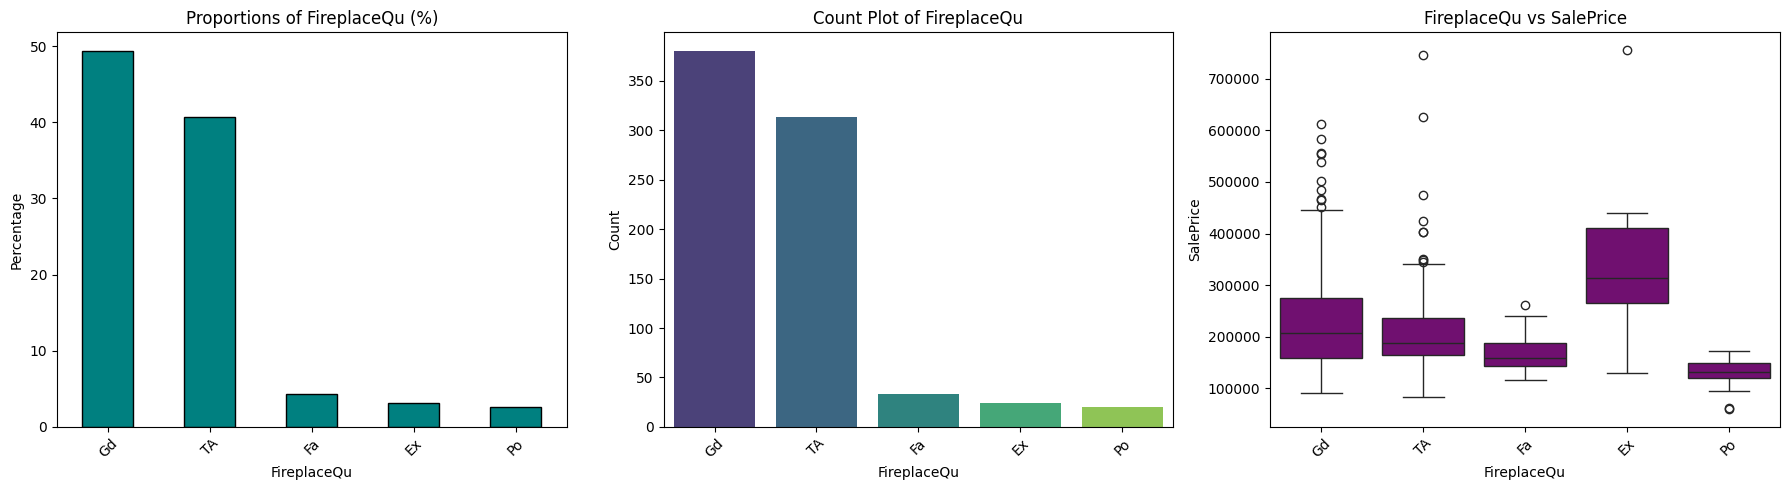


FIREPLACEQU - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
FireplaceQu   770      5  Gd  380         5   Gd


Missing Values: 690 (47.3%)

📊 CATEGORICAL COLUMN ANALYSIS: FIREPLACEQU
Total categories: 5
Missing values: 690 (47.26%)

🔍 VALUE COUNTS:
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20

📈 PERCENTAGE DISTRIBUTION:
FireplaceQu
Gd    49.35
TA    40.65
Fa     4.29
Ex     3.12
Po     2.60

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Gd (49.35%)
• Least common category: 20.00%)
• Imbalance ratio: 19.0x



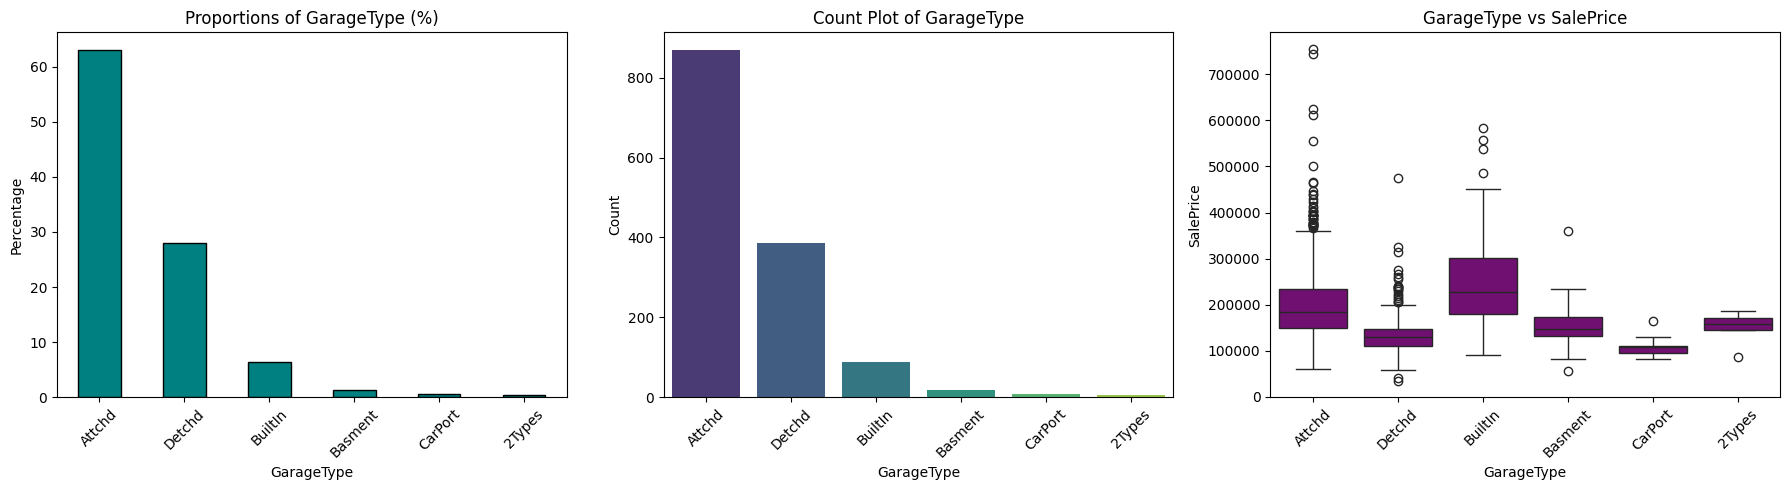


GARAGETYPE - DESCRIPTIVE STATISTICS:


count unique     top freq  n_unique    mode
GarageType  1379      6  Attchd  870         6  Attchd


Missing Values: 81 (5.5%)

📊 CATEGORICAL COLUMN ANALYSIS: GARAGETYPE
Total categories: 6
Missing values: 81 (5.55%)

🔍 VALUE COUNTS:
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6

📈 PERCENTAGE DISTRIBUTION:
GarageType
Attchd     63.09
Detchd     28.06
BuiltIn     6.38
Basment     1.38
CarPort     0.65
2Types      0.44

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
GarageType
CarPort    0.65
2Types     0.44

⚖️ BALANCE ANALYSIS:
• Most common category: Attchd (63.09%)
• Least common category: 6.00%)
• Imbalance ratio: 145.0x



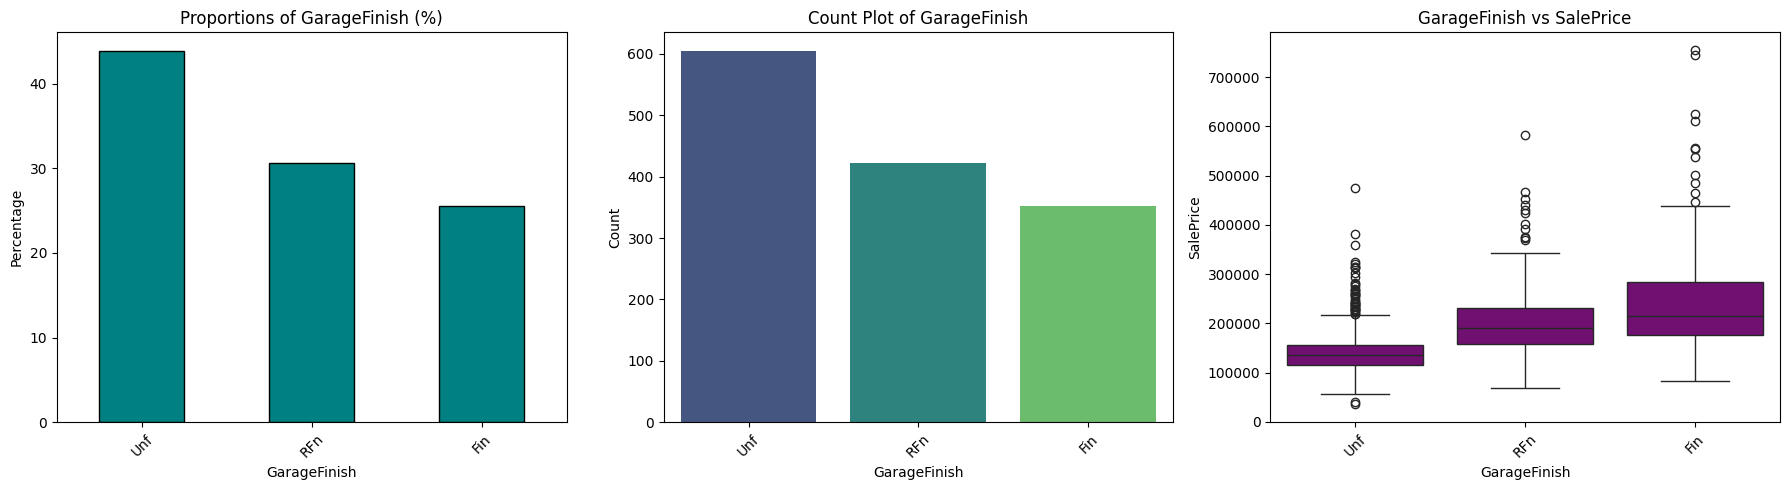


GARAGEFINISH - DESCRIPTIVE STATISTICS:


count unique  top freq  n_unique mode
GarageFinish  1379      3  Unf  605         3  Unf


Missing Values: 81 (5.5%)

📊 CATEGORICAL COLUMN ANALYSIS: GARAGEFINISH
Total categories: 3
Missing values: 81 (5.55%)

🔍 VALUE COUNTS:
GarageFinish
Unf    605
RFn    422
Fin    352

📈 PERCENTAGE DISTRIBUTION:
GarageFinish
Unf    43.87
RFn    30.60
Fin    25.53

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Unf (43.87%)
• Least common category: 352.00%)
• Imbalance ratio: 1.7x



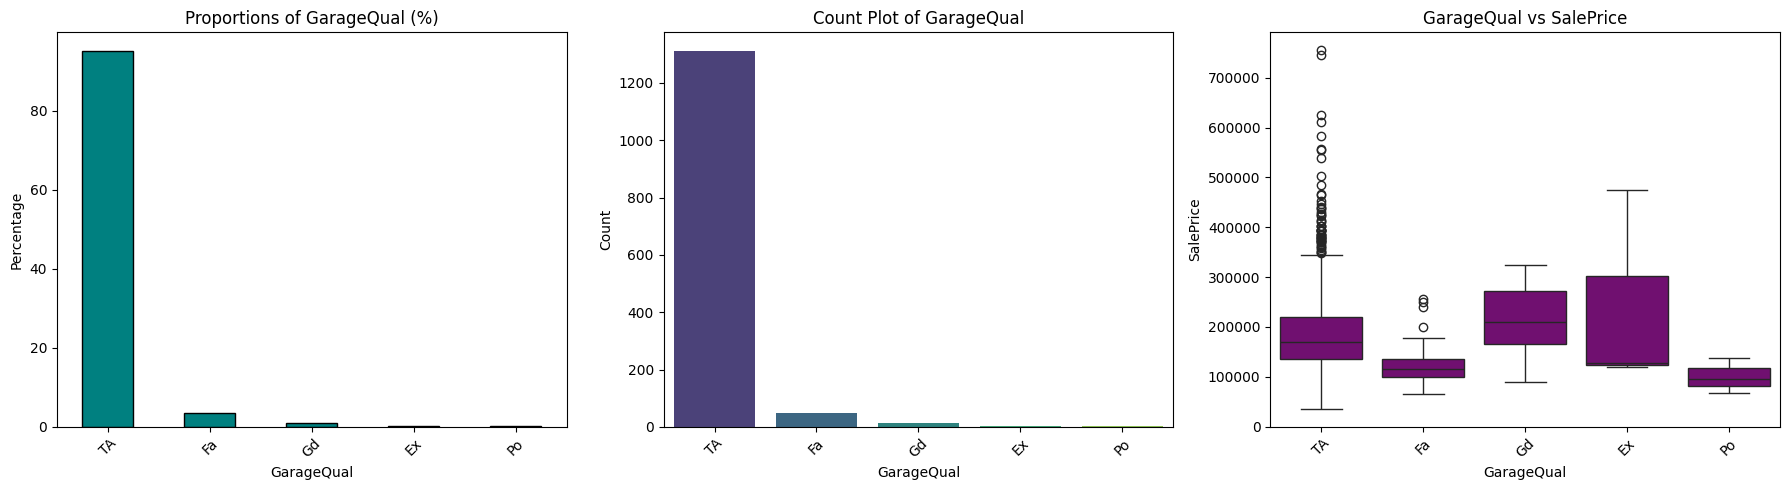


GARAGEQUAL - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
GarageQual  1379      5  TA  1311         5   TA


Missing Values: 81 (5.5%)

📊 CATEGORICAL COLUMN ANALYSIS: GARAGEQUAL
Total categories: 5
Missing values: 81 (5.55%)

🔍 VALUE COUNTS:
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3

📈 PERCENTAGE DISTRIBUTION:
GarageQual
TA    95.07
Fa     3.48
Gd     1.02
Ex     0.22
Po     0.22

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
GarageQual
Ex    0.22
Po    0.22

⚖️ BALANCE ANALYSIS:
• Most common category: TA (95.07%)
• Least common category: 3.00%)
• Imbalance ratio: 437.0x



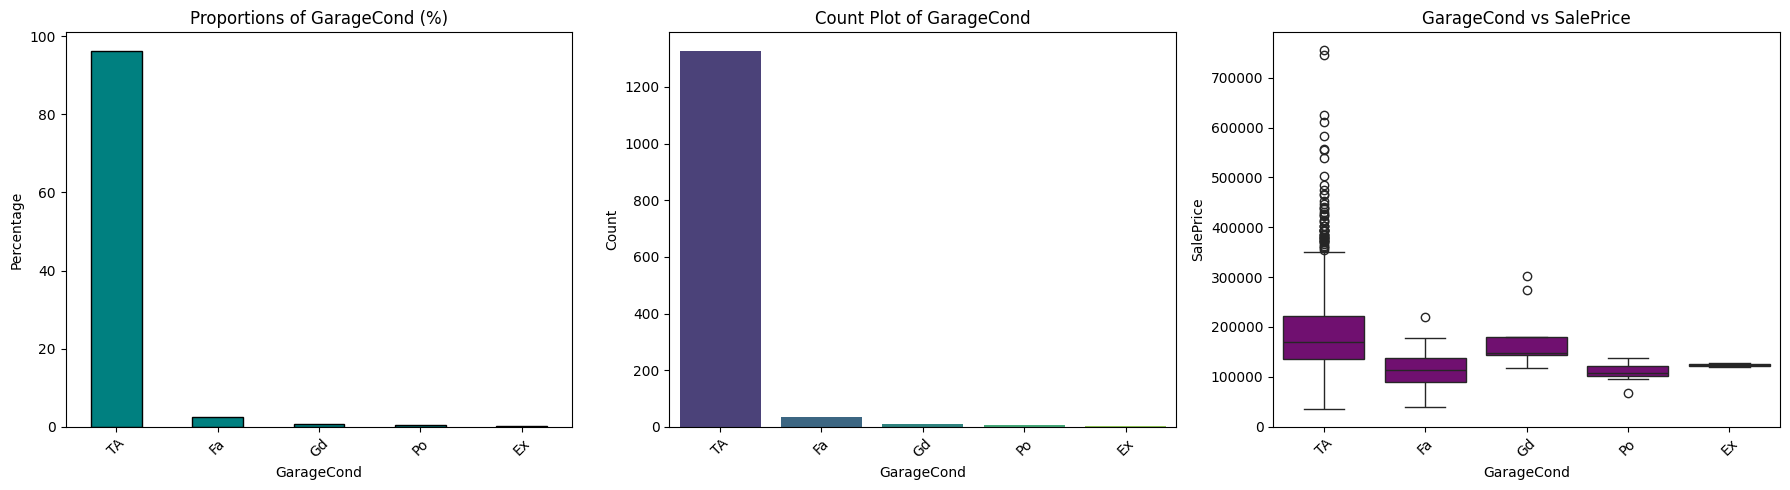


GARAGECOND - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
GarageCond  1379      5  TA  1326         5   TA


Missing Values: 81 (5.5%)

📊 CATEGORICAL COLUMN ANALYSIS: GARAGECOND
Total categories: 5
Missing values: 81 (5.55%)

🔍 VALUE COUNTS:
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2

📈 PERCENTAGE DISTRIBUTION:
GarageCond
TA    96.16
Fa     2.54
Gd     0.65
Po     0.51
Ex     0.15

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 3
  Rare categories and their percentages:
GarageCond
Gd    0.65
Po    0.51
Ex    0.15

⚖️ BALANCE ANALYSIS:
• Most common category: TA (96.16%)
• Least common category: 2.00%)
• Imbalance ratio: 663.0x



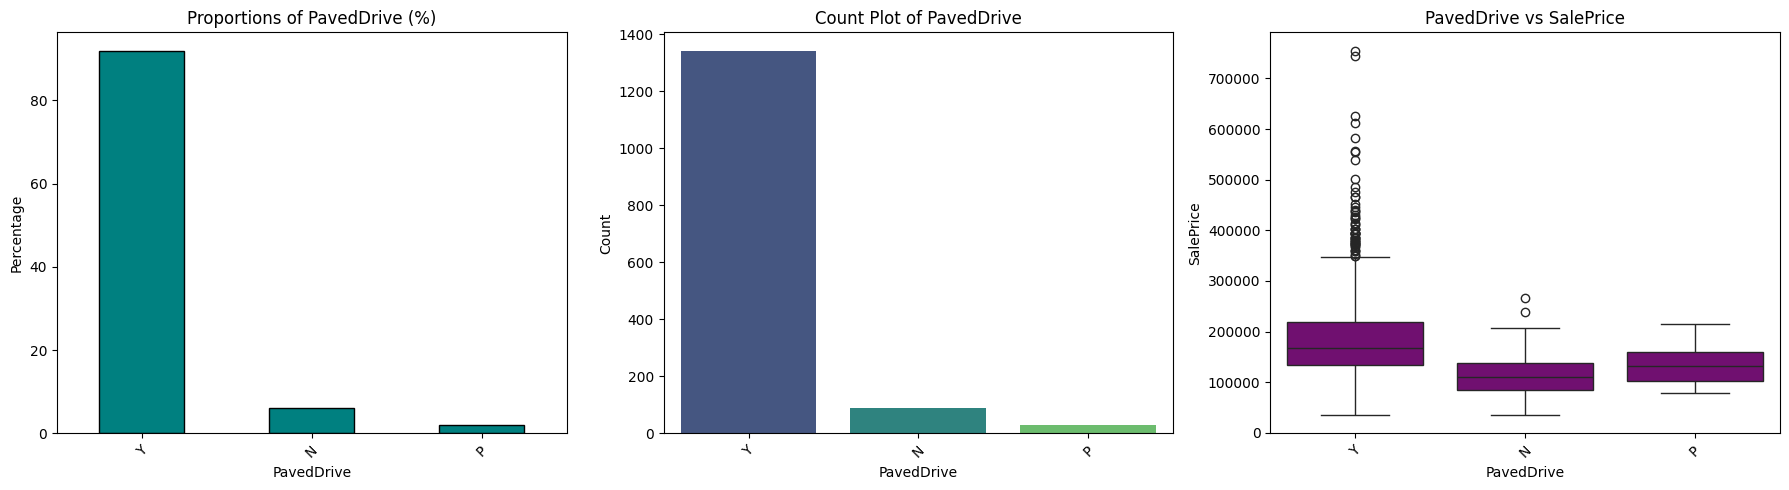


PAVEDDRIVE - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
PavedDrive  1460      3   Y  1340         3    Y


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: PAVEDDRIVE
Total categories: 3
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
PavedDrive
Y    1340
N      90
P      30

📈 PERCENTAGE DISTRIBUTION:
PavedDrive
Y    91.78
N     6.16
P     2.05

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Y (91.78%)
• Least common category: 30.00%)
• Imbalance ratio: 44.7x



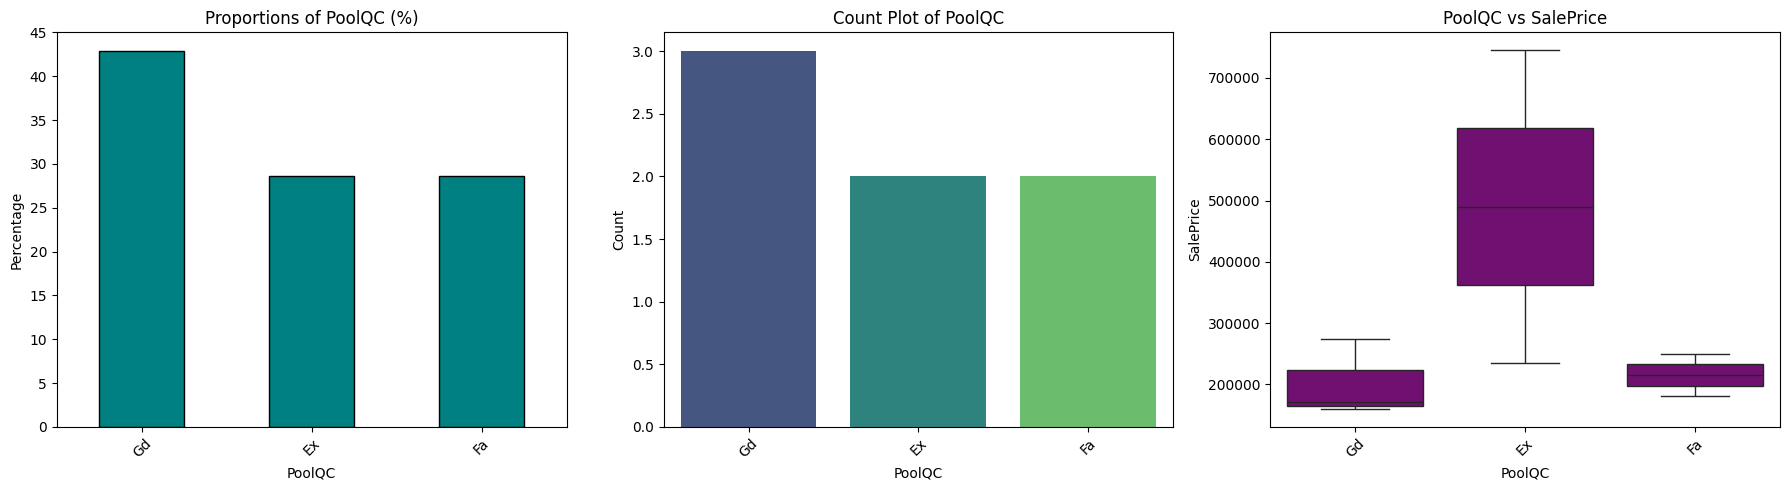


POOLQC - DESCRIPTIVE STATISTICS:


count unique top freq  n_unique mode
PoolQC     7      3  Gd    3         3   Gd


Missing Values: 1453 (99.5%)

📊 CATEGORICAL COLUMN ANALYSIS: POOLQC
Total categories: 3
Missing values: 1453 (99.52%)

🔍 VALUE COUNTS:
PoolQC
Gd    3
Ex    2
Fa    2

📈 PERCENTAGE DISTRIBUTION:
PoolQC
Gd    42.86
Ex    28.57
Fa    28.57

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Gd (42.86%)
• Least common category: 2.00%)
• Imbalance ratio: 1.5x



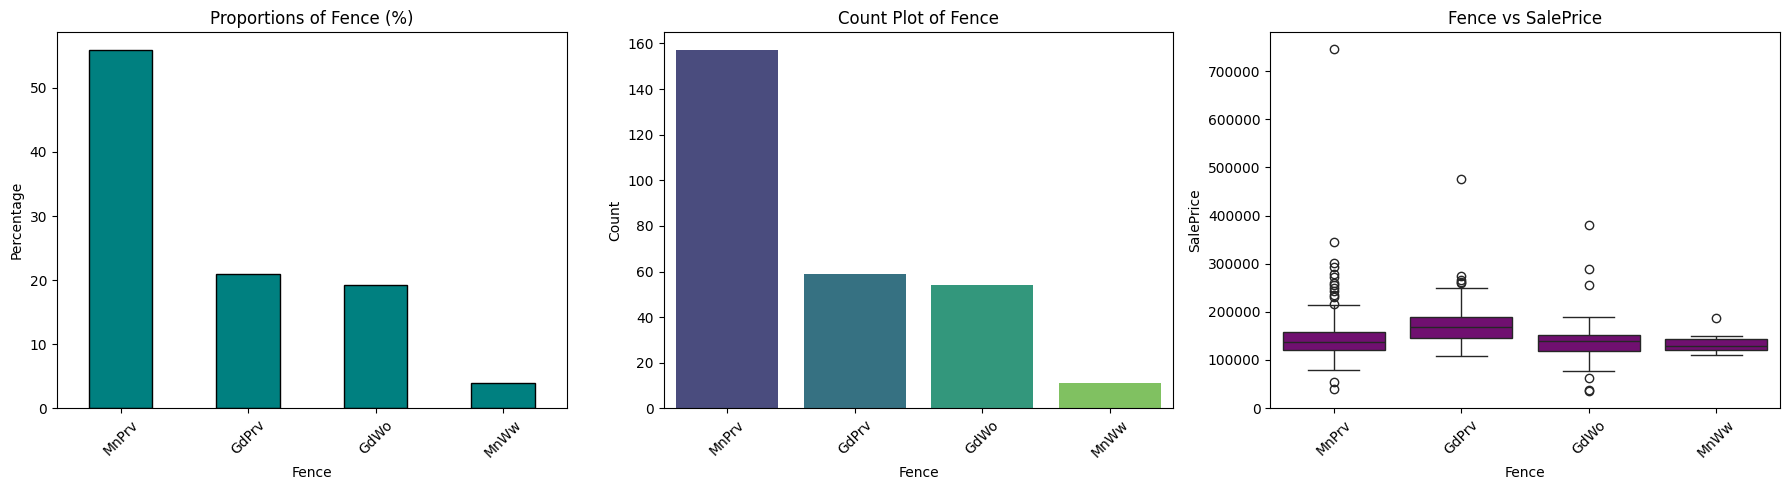


FENCE - DESCRIPTIVE STATISTICS:


count unique    top freq  n_unique   mode
Fence   281      4  MnPrv  157         4  MnPrv


Missing Values: 1179 (80.8%)

📊 CATEGORICAL COLUMN ANALYSIS: FENCE
Total categories: 4
Missing values: 1179 (80.75%)

🔍 VALUE COUNTS:
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11

📈 PERCENTAGE DISTRIBUTION:
Fence
MnPrv    55.87
GdPrv    21.00
GdWo     19.22
MnWw      3.91

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: MnPrv (55.87%)
• Least common category: 11.00%)
• Imbalance ratio: 14.3x



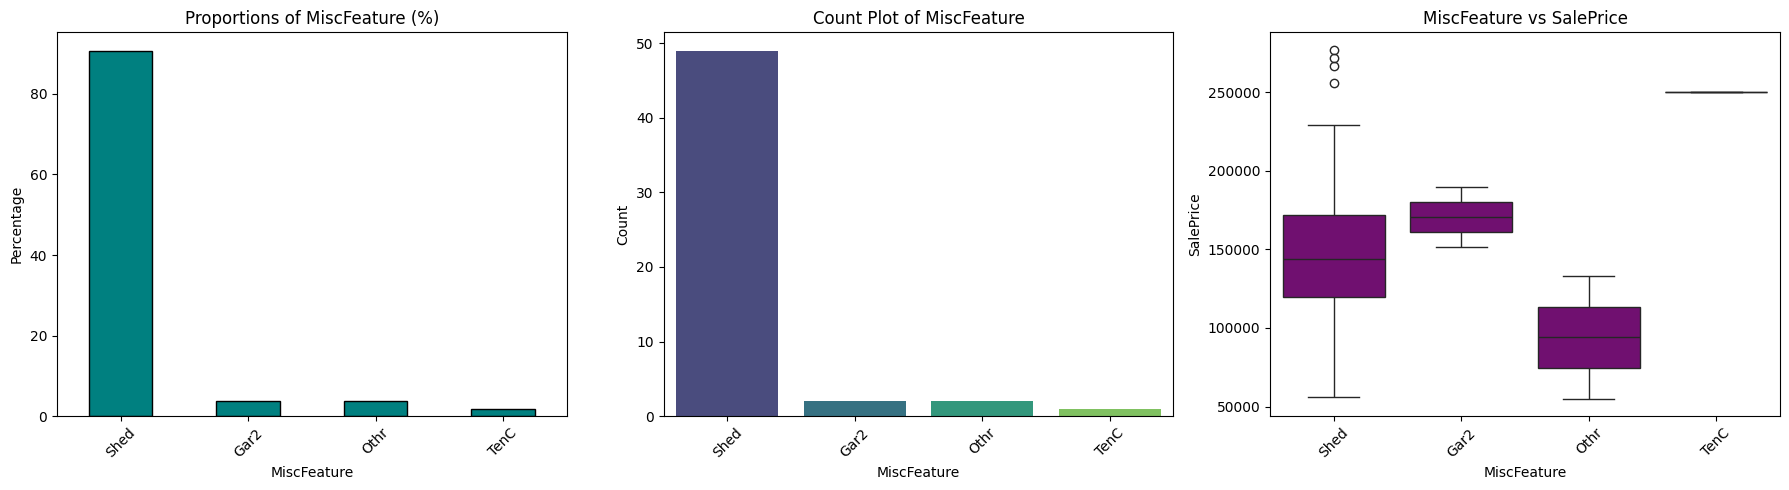


MISCFEATURE - DESCRIPTIVE STATISTICS:


count unique   top freq  n_unique  mode
MiscFeature    54      4  Shed   49         4  Shed


Missing Values: 1406 (96.3%)

📊 CATEGORICAL COLUMN ANALYSIS: MISCFEATURE
Total categories: 4
Missing values: 1406 (96.30%)

🔍 VALUE COUNTS:
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1

📈 PERCENTAGE DISTRIBUTION:
MiscFeature
Shed    90.74
Gar2     3.70
Othr     3.70
TenC     1.85

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No

⚖️ BALANCE ANALYSIS:
• Most common category: Shed (90.74%)
• Least common category: 1.00%)
• Imbalance ratio: 49.0x



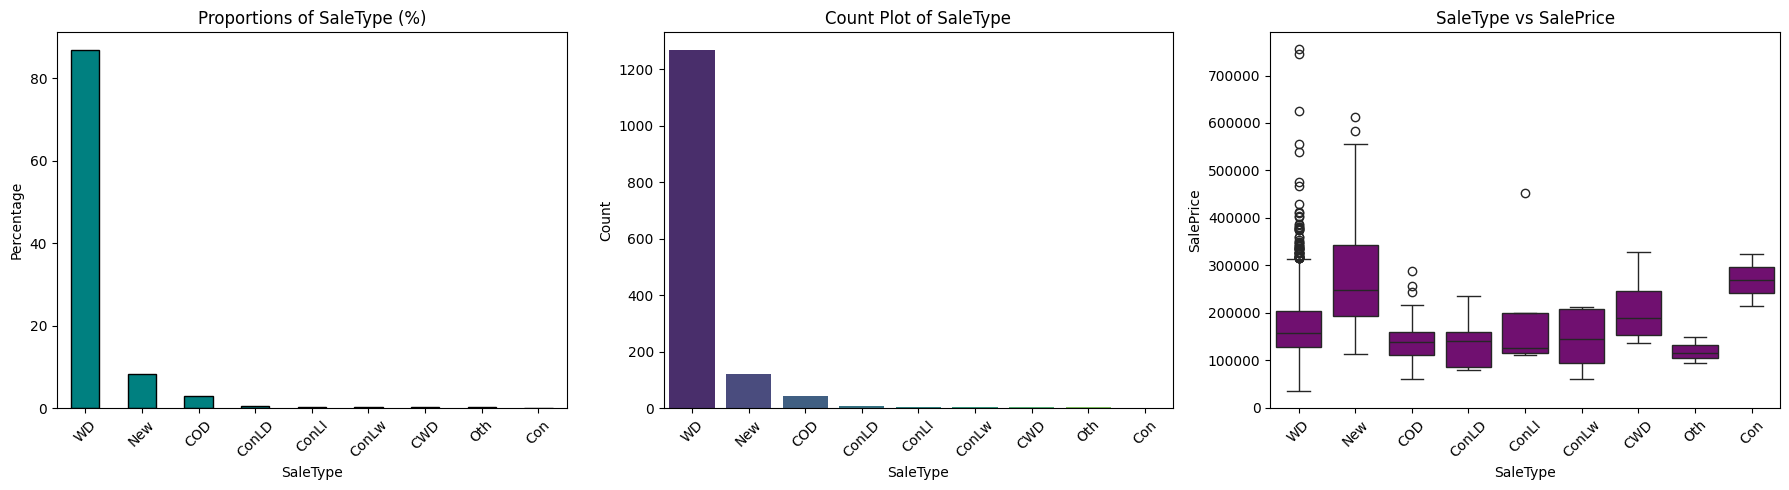


SALETYPE - DESCRIPTIVE STATISTICS:


count unique top  freq  n_unique mode
SaleType  1460      9  WD  1267         9   WD


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: SALETYPE
Total categories: 9
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2

📈 PERCENTAGE DISTRIBUTION:
SaleType
WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLI     0.34
ConLw     0.34
CWD       0.27
Oth       0.21
Con       0.14

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 6
  Rare categories and their percentages:
SaleType
ConLD    0.62
ConLI    0.34
ConLw    0.34
CWD      0.27
Oth      0.21
Con      0.14

⚖️ BALANCE ANALYSIS:
• Most common category: WD (86.78%)
• Least common category: 2.00%)
• Imbalance ratio: 633.5x



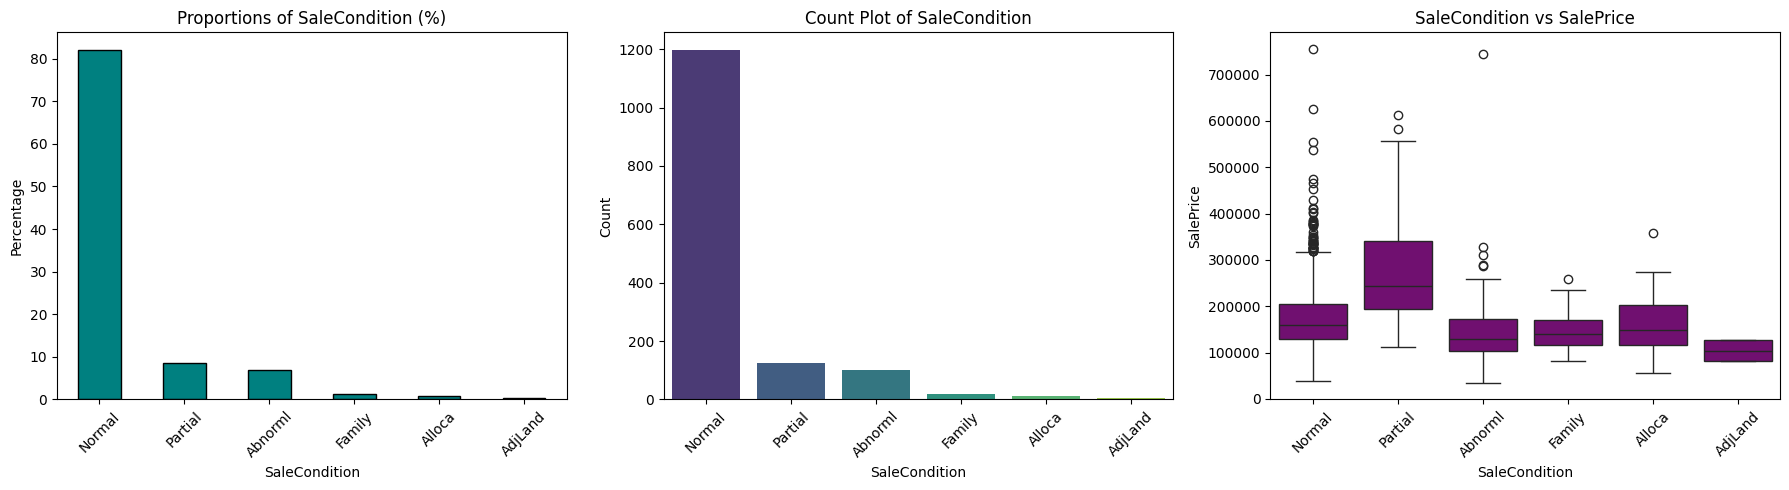


SALECONDITION - DESCRIPTIVE STATISTICS:


count unique     top  freq  n_unique    mode
SaleCondition  1460      6  Normal  1198         6  Normal


Missing Values: 0 (0.0%)

📊 CATEGORICAL COLUMN ANALYSIS: SALECONDITION
Total categories: 6
Missing values: 0 (0.00%)

🔍 VALUE COUNTS:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4

📈 PERCENTAGE DISTRIBUTION:
SaleCondition
Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27

⚠️ CARDINALITY ANALYSIS:
• High cardinality: No
• Rare categories (<1%): 2
  Rare categories and their percentages:
SaleCondition
Alloca     0.82
AdjLand    0.27

⚖️ BALANCE ANALYSIS:
• Most common category: Normal (82.05%)
• Least common category: 4.00%)
• Imbalance ratio: 299.5x



In [19]:
from scipy.stats import chi2_contingency

# Looping over each categorical column for analysis
for col in cat_cols:
    # Skip if column has only one unique value
    if train_df[col].nunique() == 1:
        print(f"\n⚠️ Column '{col}' has only one unique value: {train_df[col].iloc[0]}")
        continue

    # --- Create a figure with three subplots ---
    plt.figure(figsize=(18, 5))

    # Subplot 1: Bar Plot (Proportions)
    plt.subplot(1, 3, 1)
    proportions = train_df[col].value_counts(normalize=True) * 100
    proportions.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f"Proportions of {col} (%)")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)

    # Subplot 2: Count Plot (Absolute Frequencies)
    plt.subplot(1, 3, 2)
    sns.countplot(x=train_df[col], order=train_df[col].value_counts().index, palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Subplot 3: Box Plot (Category vs SalePrice)
    plt.subplot(1, 3, 3)
    sns.boxplot(x=train_df[col], y=train_df['SalePrice'], order=train_df[col].value_counts().index, color='purple')
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # --- Descriptive Statistics ---
    stats_df = train_df[col].describe().to_frame().T
    stats_df['n_unique'] = train_df[col].nunique()
    stats_df['mode'] = train_df[col].mode().iloc[0]  # Most frequent category
    print(f"\n{col.upper()} - DESCRIPTIVE STATISTICS:")
    display(stats_df)

    # --- Data Quality Checks ---
    na_count = train_df[col].isna().sum()
    print(f"\nMissing Values: {na_count} ({na_count / len(train_df[col]) * 100:.1f}%)")
    # Calculate descriptive statistics
    value_counts = train_df[col].value_counts()
    value_counts_pct = train_df[col].value_counts(normalize=True)*100

    # Print comprehensive analysis
    print(f"\n📊 CATEGORICAL COLUMN ANALYSIS: {col.upper()}")
    print("="*70)
    print(f"Total categories: {train_df[col].nunique()}")
    print(f"Missing values: {train_df[col].isnull().sum()} ({train_df[col].isnull().mean()*100:.2f}%)")

    print("\n🔍 VALUE COUNTS:")
    print(value_counts.to_string())

    print("\n📈 PERCENTAGE DISTRIBUTION:")
    print(value_counts_pct.round(2).to_string())

    # Calculate cardinality and rare categories
    print("\n⚠️ CARDINALITY ANALYSIS:")
    print(f"• High cardinality: {'Yes' if train_df[col].nunique() > 20 else 'No'}")

    # Check for rare categories (less than 1% of data)
    rare_categories = value_counts_pct[value_counts_pct < 1]
    if len(rare_categories) > 0:
        print(f"• Rare categories (<1%): {len(rare_categories)}")
        print("  Rare categories and their percentages:")
        print(rare_categories.round(2).to_string())

    # Check for imbalanced distribution
    max_pct = value_counts_pct.max()
    min_pct = value_counts_pct.min()
    print(f"\n⚖️ BALANCE ANALYSIS:")
    print(f"• Most common category: {value_counts.idxmax()} ({max_pct:.2f}%)")
    print(f"• Least common category: {value_counts.min():.2f}%)")
    print(f"• Imbalance ratio: {max_pct/min_pct:.1f}x")

    print("="*70 + "\n")

In [20]:
# Apply the transformations to both training and testing datasets
for df in [train_df, test_df]:

    # Age-related features
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    # Age of the house when sold; older houses may have lower prices unless well-maintained.

    df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
    # Years since the last remodel; more recent remodels can positively affect price.

    df['SinceRemodel'] = df['YearRemodAdd'] - df['YearBuilt']
    # Time taken to remodel after initial construction; quick remodels might indicate upgrades.

    # 2. Size-related features
    df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
    # Total square footage including finished basement; overall size is a key price factor.

    df['TotalFinishedSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']
    # Total finished space in the house (excluding unfinished basement area).

    df['SFPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + df['FullBath'] + 0.5 * df['HalfBath'] + 1)
    # Average square footage per room, a measure of room spaciousness.
    # +1 to denominator to avoid division by zero.

    df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
    # Total usable area including basement.

    # 3. Bathroom features
    df['TotalBaths'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    # Total bathroom count including basement, with half baths weighted at 0.5.

    df['BathRatio'] = (df['FullBath'] + df['BsmtFullBath']) / (df['TotalBaths'] + 0.01)
    # Proportion of full baths out of total baths. Add 0.01 to avoid division by zero.

    # 4. Porch/outdoor features
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
    # Total outdoor/porch area including all types.

    df['PorchRatio'] = df['TotalPorchSF'] / (df['LotArea'] + 1)
    # Proportion of lot used for porch or deck. Normalized by lot size.

    # 5. Efficiency metrics
    df['LivingEfficiency'] = df['GrLivArea'] / df['TotalSF']
    # Ratio of above-ground living area to total space; a measure of how well the space is utilized.

    df['BasementFinishRatio'] = (df['BsmtFinSF1'] + df['BsmtFinSF2']) / (df['TotalBsmtSF'] + 1)
    # Portion of basement that is finished. +1 to avoid divide-by-zero errors.

    # 6. Interaction features
    df['AgeTimesQuality'] = df['HouseAge'] * df['OverallQual']
    # Captures combined effect of age and quality. Newer high-quality houses vs. old lower-quality ones.

    df['SizeTimesQuality'] = df['TotalSF'] * (df['OverallQual'] / 10)
    # Blends size and quality into one feature. Normalized quality for scaling.

# 🔻 Drop less informative or now-redundant features
cols_to_drop = [
    'Id',                # Unique ID, not predictive
    'YrSold',            # Already used to calculate age features
    'YearBuilt',         # Used in HouseAge and SinceRemodel
    'YearRemodAdd',      # Used in RemodelAge
    '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2',
    # Used in derived features like TotalSF, TotalFinishedSF

    'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF',
    # Used in TotalPorchSF

    'BsmtFullBath', 'BsmtHalfBath', 'HalfBath'
    # Used in TotalBaths and BathRatio
]

# Drop columns from training and testing datasets
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=[col for col in cols_to_drop if col in test_df.columns])

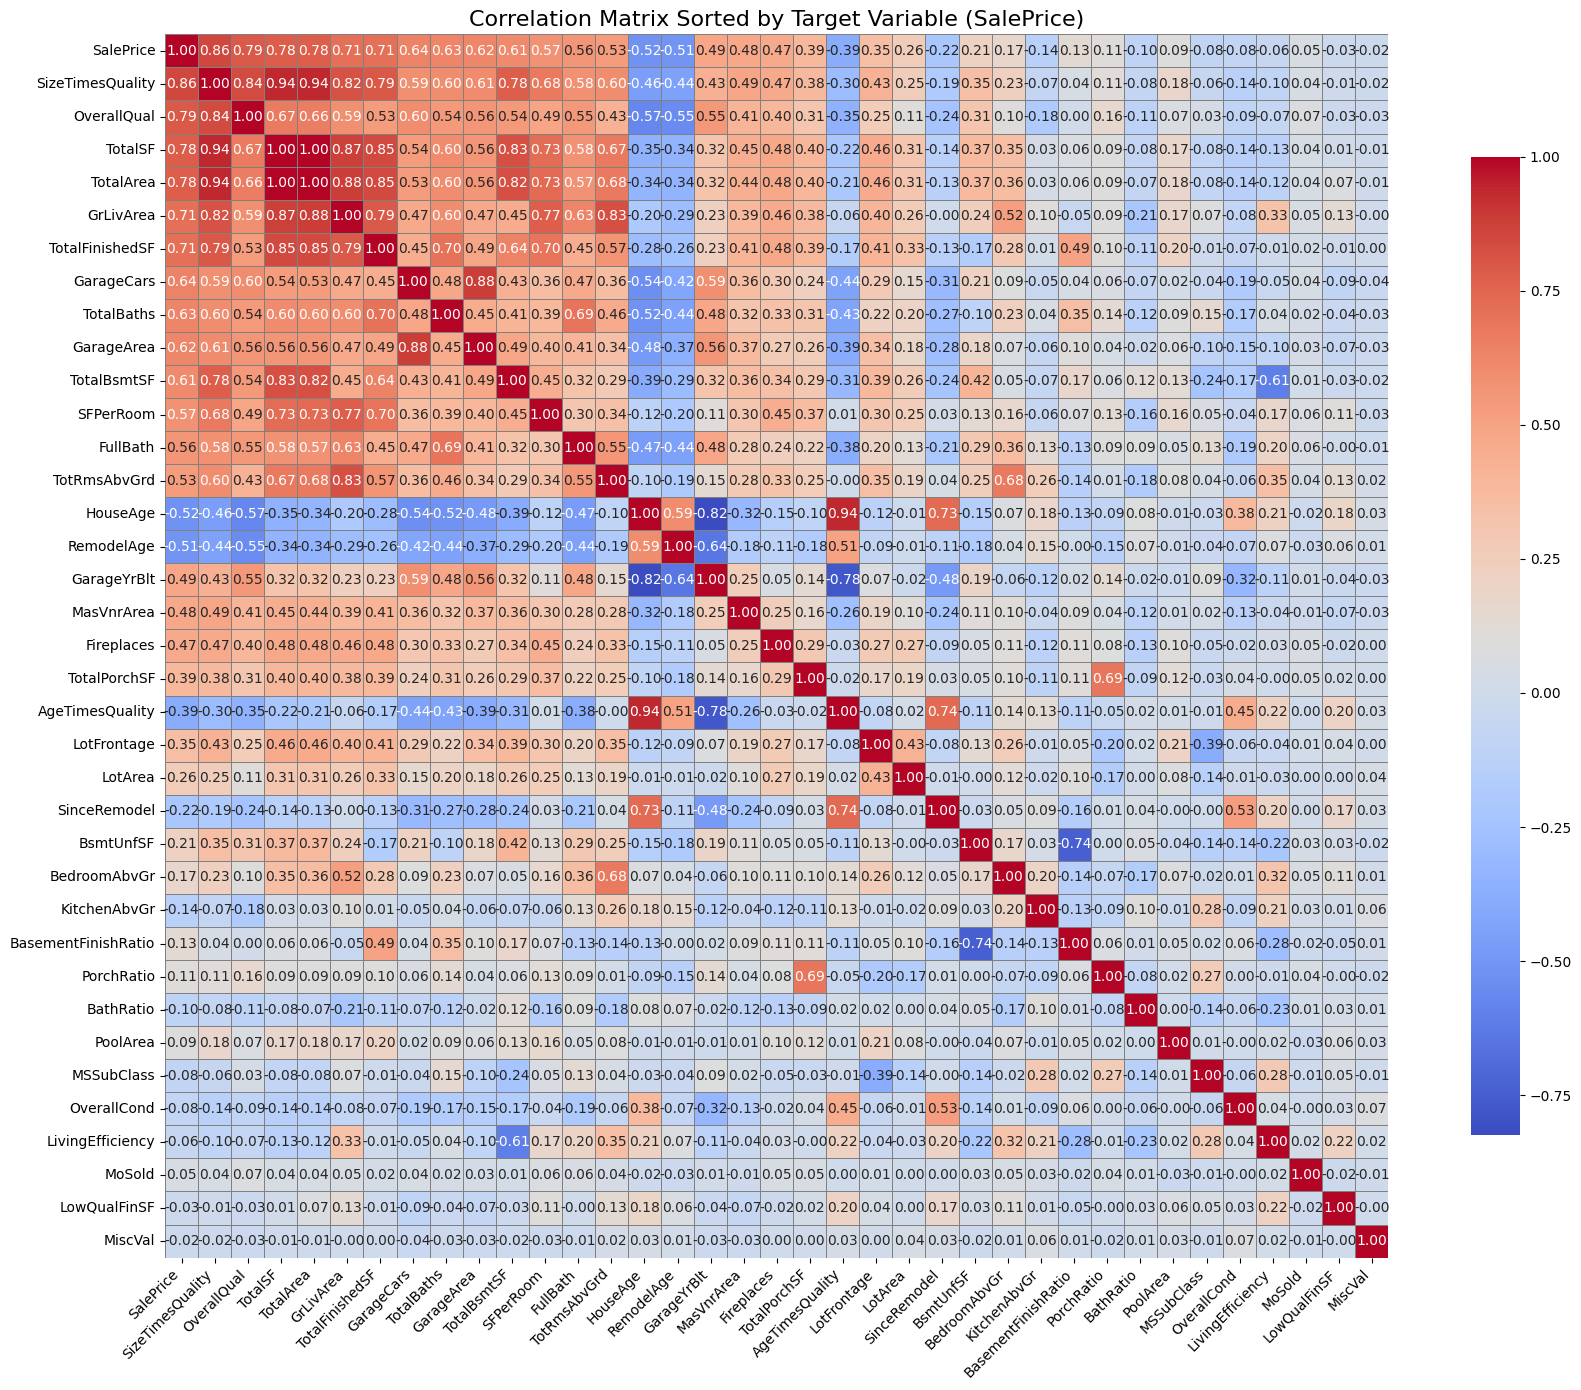

In [21]:
# Compute correlation matrix (numeric columns only)
corr_matrix = train_df.corr(numeric_only=True)

# Sort correlations by absolute correlation with target ('SalePrice')
target = 'SalePrice'
sorted_features = corr_matrix[target].abs().sort_values(ascending=False).index
sorted_corr = corr_matrix.loc[sorted_features, sorted_features]

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))
plt.title('Correlation Matrix Sorted by Target Variable (SalePrice)', fontsize=16)

# Draw heatmap with annotations and mask
sns.heatmap(
    sorted_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Original Price Statistics:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

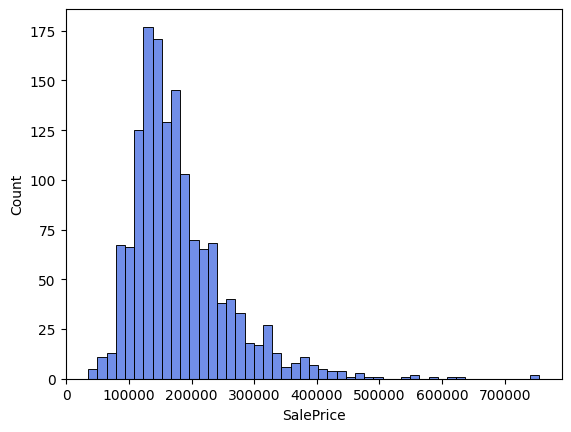

In [22]:
# target column analysis
sns.histplot(
    train_df,
    x=train_df['SalePrice'],color='royalblue'
)
# Show summary statistics
print("Original Price Statistics:")
train_df['SalePrice'].describe()

Log-Transformed Price Statistics:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

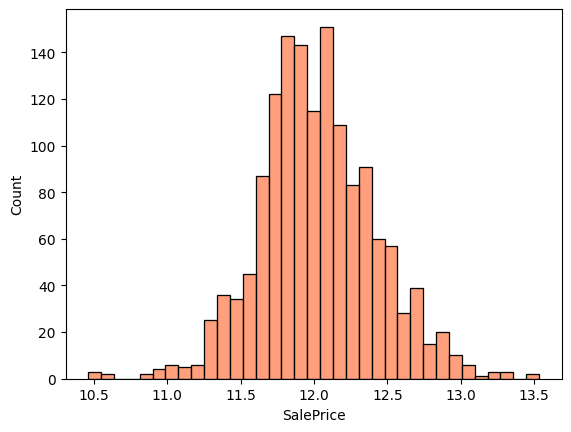

In [23]:
# transformed target
sns.histplot(
    train_df,
    x=np.log1p(train_df['SalePrice']),color='coral'
)
print("Log-Transformed Price Statistics:")
train_df['SalePrice'].describe()

In [24]:
# Columns for ordinal encoding (have a natural order)
ode_cols = [
    'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual', 'BsmtFinType1',
    'CentralAir', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual',
    'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC',
    'ExterQual', 'BsmtCond'
]

# Columns for one-hot encoding (no natural order)
ohe_cols = [
    'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Electrical', 'SaleType', 'MSZoning', 'SaleCondition',
    'Heating', 'GarageType', 'RoofMatl'
]

In [25]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

# Pipeline for numeric columns
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('var_thresh', VarianceThreshold(threshold=0.0))
])

# Pipeline for ordinal categorical columns
ode_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Pipeline for nominal categorical columns
ohe_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ==== Column Transformer ====
col_trans = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('ord', ode_pipeline, ode_cols),
        ('ohe', ohe_pipeline, ohe_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False,
    n_jobs=-1
)

# ==== Final Preprocessing Pipeline ====
pipeline = Pipeline([
    ('transform', col_trans)
])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# preparing data
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Redefine numerical and categorical columns based on the current X DataFrame
num_cols = X.select_dtypes(include=np.number).columns.tolist()
# Filter out columns that are not in X from the original ode_cols and ohe_cols
ode_cols_present = [col for col in ode_cols if col in X.columns]
ohe_cols_present = [col for col in ohe_cols if col in X.columns]

# Recreate the ColumnTransformer with the updated column lists
col_trans = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('ord', ode_pipeline, ode_cols_present),
        ('ohe', ohe_pipeline, ohe_cols_present)
    ],
    remainder='drop',
    verbose_feature_names_out=False,
    n_jobs=-1
)

# Recreate the Final Preprocessing Pipeline
pipeline = Pipeline([
    ('transform', col_trans)
])

# x is the transformed feature matrix
# y is the target variable, now consistent with the rows in X
x = pipeline.fit_transform(X)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes to confirm consistency before fitting
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1168, 207)
Shape of y_train: (1168,)
Shape of x_test: (292, 207)
Shape of y_test: (292,)


In [29]:
from sklearn.metrics import (mean_squared_error,
                            mean_absolute_error,
                            r2_score,
                            explained_variance_score)
from sklearn.model_selection import ( GridSearchCV, cross_val_score, learning_curve)
from sklearn.base import is_classifier

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5,
                  verbose=True, plot_learning_curve=True, plot_residuals=True):
    """
    Comprehensive model evaluation with metrics, cross-validation, and visual diagnostics.

    Parameters:
    - model: sklearn estimator or GridSearchCV/RandomSearchCV object
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - cv: Number of cross-validation folds
    - verbose: Whether to print detailed results
    - plot_learning_curve: Whether to plot learning curves
    - plot_residuals: Whether to plot residual analysis

    Returns:
    - Dictionary containing all evaluation metrics and results
    """

    results = {}
    start_time = time.time()

    # Handle hyperparameter tuning if model is a search object
    if hasattr(model, "best_estimator_"):
        if verbose:
            print(f"⏳ Tuning hyperparameters using {model.__class__.__name__}...")

        model.fit(X_train, y_train)
        best_model = model.best_estimator_
        best_params = model.best_params_
        best_cv_rmse = np.sqrt(-model.best_score_)

        if verbose:
            print("✅ Best parameters found:", best_params)
            print(f"🏆 Best CV RMSE during search: {best_cv_rmse:.4f}")
    else:
        best_model = model
        best_params = None
        best_model.fit(X_train, y_train)

    # Training and prediction timing
    predict_start = time.time()
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    predict_time = time.time() - predict_start

    # Calculate metrics
    metrics = {
        'train': {
            'mse': mean_squared_error(y_train, y_pred_train),
            'rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
            'mae': mean_absolute_error(y_train, y_pred_train),
            'r2': r2_score(y_train, y_pred_train),
            'explained_variance': explained_variance_score(y_train, y_pred_train)
        },
        'test': {
            'mse': mean_squared_error(y_test, y_pred_test),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae': mean_absolute_error(y_test, y_pred_test),
            'r2': r2_score(y_test, y_pred_test),
            'explained_variance': explained_variance_score(y_test, y_pred_test)
        }
    }

    # Cross-validation
    cv_results = {
        'rmse': np.sqrt(-cross_val_score(best_model, X_train, y_train,
                                       scoring='neg_mean_squared_error', cv=cv)),
        'r2': cross_val_score(best_model, X_train, y_train, scoring='r2', cv=cv)
    }

    # Store all results
    results.update({
        'model': best_model,
        'best_params': best_params,
        'metrics': metrics,
        'cv_results': cv_results,
        'predict_time': predict_time,
        'total_time': time.time() - start_time
    })

    if verbose:
        # Print comprehensive results
        print(f"\n📊 FINAL EVALUATION RESULTS FOR {best_model.__class__.__name__}")
        print("="*80)

        print("\n🔧 Model Parameters:")
        print(best_model.get_params())

        print("\n📈 Performance Metrics:")
        metrics_df = pd.DataFrame({
            'Train': [f"{metrics['train']['rmse']:.4f}",
                     f"{metrics['train']['mae']:.4f}",
                     f"{metrics['train']['r2']:.4f}",
                     f"{metrics['train']['explained_variance']:.4f}"],
            'Test': [f"{metrics['test']['rmse']:.4f}",
                    f"{metrics['test']['mae']:.4f}",
                    f"{metrics['test']['r2']:.4f}",
                    f"{metrics['test']['explained_variance']:.4f}"]
        }, index=['RMSE', 'MAE', 'R²', 'Explained Variance'])
        print(metrics_df)

        print("\n🎯 Cross-Validation Results:")
        print(f"Mean RMSE: {np.mean(cv_results['rmse']):.4f} (±{np.std(cv_results['rmse']):.4f})")
        print(f"Mean R²: {np.mean(cv_results['r2']):.4f} (±{np.std(cv_results['r2']):.4f})")

        print("\n⏱ Performance Timing:")
        print(f"Prediction time: {predict_time:.4f}s")
        print(f"Total evaluation time: {results['total_time']:.2f}s")

    # Diagnostic plots
    if plot_learning_curve:
        plot_learning_curves(best_model, X_train, y_train, cv=cv)

    if plot_residuals:
        plot_residual_analysis(y_test, y_pred_test)

    return results


def plot_learning_curves(model, X, y, cv=5):
    """Plot learning curves for the model"""
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    train_scores = np.sqrt(-train_scores)
    val_scores = np.sqrt(-val_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training")
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', color="g", label="Cross-validation")
    plt.fill_between(train_sizes,
                    train_scores.mean(axis=1) - train_scores.std(axis=1),
                    train_scores.mean(axis=1) + train_scores.std(axis=1),
                    alpha=0.1, color="r")
    plt.fill_between(train_sizes,
                    val_scores.mean(axis=1) - val_scores.std(axis=1),
                    val_scores.mean(axis=1) + val_scores.std(axis=1),
                    alpha=0.1, color="g")

    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


def plot_residual_analysis(y_true, y_pred):
    """Plot residual analysis for regression model"""
    residuals = y_true - y_pred

    plt.figure(figsize=(15, 5))

    # Residuals vs Predicted
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')

    # Residual distribution
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Residual Distribution')

    # Q-Q plot of residuals
    plt.subplot(1, 3, 3)
    stats.probplot(residuals, plot=plt)
    plt.title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
# Linear Regression
lr = LinearRegression()


📊 FINAL EVALUATION RESULTS FOR LinearRegression

🔧 Model Parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

📈 Performance Metrics:
                         Train        Test
RMSE                20331.3435  26331.7962
MAE                 12959.9990  17351.8490
R²                      0.9307      0.9096
Explained Variance      0.9307      0.9097

🎯 Cross-Validation Results:
Mean RMSE: 39209.2630 (±12871.9204)
Mean R²: 0.7177 (±0.1493)

⏱ Performance Timing:
Prediction time: 0.0014s
Total evaluation time: 0.48s


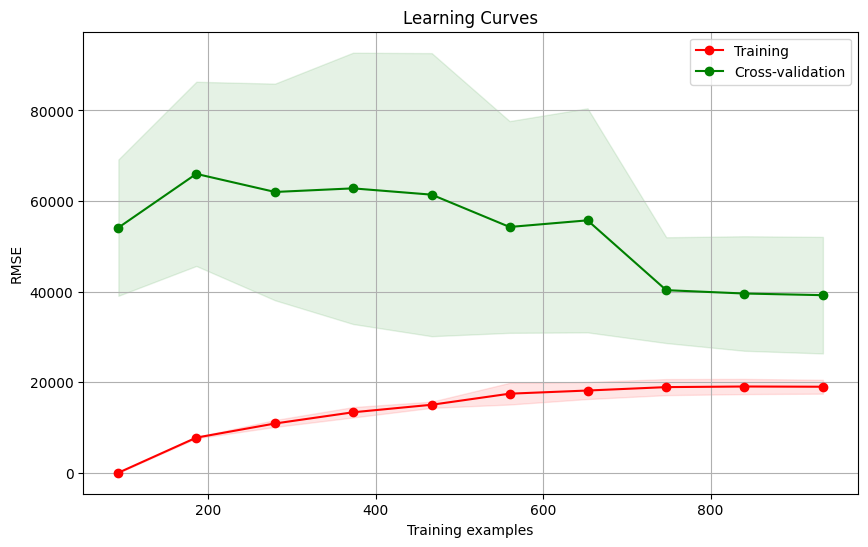

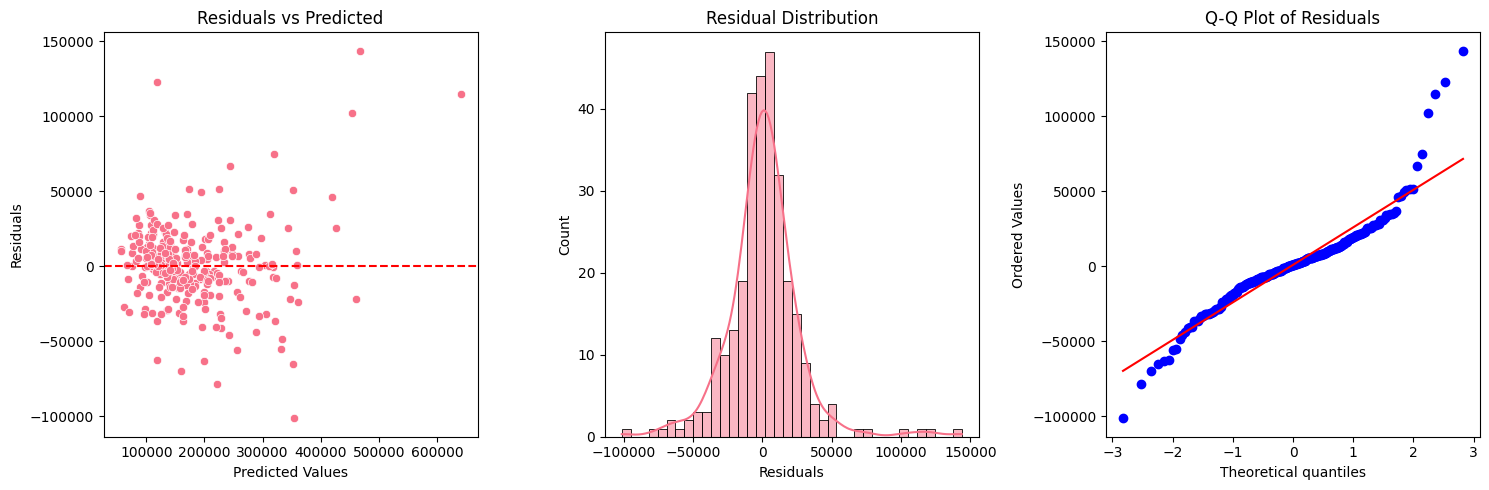

In [31]:
results = evaluate_model(
    lr,
    X_train=x_train,
    y_train=y_train,
    X_test=x_test,
    y_test=y_test,
    verbose=True,
    cv=5,
    plot_learning_curve=True,
    plot_residuals=True
)